In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
!pip install --upgrade mplhep
!pip install --user proplot

^C
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/bin/pip", line 6, in <module>
    from pkg_resources import load_entry_point
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pkg_resources/__init__.py", line 3251, in <module>
    @_call_aside
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pkg_resources/__init__.py", line 3235, in _call_aside
    f(*args, **kwargs)
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pkg_resources/__init__.py", line 3287, in _initialize_master_working_set
    list(map(working_set.add_entry, sys.path))
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pkg_resources/__init__.py", line 623, in add_entry
    for dist in find_distributions(entry, True):
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = '100'

import numpy as np
import pandas as pd
from plotting import * 

import mplhep as hep
plt.style.use(hep.style.CMS)

In [42]:
df_ele = pd.read_csv("validation_data_v9_run02/validation_dataset_v9_gamma.csv", sep=";")
df_gamma = pd.read_csv("validation_data_v9_run02/validation_dataset_v9_ele.csv", sep=";")

In [71]:
df = df_ele
flavour = "Electron"

In [44]:
df = df_gamma
flavour = "Photon"

In [45]:
print("N events ", len(df))

N events  666225


In [46]:
df.columns

Index(['ncls', 'ncls_true', 'ncls_sel', 'ncls_sel_true', 'ncls_sel_must',
       'ncls_sel_must_true', 'Et_tot', 'En_tot', 'Et_true', 'Et_sel',
       'Et_sel_true', 'En_true', 'En_sel', 'En_sel_true', 'Et_ovEtrue',
       'En_ovEtrue', 'Et_sel_must', 'En_sel_must', 'Et_sel_must_true',
       'En_sel_must_true', 'Et_ovEtrue_mustache', 'En_ovEtrue_mustache',
       'flavour', 'seed_eta', 'seed_phi', 'seed_ieta', 'seed_iphi', 'seed_iz',
       'en_seed', 'et_seed', 'en_seed_calib', 'et_seed_calib', 'seed_r9',
       'seed_swissCross', 'seed_nxtals', 'max_en_cluster', 'max_et_cluster',
       'max_deta_cluster', 'max_dphi_cluster', 'max_den_cluster',
       'max_det_cluster', 'min_en_cluster', 'min_et_cluster',
       'min_deta_cluster', 'min_dphi_cluster', 'min_den_cluster',
       'min_det_cluster', 'mean_en_cluster', 'mean_et_cluster',
       'mean_deta_cluster', 'mean_dphi_cluster', 'mean_den_cluster',
       'mean_det_cluster', 'en_true_sim', 'et_true_sim', 'en_true_gen',
       'et_

In [72]:
# Add variables
df['iz'] = df['seed_iz']
df['ieta'] = df['seed_ieta']
df['iphi'] = df['seed_iphi']
df['eta'] = df['seed_eta']
df['phi'] = df['seed_phi']
df['en'] = df['en_seed']
df['et'] = df['et_seed']

# Seed 


Text(0, 1, 'iphi')

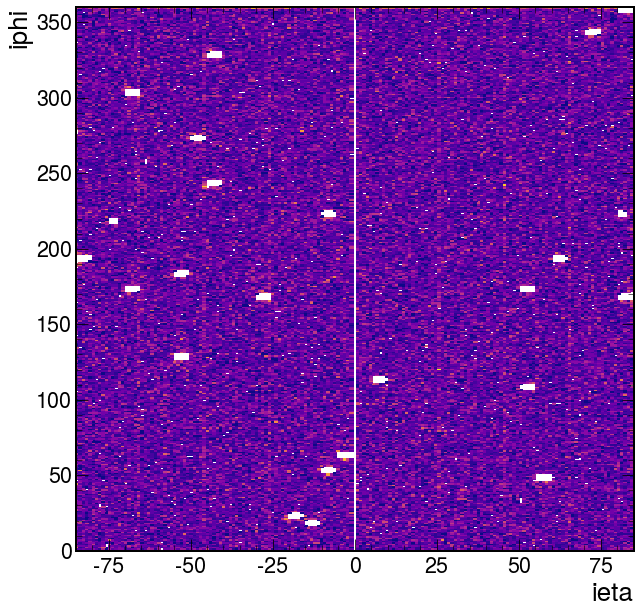

In [11]:
plt.hist2d(df[df.seed_iz==0].seed_ieta, df[df.seed_iz==0].seed_iphi, range=((-85,85),(0,360)), bins=(171,360), cmap="plasma", cmin=1 )
plt.xlabel("ieta")
plt.ylabel("iphi")

Text(1, 0, 'iphi')

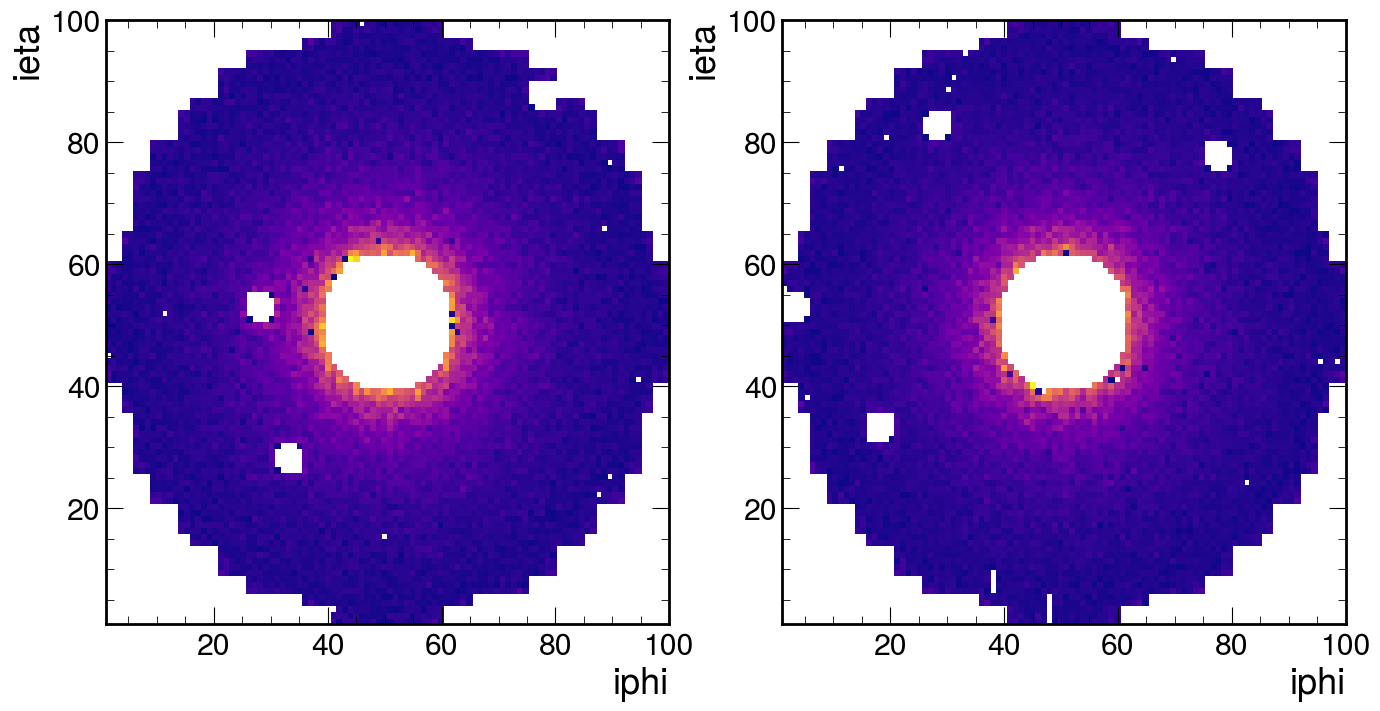

In [12]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(df[df.seed_iz==-1].iphi,df[df.iz==-1].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma", cmin = 1 )
ax[1].hist2d(df[df.seed_iz==1].iphi,df[df.iz==1].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma",cmin = 1 )
ax[0].set_ylabel("ieta")
ax[0].set_xlabel("iphi")
ax[1].set_ylabel("ieta")
ax[1].set_xlabel("iphi")

Text(1, 0, 'iphi')

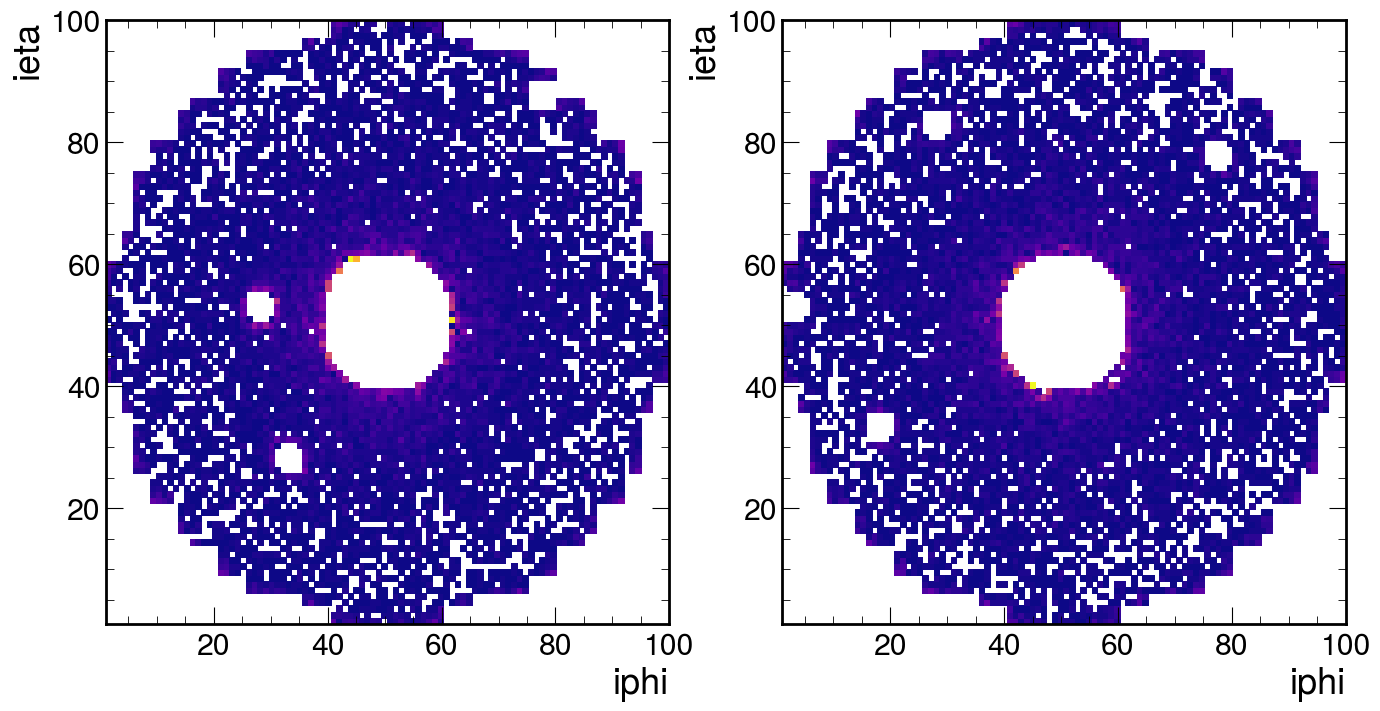

In [41]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(df[(df.seed_iz==-1) & (df.et < 10)].iphi,df[(df.seed_iz==-1) & (df.et < 10)].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma", cmin = 1 )
ax[1].hist2d(df[(df.seed_iz==1) & (df.et < 10)].iphi,df[(df.seed_iz==1) & (df.et < 10)].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma",cmin = 1 )
ax[0].set_ylabel("ieta")
ax[0].set_xlabel("iphi")
ax[1].set_ylabel("ieta")
ax[1].set_xlabel("iphi")

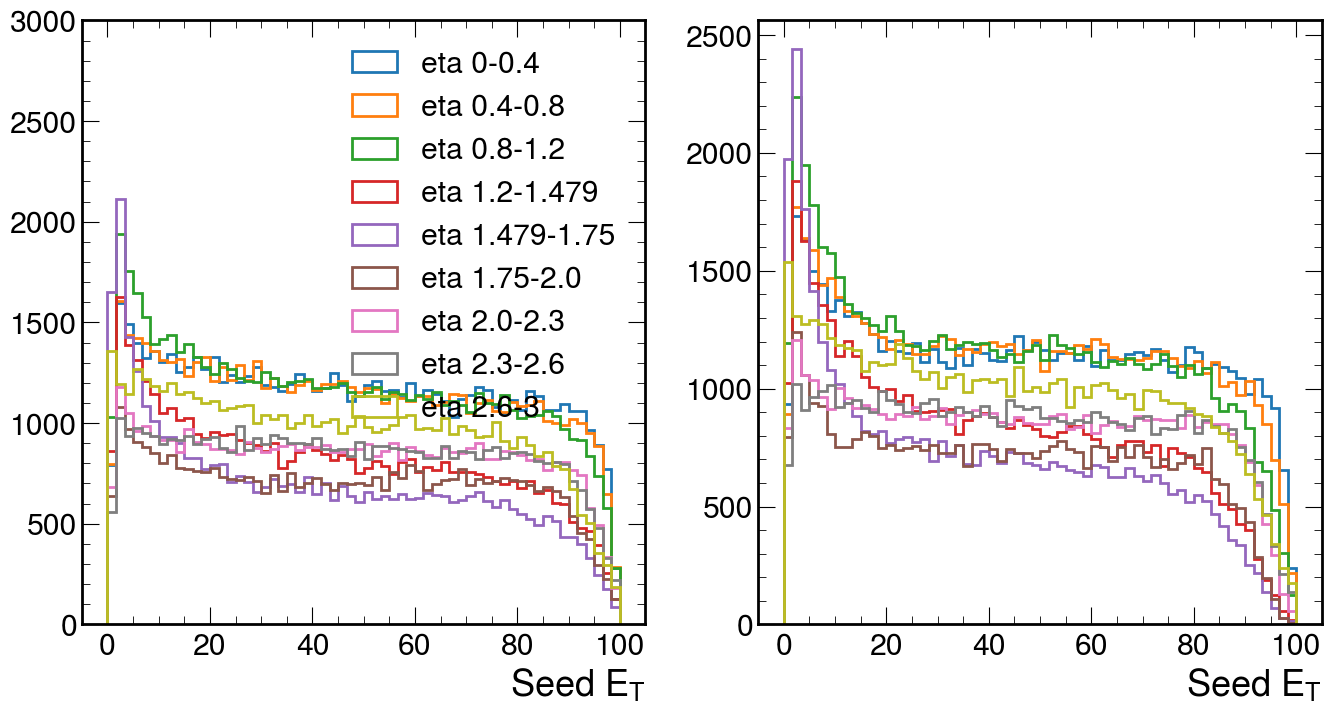

In [40]:
f, axs  = plt.subplots(1,2, figsize=(16,8), dpi=100)

df_ele["eta_bin"] = pd.cut(abs(df_ele.seed_eta), etas, labels=list(range(len(etas)-1)))
df_gamma["eta_bin"] = pd.cut(abs(df_gamma.seed_eta), etas, labels=list(range(len(etas)-1)))

for ie in range(len(etas)-1):
    axs[0].hist(df_ele[df_ele.eta_bin == ie].et_seed, bins=60, range=(0,100), histtype="step", linewidth=2, label="eta {}-{}".format(etas[ie], etas[ie+1]) )
    axs[1].hist(df_gamma[df_gamma.eta_bin == ie].et_seed, bins=60, range=(0,100), histtype="step", linewidth=2, label="eta {}-{}".format(etas[ie], etas[ie+1]) )
    axs[0].set_xlabel("Seed $E_T$")
    axs[0].set_ylim(0, 3000)
    axs[1].set_xlabel("Seed $E_T$")
    axs[0].legend()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

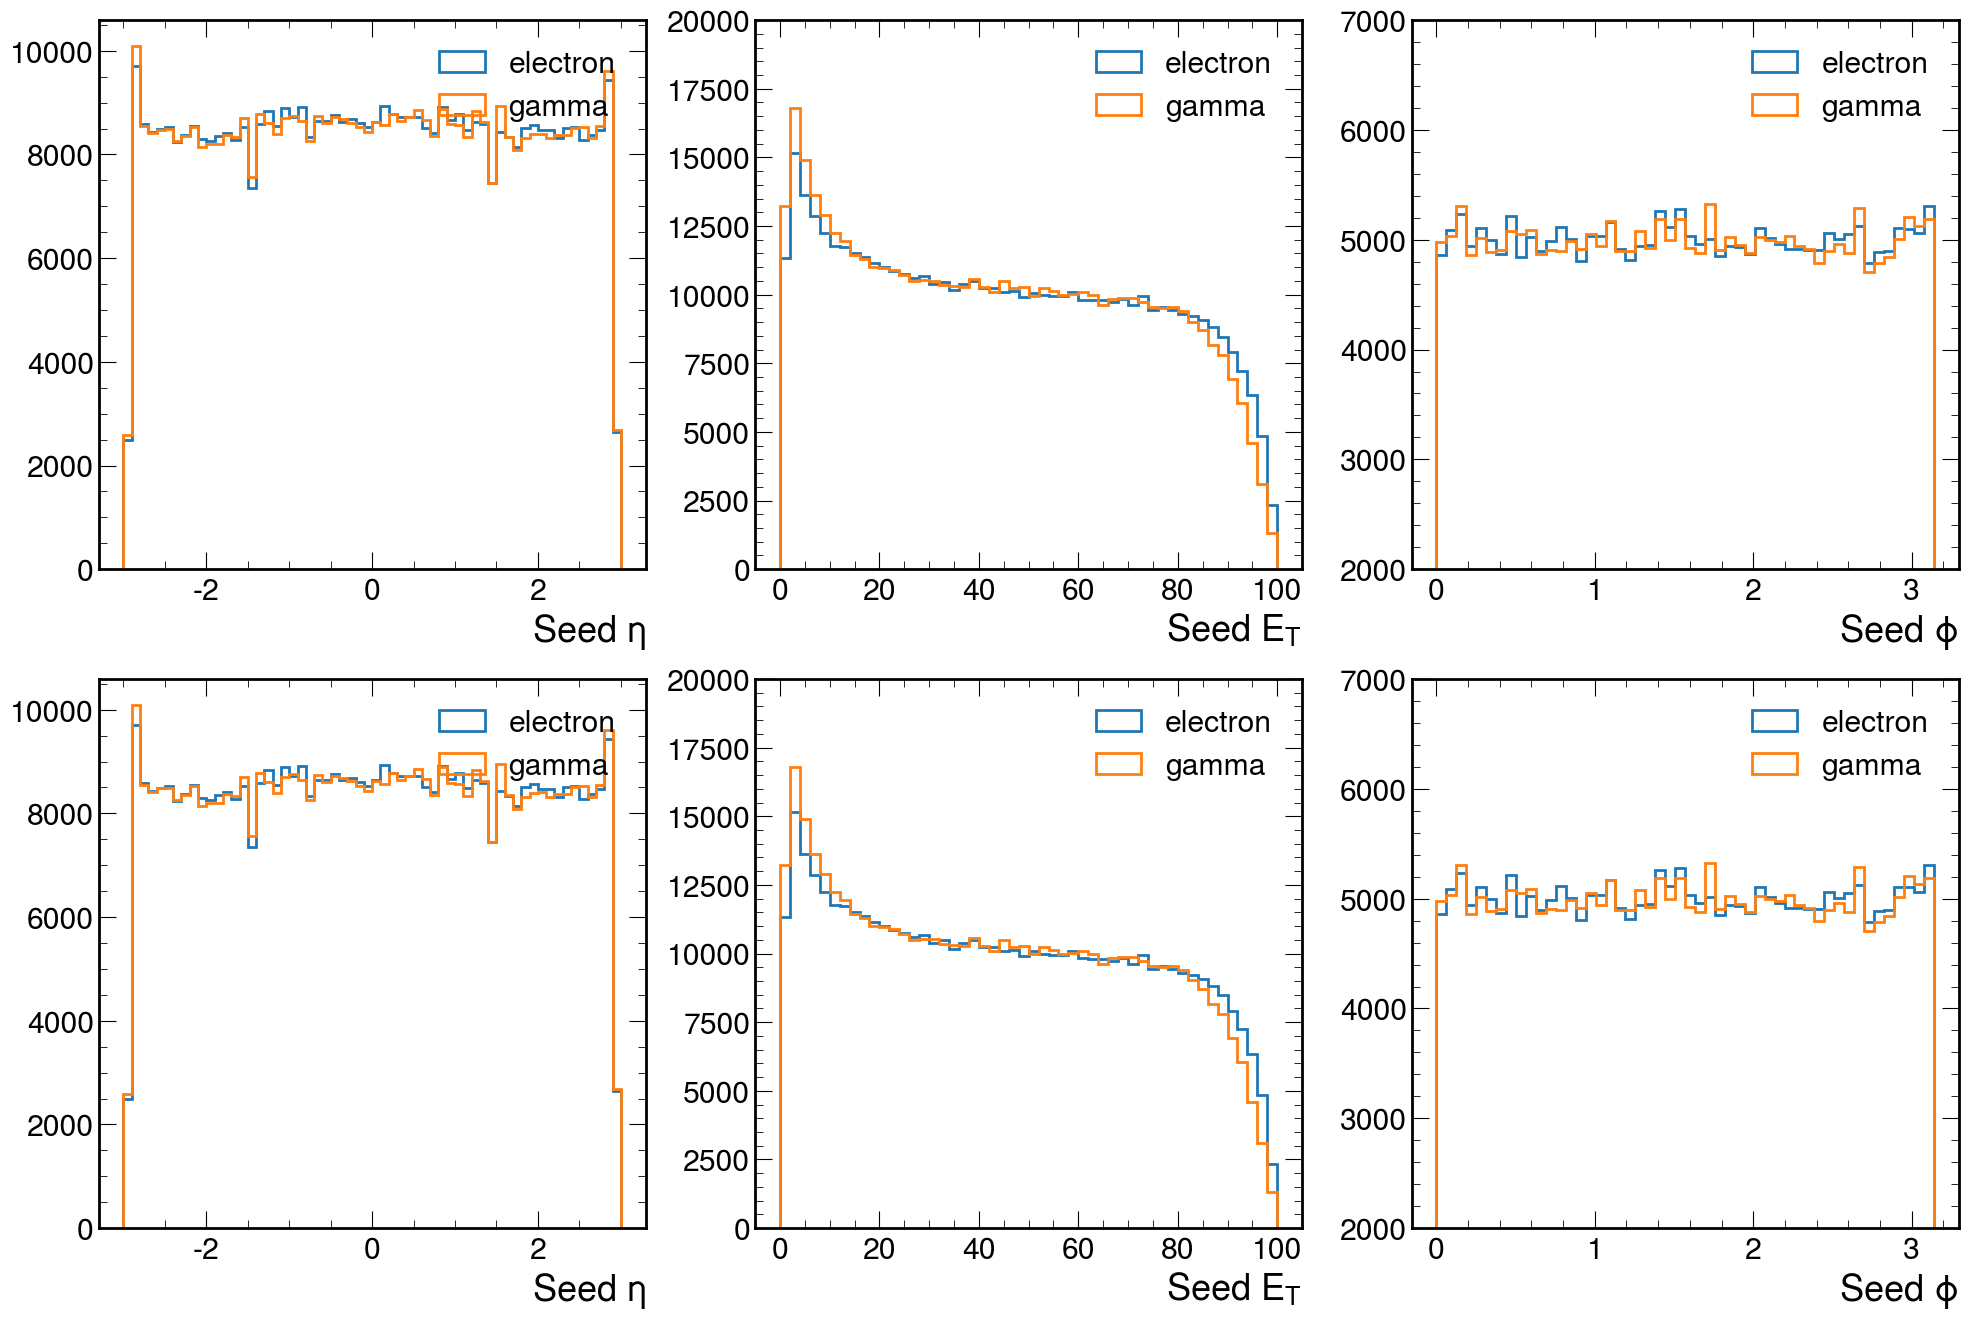

In [31]:
f, axs = plt.subplots(2,3, figsize=(24,16), dpi=100)

for i, df in enumerate([df_ele, df_gamma]):
    axs[i][0].hist(df_ele.seed_eta, bins=60, range=(-3,3), histtype="step", linewidth=2, label="electron" )
    axs[i][0].hist(df_gamma.seed_eta, bins=60, range=(-3,3), histtype="step", linewidth=2, label="gamma" )
    axs[i][0].set_xlabel("Seed $\eta$")
    axs[i][0].legend()
    # ax.set_ylim(5000, 10000)

    axs[i][1].hist(df_ele.et_seed, bins=50, range=(0,100), histtype="step", linewidth=2, label="electron"  )
    axs[i][1].hist(df_gamma.et_seed, bins=50, range=(0,100), histtype="step", linewidth=2, label="gamma"  )
    axs[i][1].set_xlabel("Seed $E_T$")
    axs[i][1].legend()
    axs[i][1].set_ylim(0, 20000)


    axs[i][2].hist(df_ele.seed_phi, bins=50, range=(0,3.14), histtype="step", linewidth=2, label="electron"  )
    axs[i][2].hist(df_gamma.seed_phi, bins=50, range=(0,3.14), histtype="step", linewidth=2, label="gamma"  )
    axs[i][2].set_xlabel("Seed $\phi$")
    axs[i][2].legend()
    axs[i][2].set_ylim(2000,7000)


hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)
hep.cms.text("Preliminary ",loc=0, ax=ac)

/usr/local/bin/start_ipykernel.py:5: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/bin/start_ipykernel.py:11: RuntimeWarning: invalid value encountered in true_divide


Text(1, 0, 'iphi')

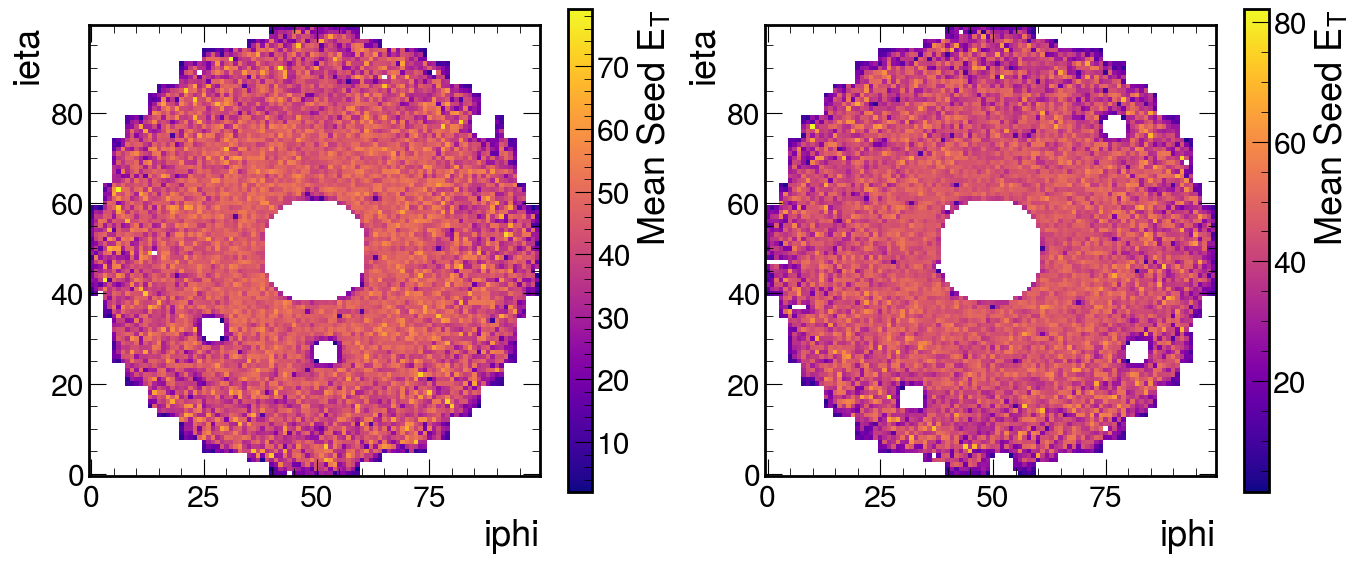

In [93]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

A = np.histogram2d(df_gamma[df_gamma.seed_iz==-1].seed_iphi,df_gamma[df_gamma.seed_iz==-1].seed_ieta, weights=df_gamma[df_gamma.seed_iz==-1].et_seed,range=((1,100),(1,100)), bins=(100,100) )
A_count = np.histogram2d(df_gamma[df_gamma.seed_iz==-1].seed_iphi,df_gamma[df_gamma.seed_iz==-1].seed_ieta, range=((1,100),(1,100)), bins=(100,100))
m1 = A[0]/A_count[0]
I1 = ax[0].imshow(m1, cmap="plasma")
f.colorbar(I1, label="Mean Seed $E_T$", ax=ax[0], shrink=0.8)

A2 = np.histogram2d(df_gamma[df_gamma.seed_iz==1].seed_iphi,df_gamma[df_gamma.seed_iz==1].seed_ieta, weights=df_gamma[df_gamma.seed_iz==1].et_seed,range=((1,100),(1,100)), bins=(100,100))
A2_count = np.histogram2d(df_gamma[df_gamma.seed_iz==1].seed_iphi,df_gamma[df_gamma.seed_iz==1].seed_ieta, range=((1,100),(1,100)), bins=(100,100))
m2 = A2[0]/A2_count[0]

I2 = ax[1].imshow(m2, cmap="plasma")
f.colorbar(I2, label="Mean Seed $E_T$", ax=ax[1], shrink=0.8)

ax[0].set_ylabel("ieta")
ax[0].set_xlabel("iphi")
ax[1].set_ylabel("ieta")
ax[1].set_xlabel("iphi")

# Performance plots

In [73]:
ets = [0,5,10,15, 20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.479, 1.75,2.,2.3,2.6,3]
ncls = [1,2,3,5,10,12,15,17,20,25,30]
nvtx = [20,30,35,40,45,50,55,60,65,70,75,80,90,100,130]

df["eta_bin"] = pd.cut(abs(df.seed_eta), etas, labels=list(range(len(etas)-1)))
df["et_bin"] = pd.cut(df.et_seed, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))
df["nvtx_bin"] = pd.cut(df.nVtx, nvtx, labels=list(range(len(nvtx)-1)))

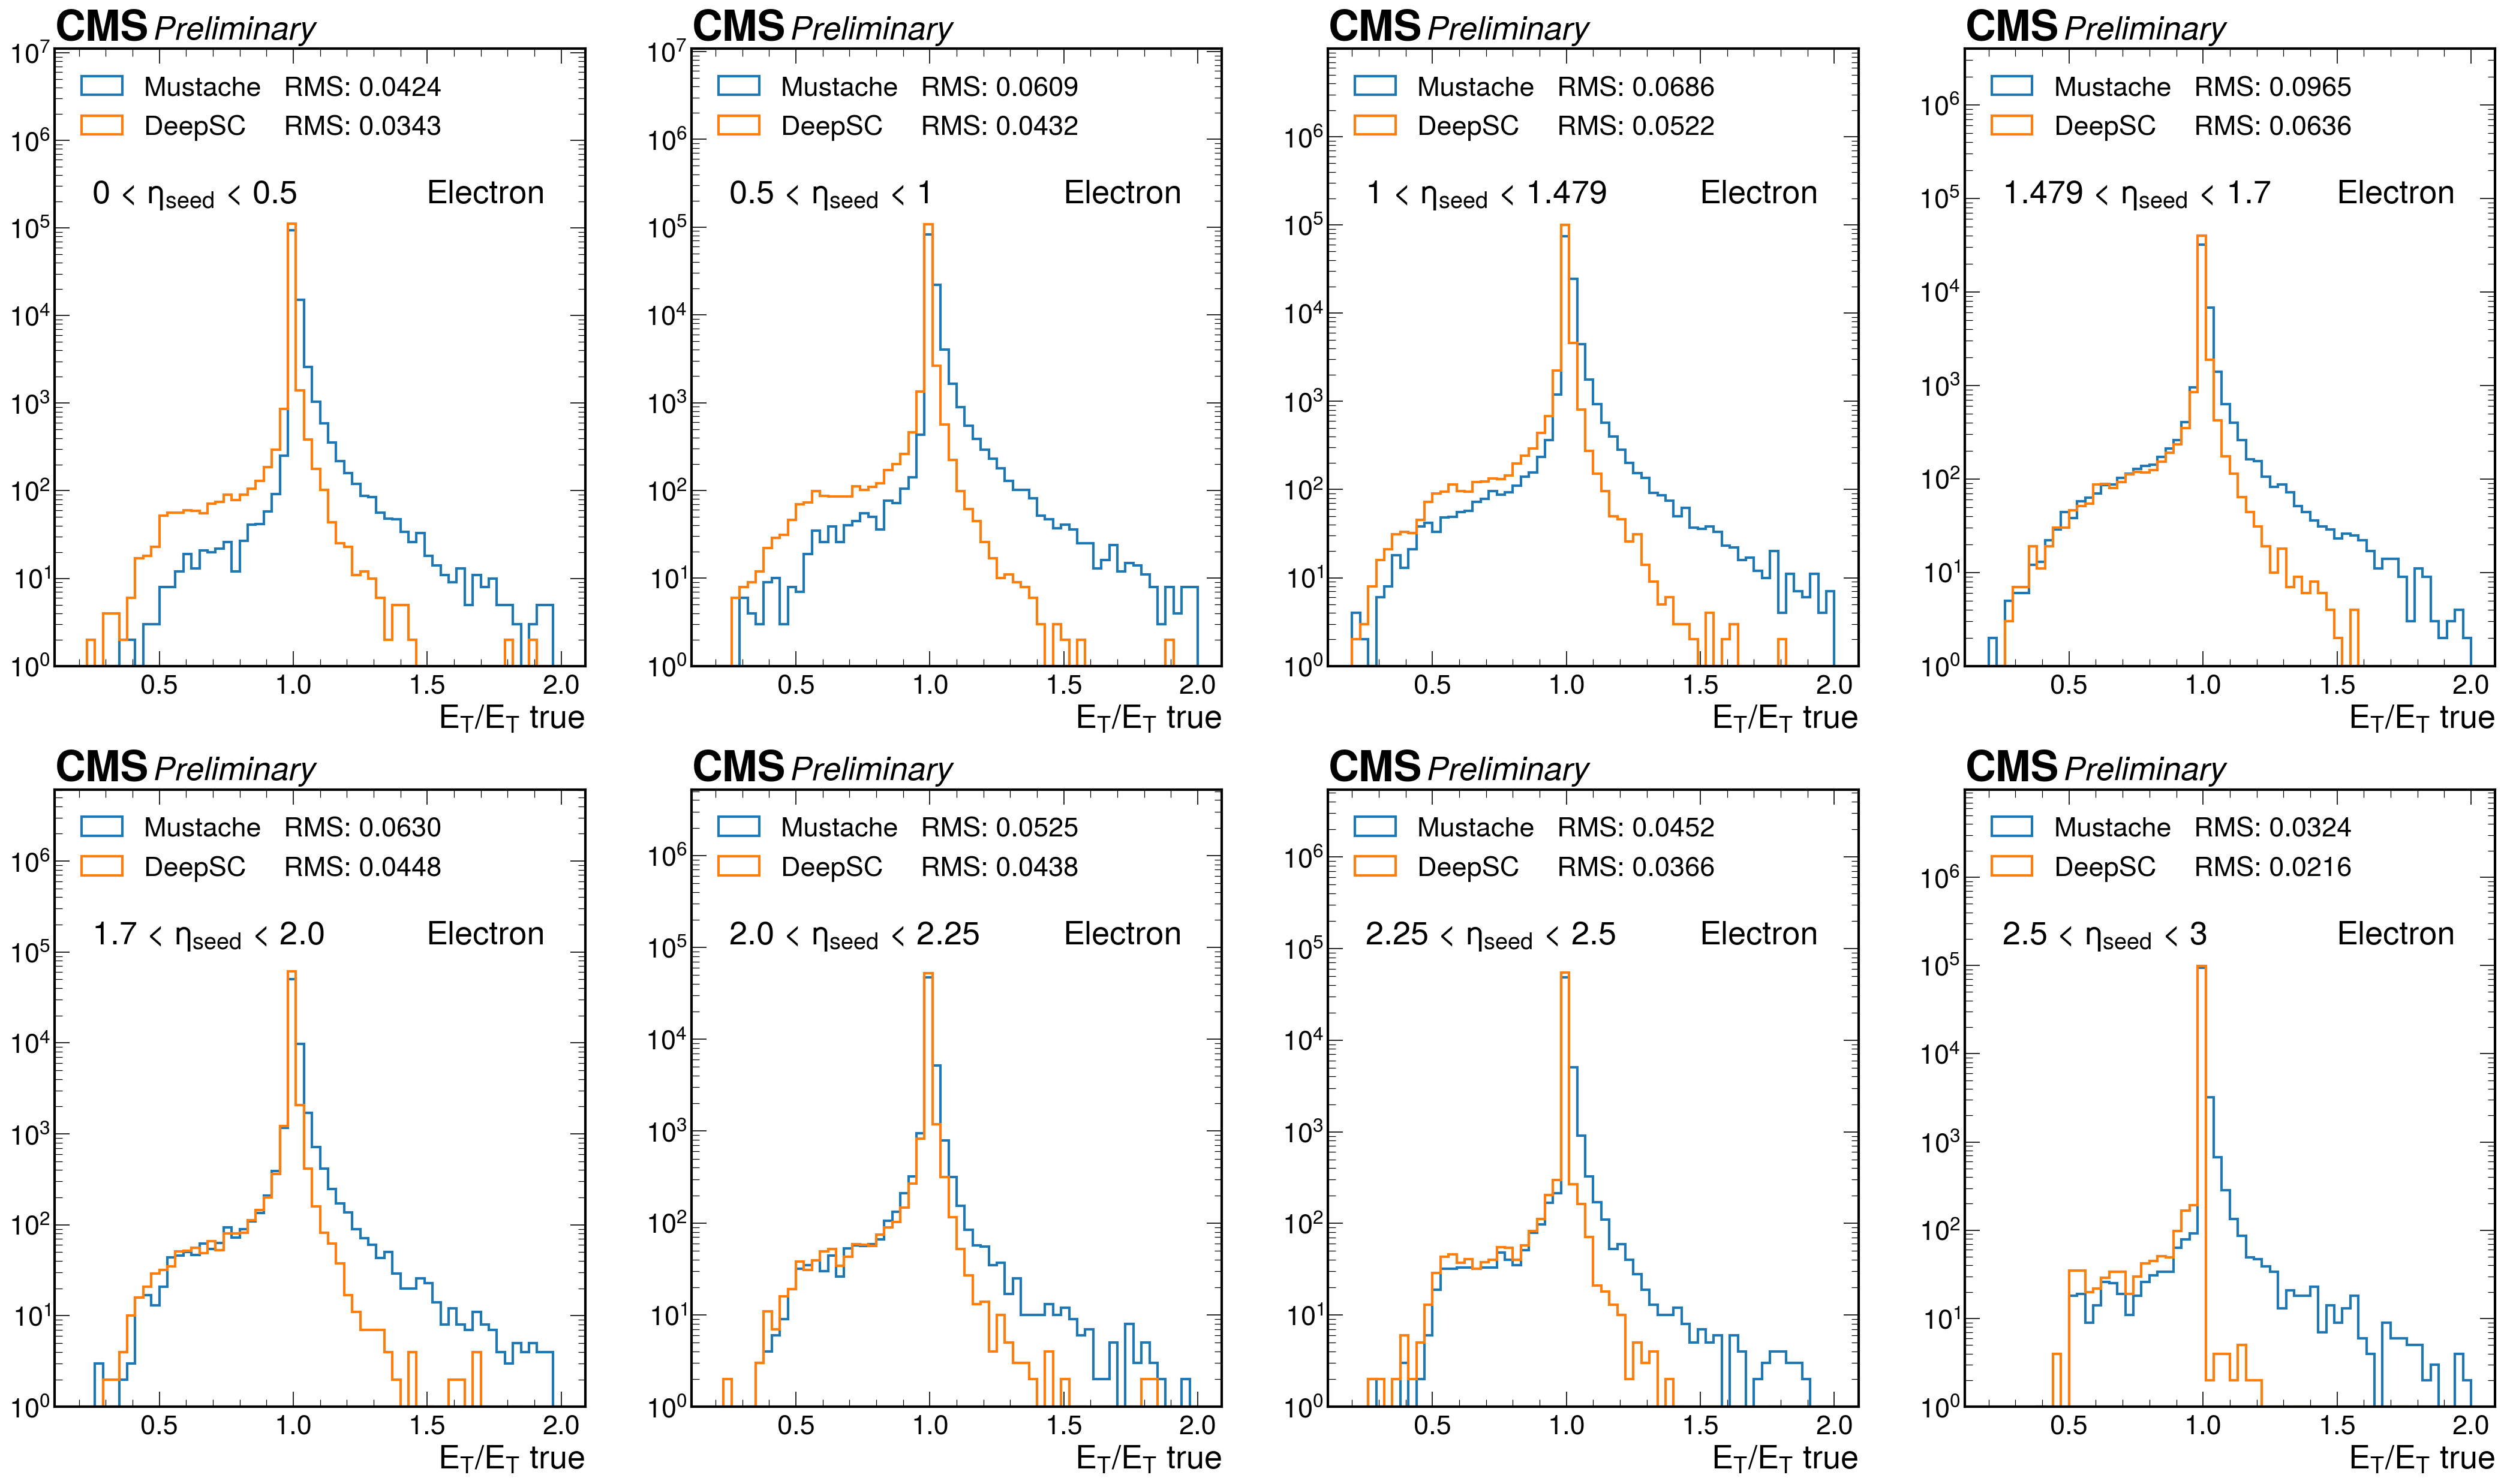

In [74]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 2)
bins= 60


r = [0, 0.5,1, 1.479, 1.7, 2.0, 2.25, 2.5, 3]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx = df[(abs(df.seed_eta)>=e1) & (abs(df.seed_eta)<e2)]
        rms = dfx.Et_ovEtrue.std()
        rms_mustache = dfx.Et_ovEtrue_mustache.std()

        ax[j,i].hist(dfx.Et_ovEtrue_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache   RMS: {:.4f}'.format(rms_mustache))
        A= ax[j,i].hist(dfx.Et_ovEtrue,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     RMS: {:.4f}'.format(rms))
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e2 * maxY)
        ax[j,i].set_xlabel("$E_T/E_T$ true")
        ax[j,i].text(0.07,0.75,  str(e1) + ' < $\eta_{seed}$ < ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


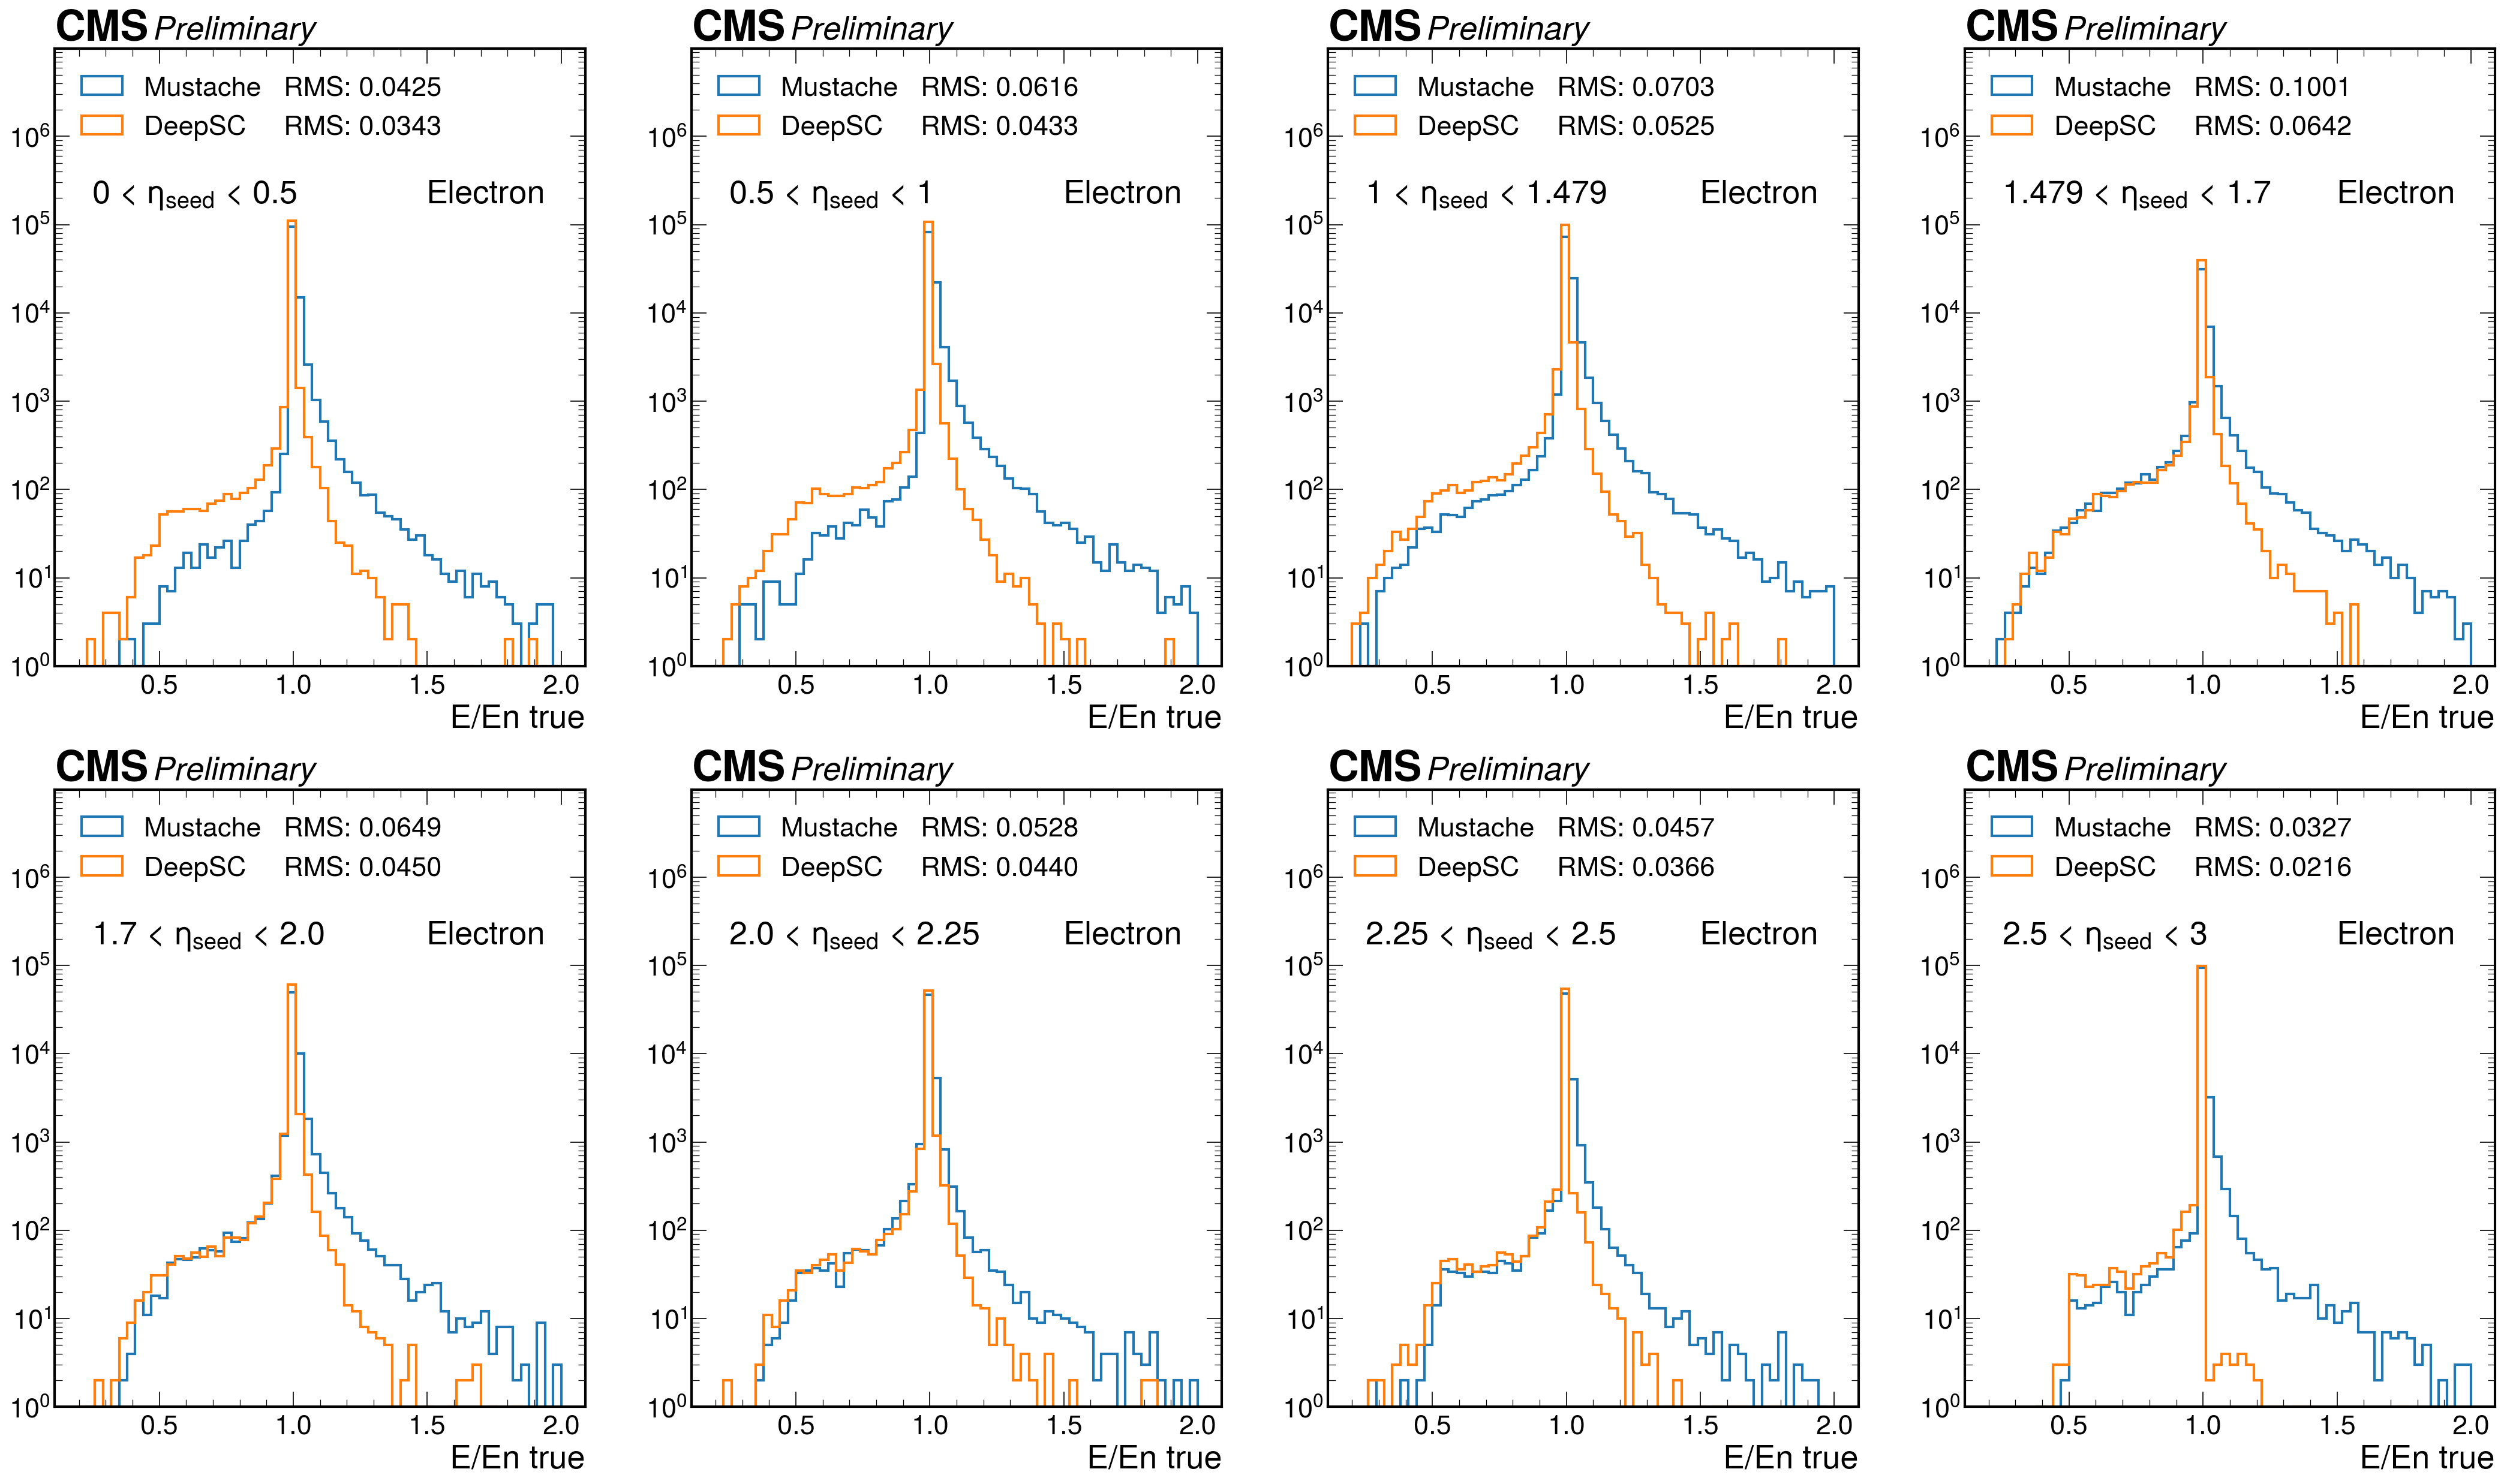

In [91]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 2)
bins= 60


r = [0, 0.5,1, 1.479, 1.7, 2.0, 2.25, 2.5, 3]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx = df[(abs(df.seed_eta)>=e1) & (abs(df.seed_eta)<e2)]
        rms = dfx.En_ovEtrue.std()
        rms_mustache = dfx.En_ovEtrue_mustache.std()

        ax[j,i].hist(dfx.En_ovEtrue_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache   RMS: {:.4f}'.format(rms_mustache))
        A= ax[j,i].hist(dfx.En_ovEtrue,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     RMS: {:.4f}'.format(rms))
       
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e2 * maxY)
        ax[j,i].set_xlabel("E/En true")
        ax[j,i].text(0.07,0.75,  str(e1) + ' < $\eta_{seed}$ < ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


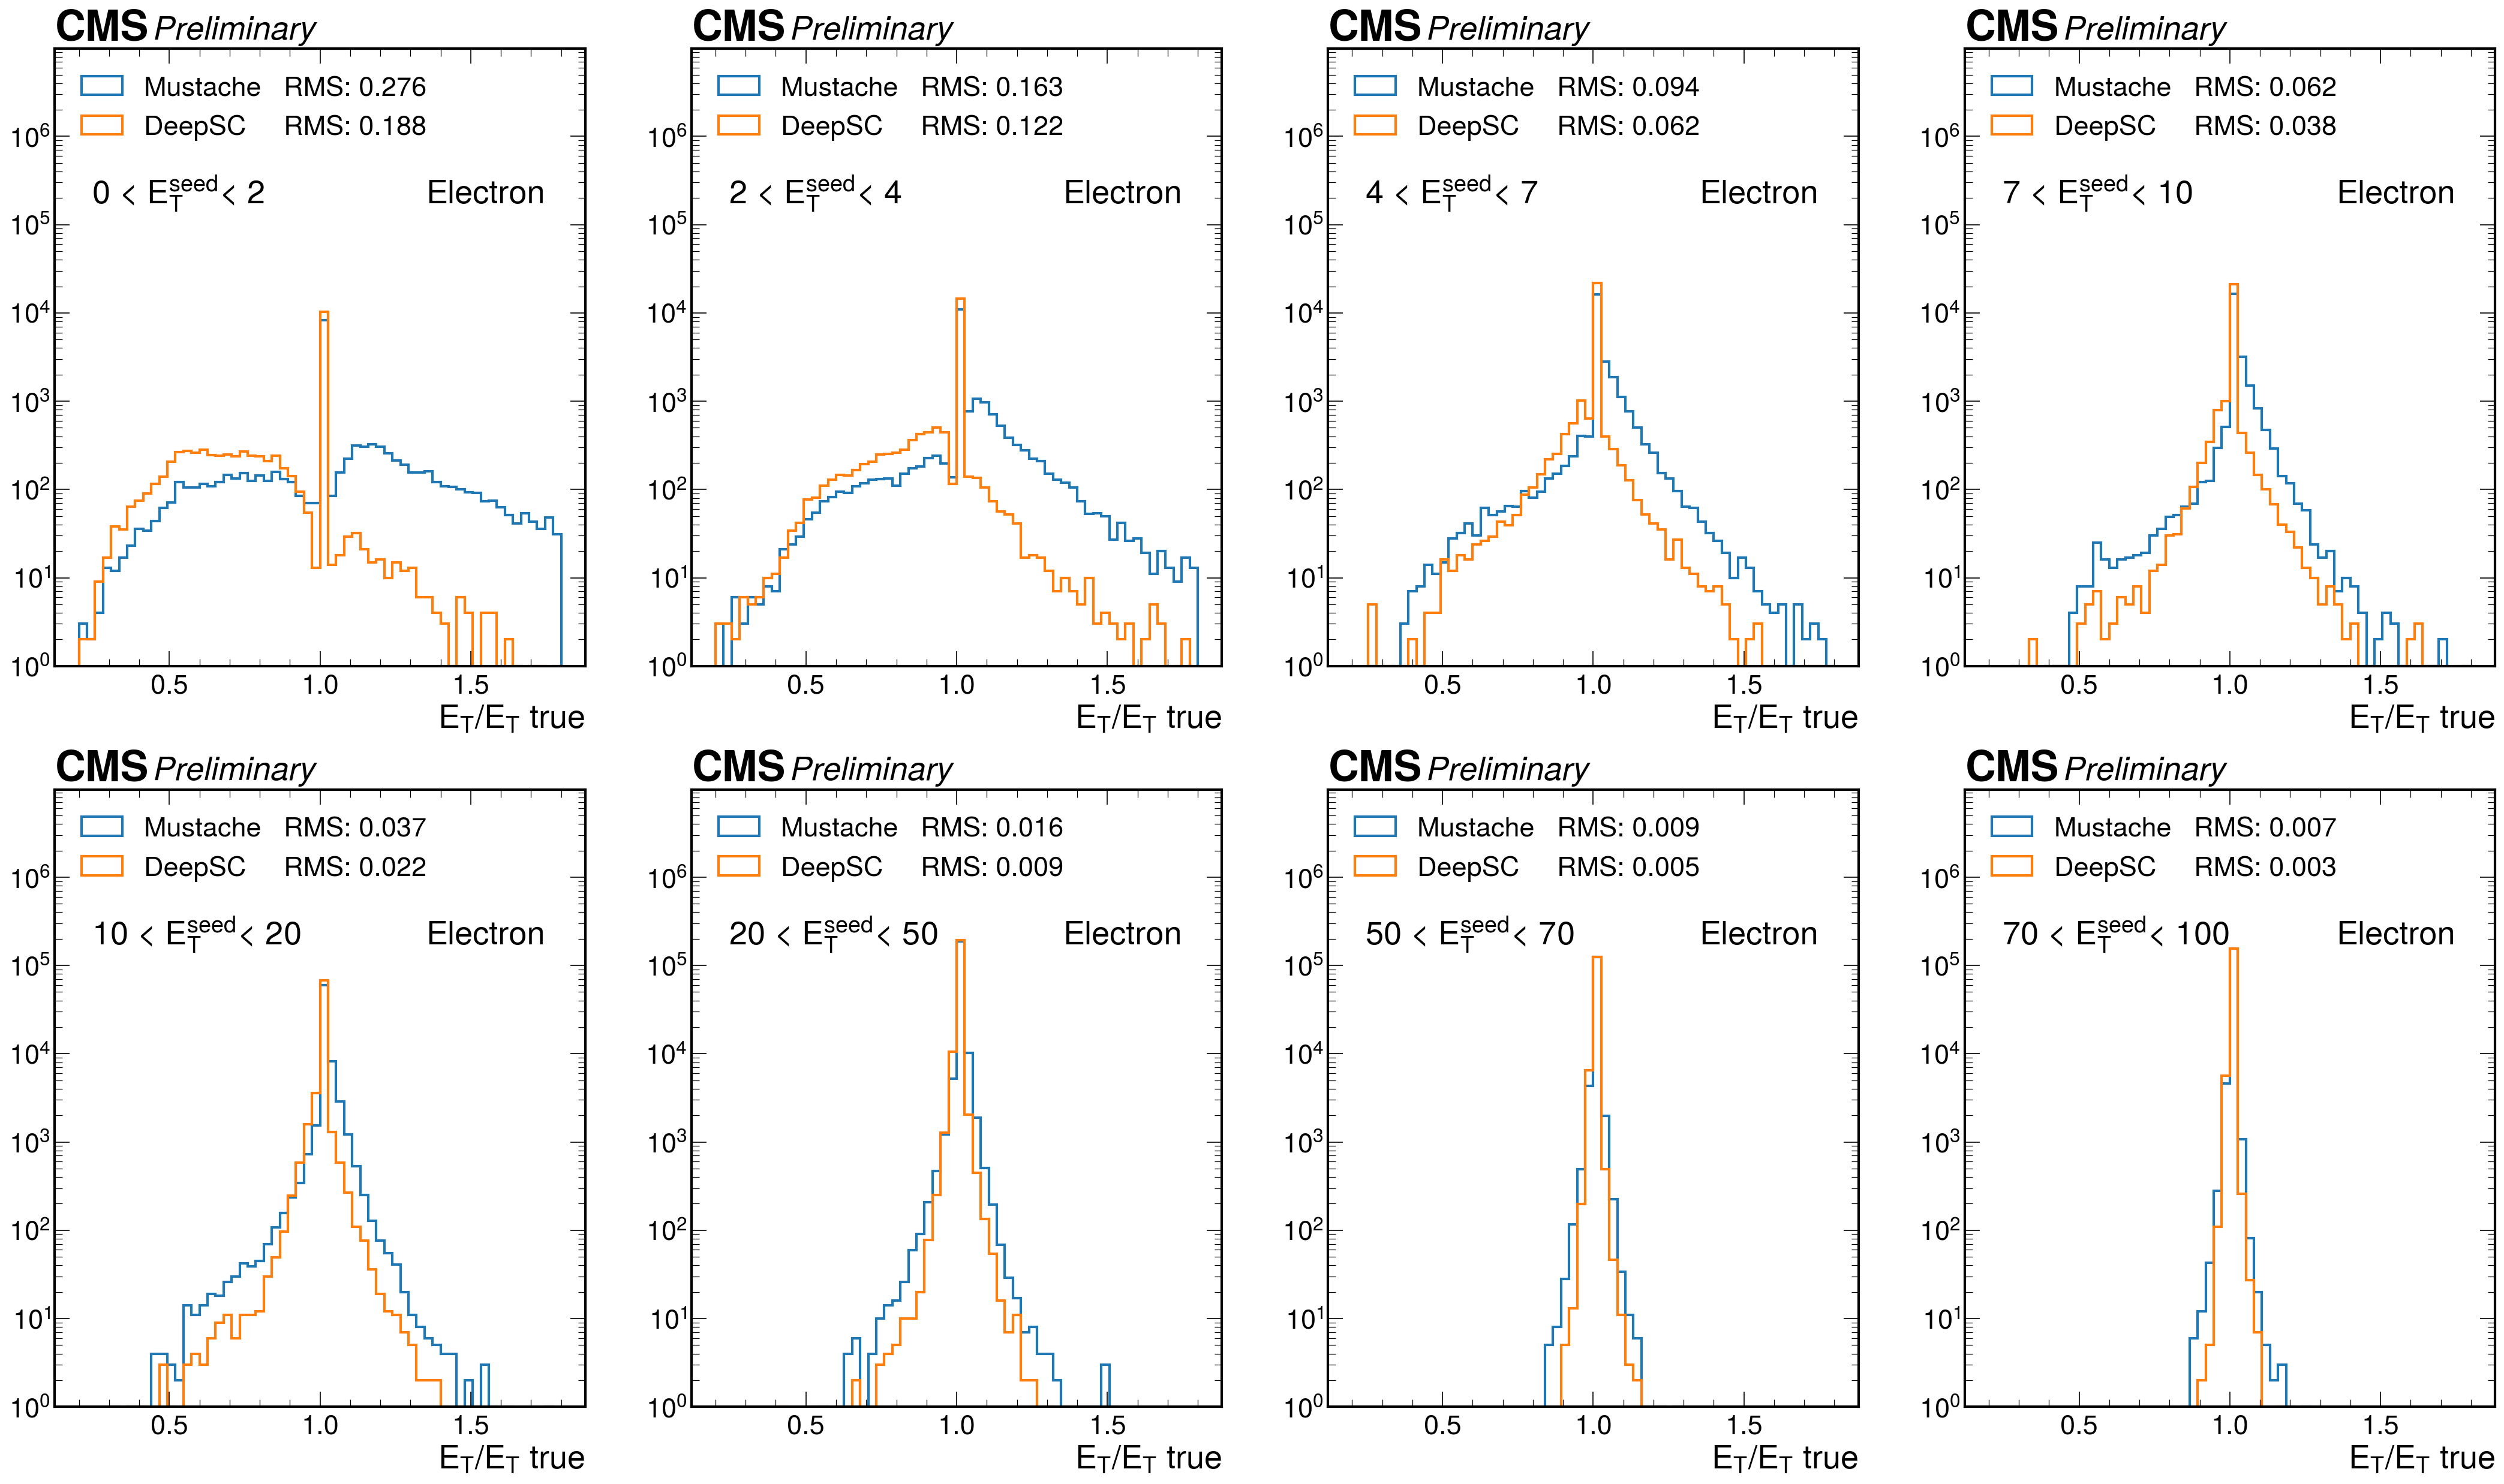

In [92]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.8)
bins=60

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(df.et>=e1) & (df.et<e2)]
        rms = dfx.Et_ovEtrue.std()
        rms_mustache = dfx.Et_ovEtrue_mustache.std()

        ax[j,i].hist(dfx.Et_ovEtrue_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache   RMS: {:.3f}'.format(rms_mustache))
        A= ax[j,i].hist(dfx.Et_ovEtrue,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     RMS: {:.3f}'.format(rms))
       
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e2 * maxY)
        ax[j,i].set_xlabel("$E_T/E_T$ true")
        ax[j,i].text(0.07,0.75,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


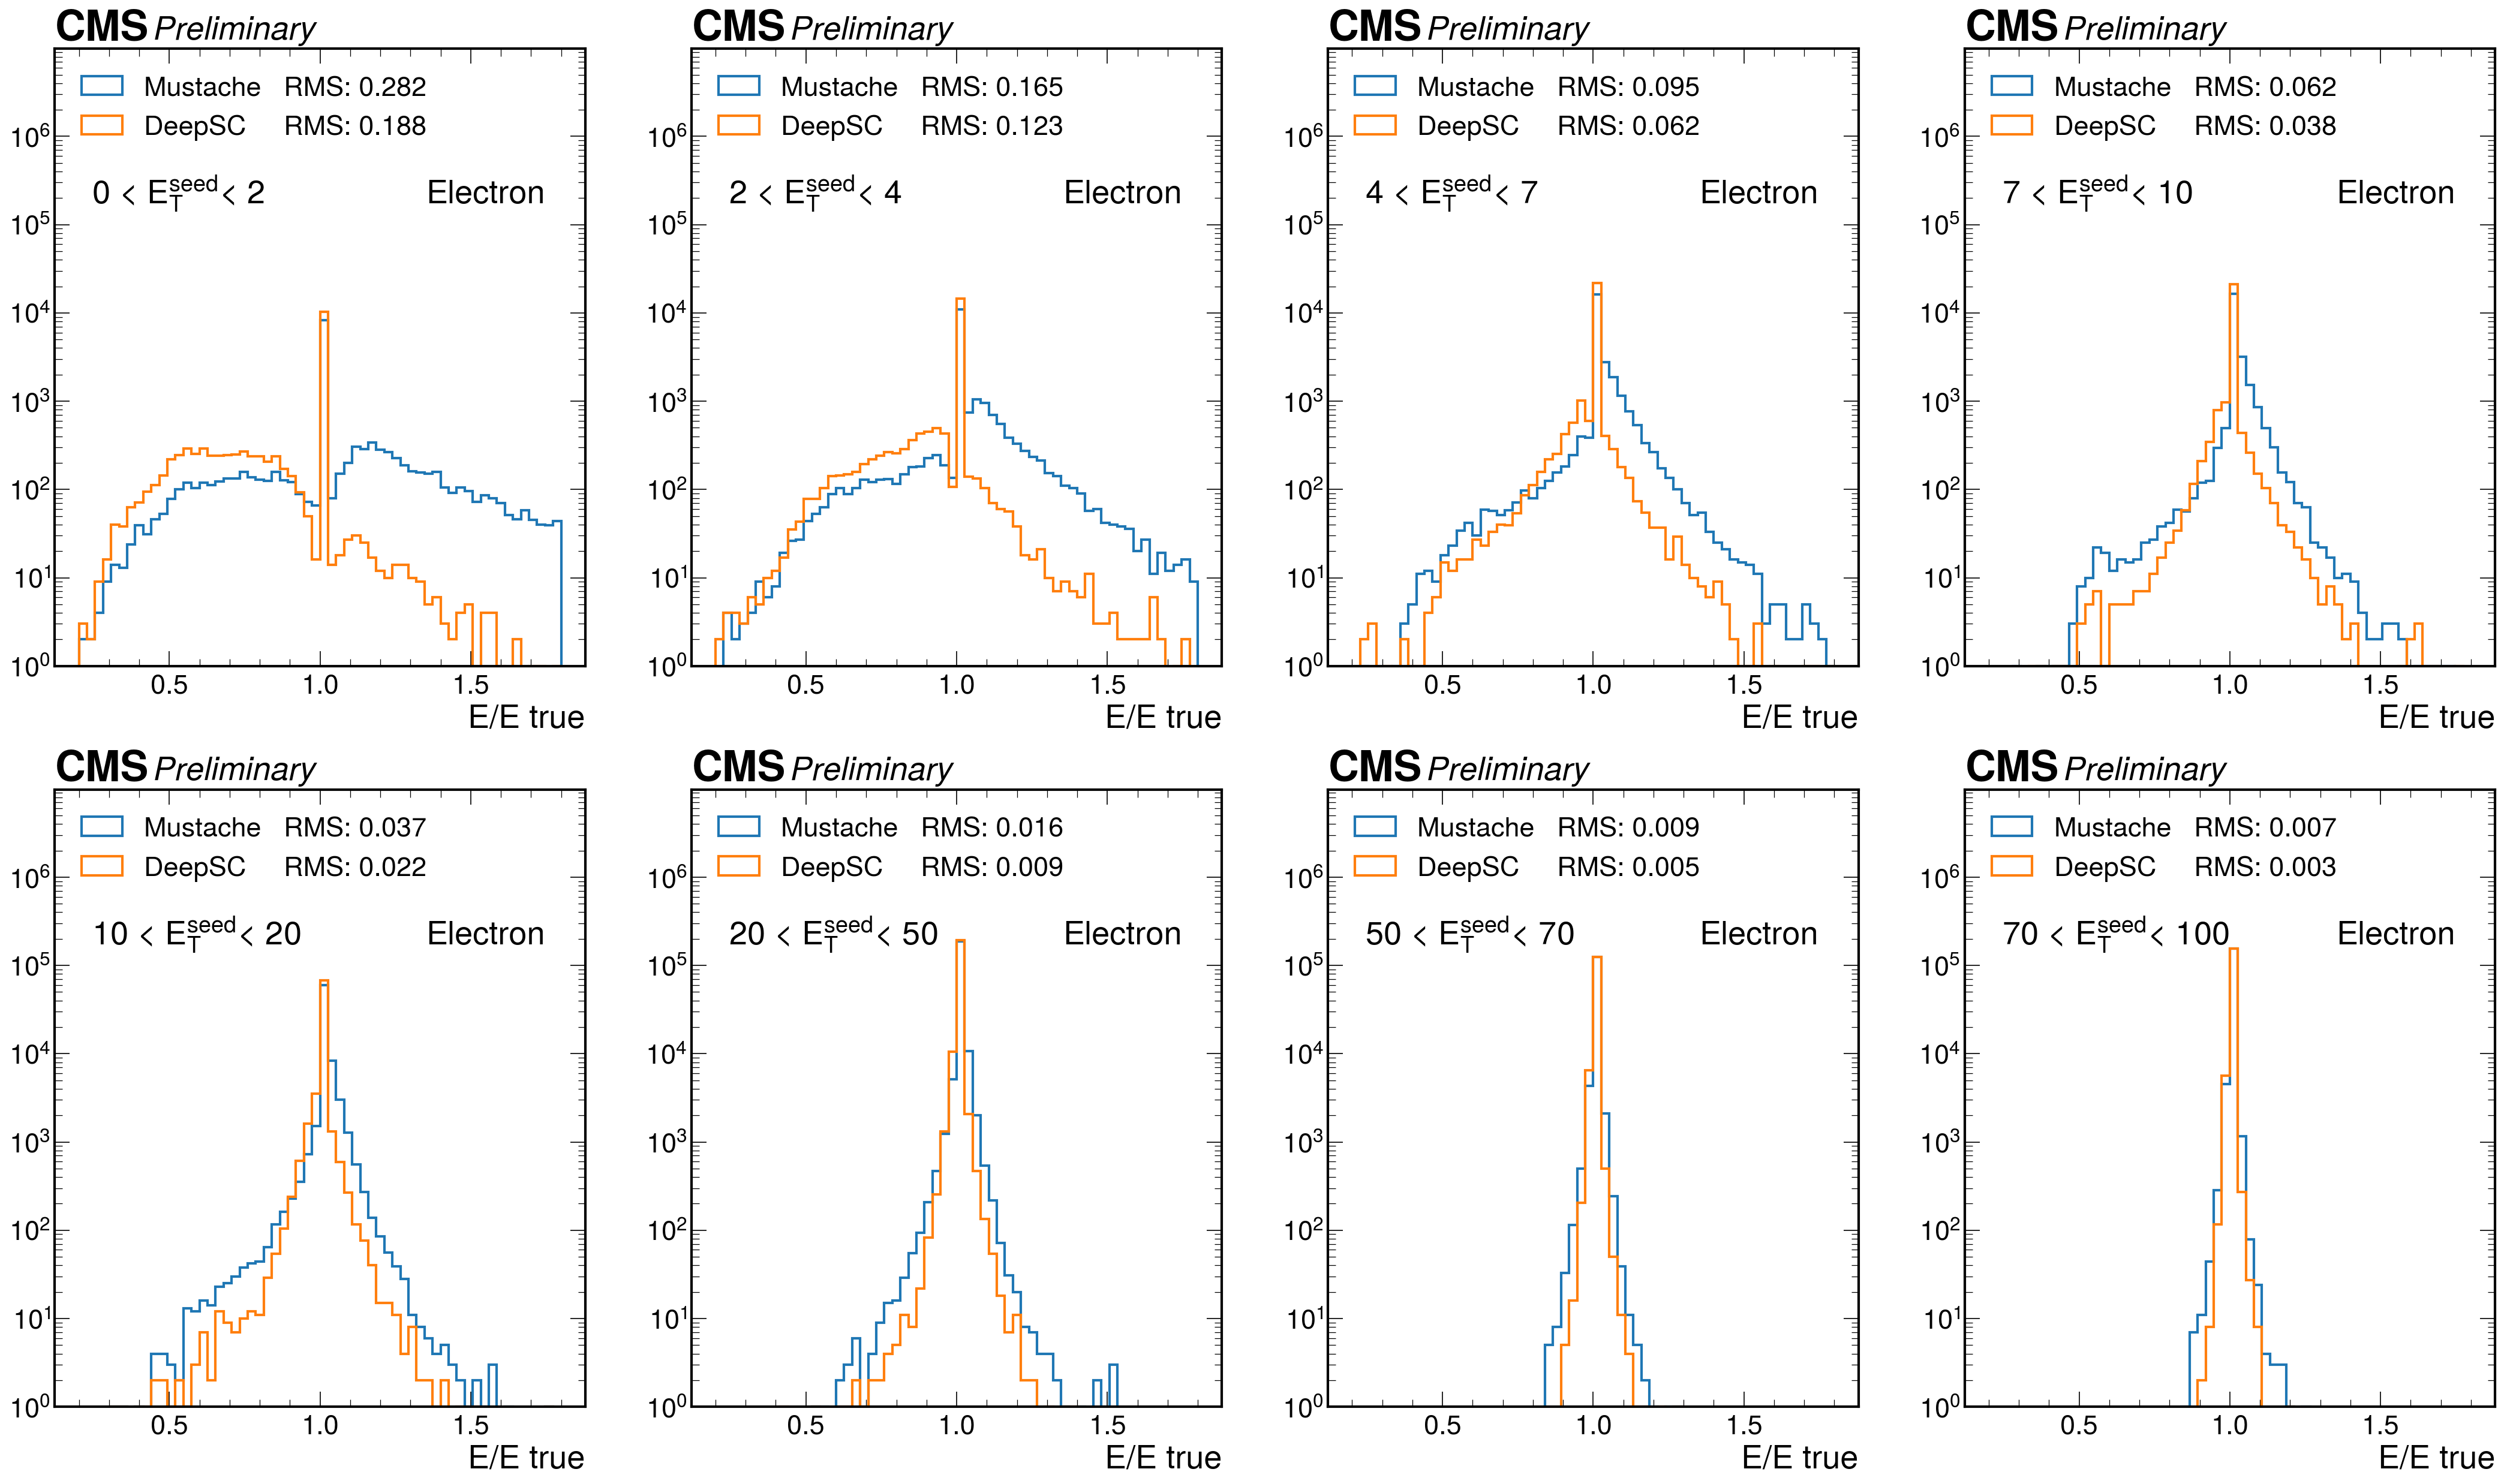

In [90]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.8)
bins=60

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(df.et>=e1) & (df.et<e2)]
        rms = dfx.En_ovEtrue.std()
        rms_mustache = dfx.En_ovEtrue_mustache.std()

        ax[j,i].hist(dfx.En_ovEtrue_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache   RMS: {:.3f}'.format(rms_mustache))
        A= ax[j,i].hist(dfx.En_ovEtrue,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     RMS: {:.3f}'.format(rms))
       
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e2 * maxY)
        ax[j,i].set_xlabel("E/E true")
        ax[j,i].text(0.07,0.75,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


# Rho dependency

In [293]:
df.columns

Index(['ncls', 'ncls_true', 'ncls_sel', 'ncls_sel_true', 'ncls_sel_must',
       'ncls_sel_must_true', 'Et_tot', 'En_tot', 'Et_true', 'Et_sel',
       'En_true', 'En_sel', 'Et_ovEtrue', 'En_ovEtrue', 'Et_sel_mustache',
       'En_sel_mustache', 'Et_ovEtrue_mustache', 'En_ovEtrue_mustache',
       'flavour', 'seed_eta', 'seed_phi', 'seed_ieta', 'seed_iphi', 'seed_iz',
       'en_seed', 'et_seed', 'en_seed_calib', 'et_seed_calib', 'seed_r9',
       'seed_swissCross', 'seed_nxtals', 'max_en_cluster', 'max_et_cluster',
       'max_deta_cluster', 'max_dphi_cluster', 'max_den_cluster',
       'max_det_cluster', 'min_en_cluster', 'min_et_cluster',
       'min_deta_cluster', 'min_dphi_cluster', 'min_den_cluster',
       'min_det_cluster', 'mean_en_cluster', 'mean_et_cluster',
       'mean_deta_cluster', 'mean_dphi_cluster', 'mean_den_cluster',
       'mean_det_cluster', 'en_true_sim', 'et_true_sim', 'en_true_gen',
       'et_true_gen', 'nclusters_insc', 'nVtx', 'rho', 'obsPU', 'truePU',
      

/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
W0531 22:46:16.540344 139958464681792 legend.py:1193] No handles with labels found to put in legend.


(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

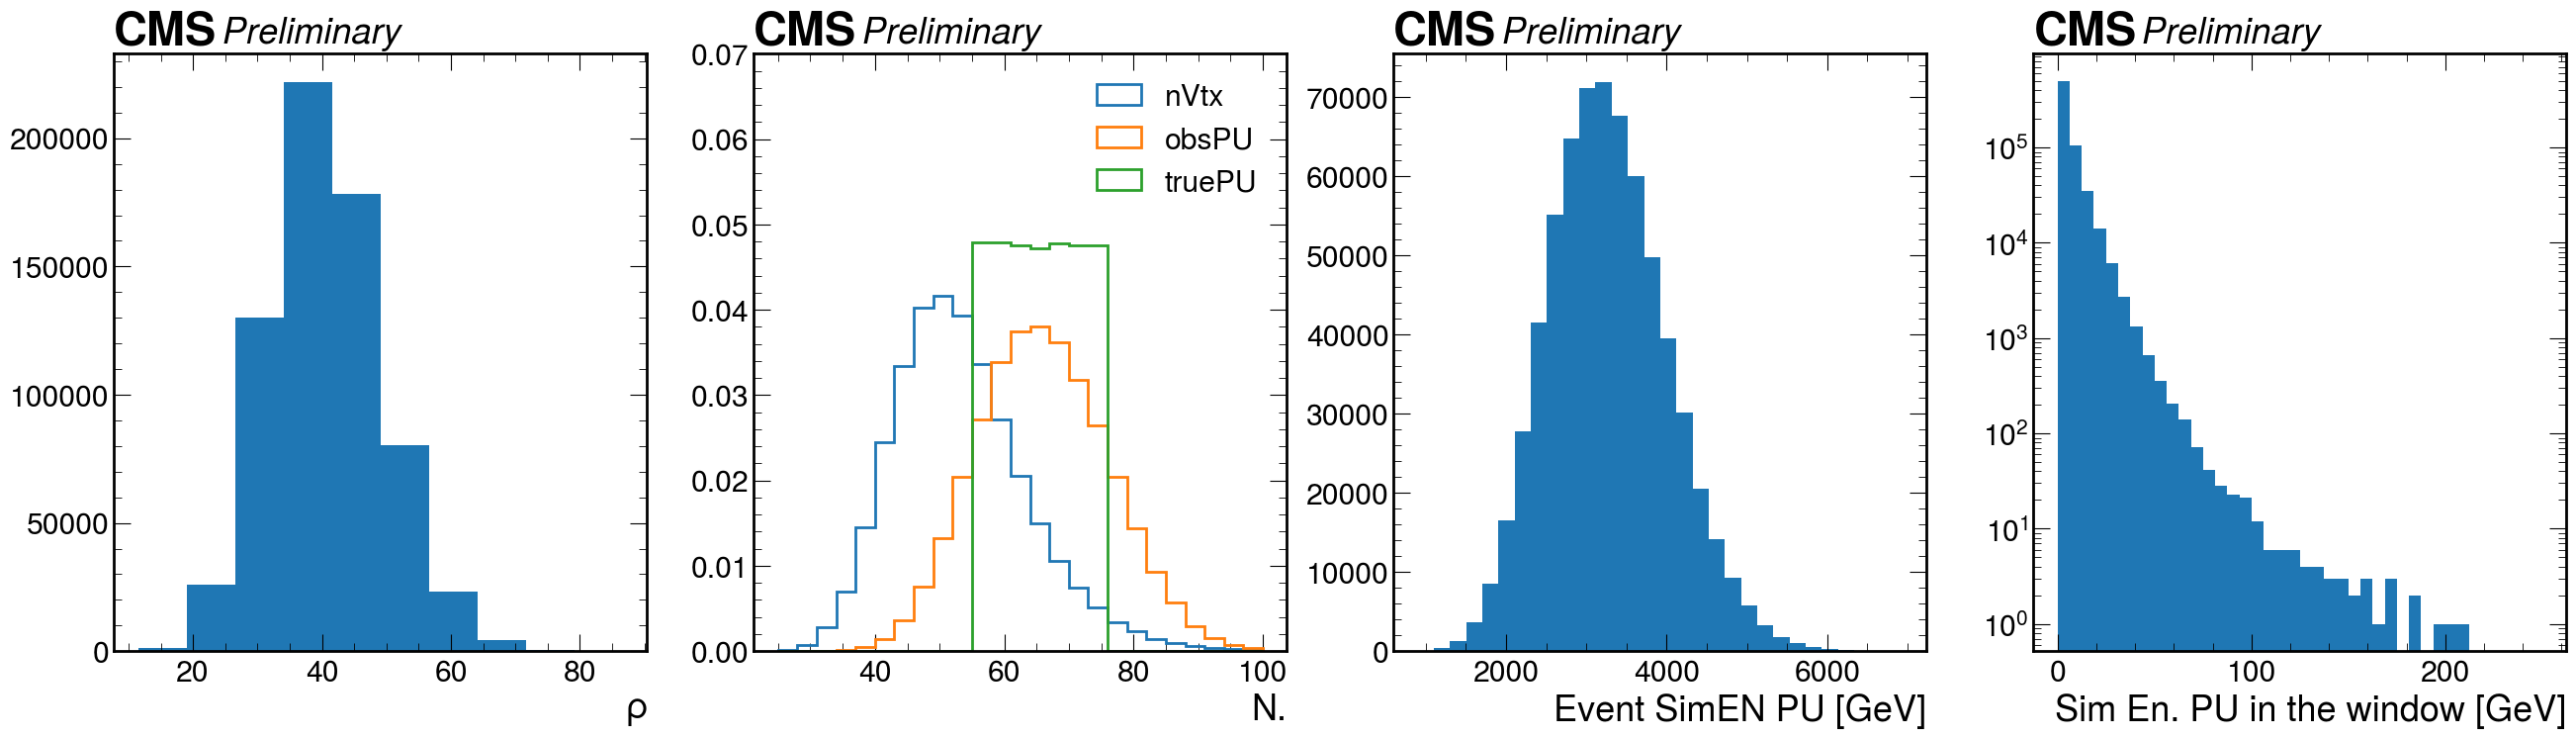

In [89]:
f, (ax, ab, ac, ad), = plt.subplots(1,4, figsize=(32,8), dpi=100)

ax.hist(df.rho, bins=10)
ax.set_xlabel("$\\rho$")

ab.hist(df.nVtx, bins=25, range=(25,100), histtype="step", linewidth=2, label="nVtx", density=True)
ab.hist(df.obsPU, bins=25, range=(25,100), histtype="step", linewidth=2, label="obsPU",density=True)
ab.hist(df.truePU, bins=25, range=(25,100), histtype="step", linewidth=2, label="truePU",density=True)
ab.legend()
ab.set_ylim(0, 0.07)
ab.set_xlabel("N.")


ac.hist(df.event_tot_simen_PU, bins=30)
ac.set_xlabel("Event SimEN PU [GeV]")


ad.hist(df.wtot_simen_PU, bins=40, range=(0,250))
ad.legend()
ad.set_yscale("log")
ad.set_xlabel("Sim En. PU in the window [GeV]")


hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)
hep.cms.text("Preliminary ",loc=0, ax=ac)
hep.cms.text("Preliminary ",loc=0, ax=ad)

In [295]:
r = list(range(35, 100, (100-35)//8))

In [296]:
r

[35, 43, 51, 59, 67, 75, 83, 91, 99]

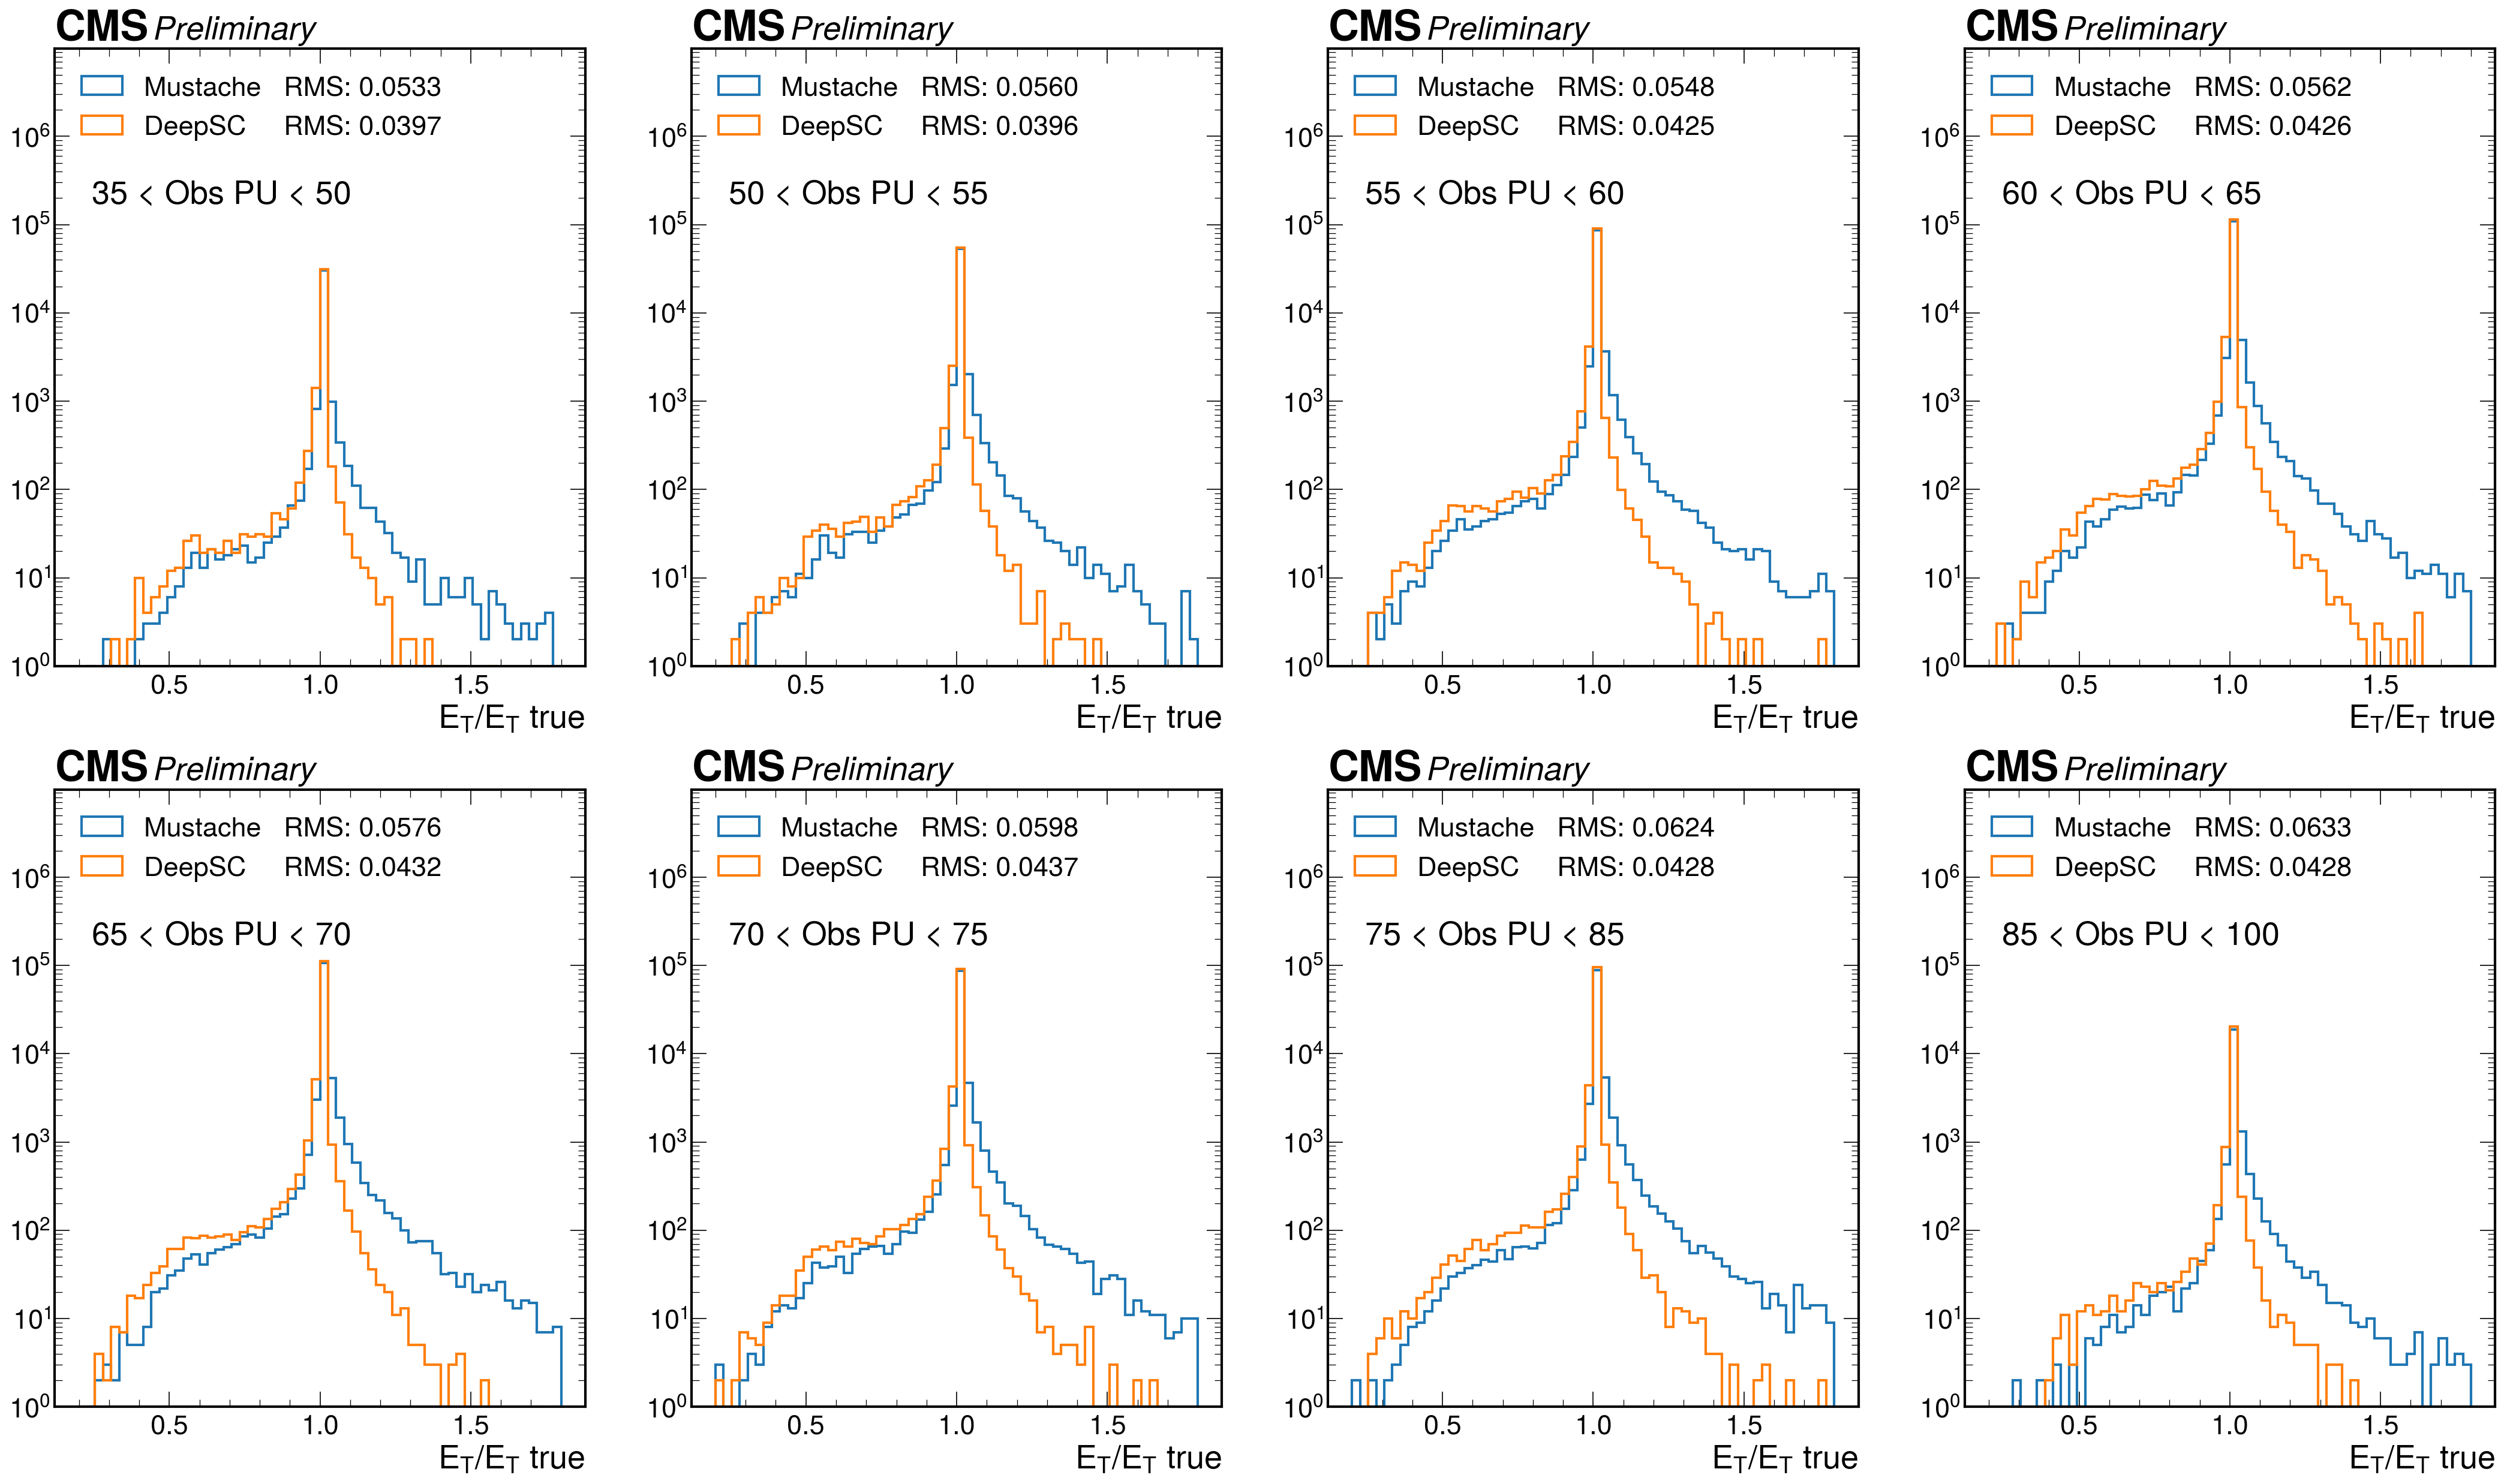

In [88]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.8)
bins=60


r = [35, 50, 55, 60, 65, 70, 75, 85, 100]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx = df[(abs(df.obsPU)>=e1) & (abs(df.obsPU)<e2)]
        rms = dfx.Et_ovEtrue.std()
        rms_mustache = dfx.Et_ovEtrue_mustache.std()

        ax[j,i].hist(dfx.Et_ovEtrue_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache   RMS: {:.4f}'.format(rms_mustache))
        A= ax[j,i].hist(dfx.Et_ovEtrue,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     RMS: {:.4f}'.format(rms))
       
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e2 * maxY)
        ax[j,i].set_xlabel("$E_T/E_T$ true")
        ax[j,i].text(0.07,0.75,  str(e1) + ' < Obs PU < ' + str(e2), transform = ax[j,i].transAxes)  

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


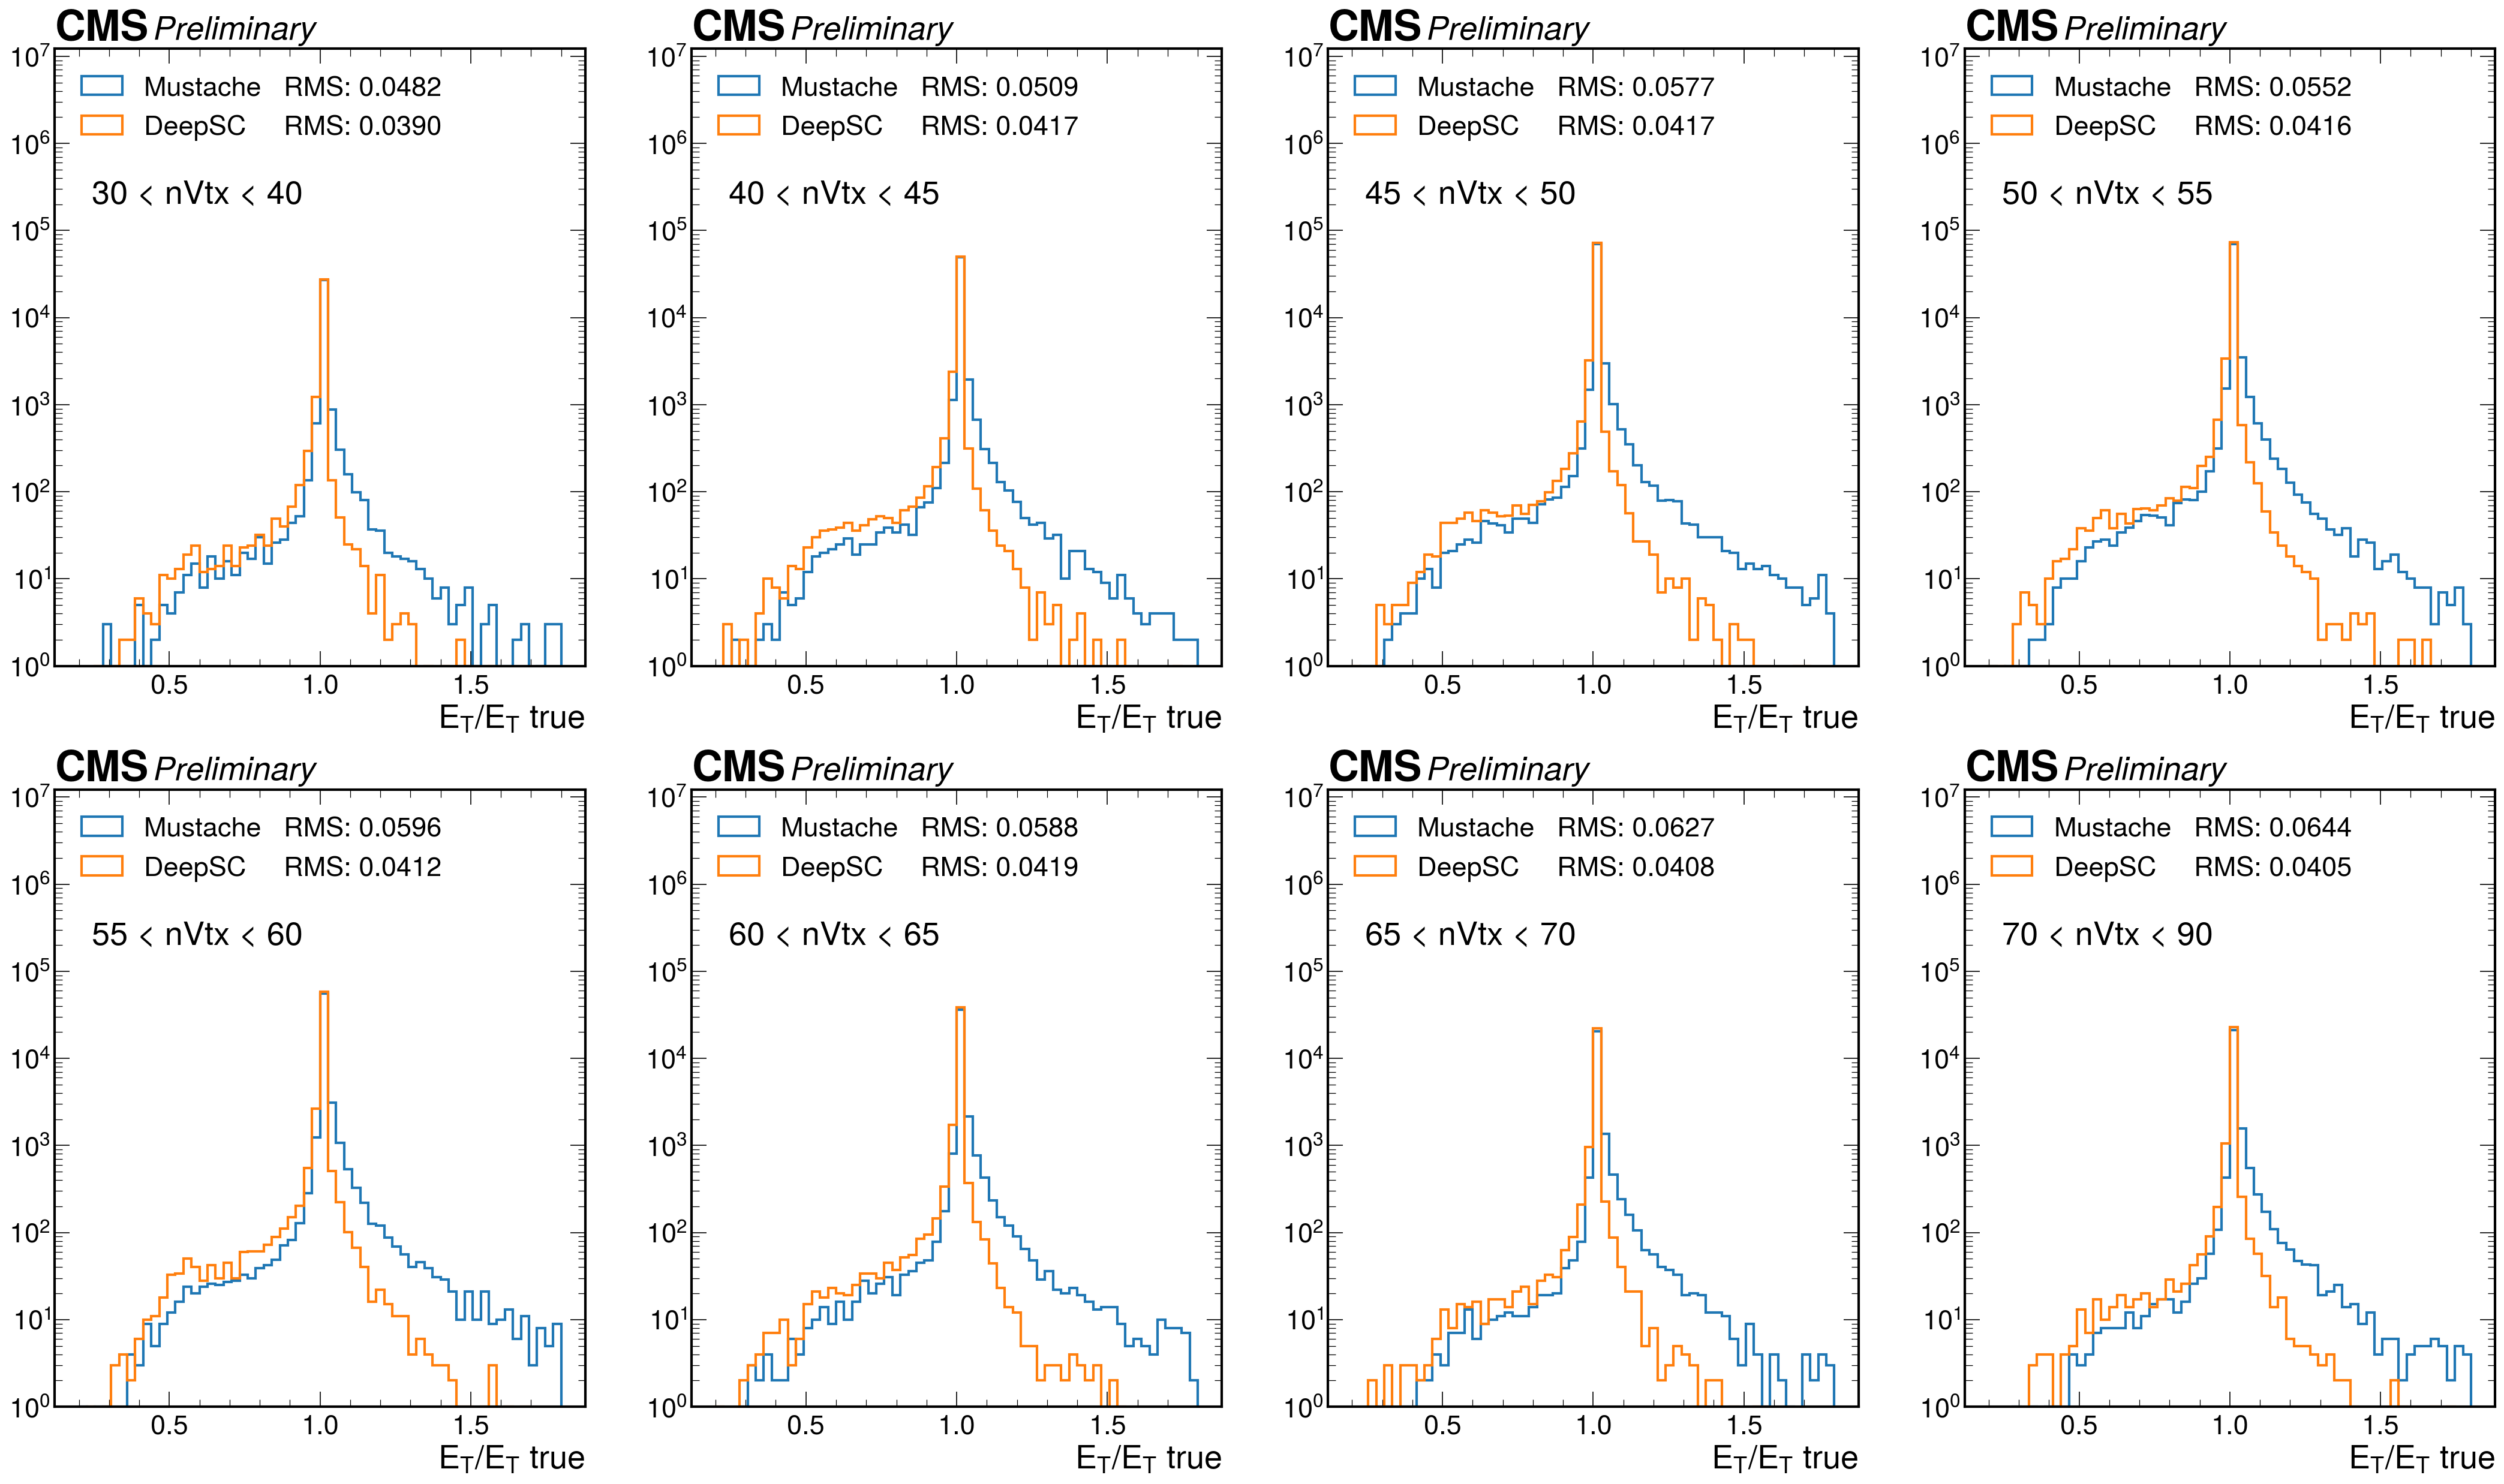

In [298]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.8)
bins=60


r = [30,40,45,50,55,60,65,70,90]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx = df[(df.nVtx>=e1) & (df.nVtx<e2)]
        rms = dfx.Et_ovEtrue.std()
        rms_mustache = dfx.Et_ovEtrue_mustache.std()

        ax[j,i].hist(dfx.Et_ovEtrue_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache   RMS: {:.4f}'.format(rms_mustache))
        A= ax[j,i].hist(dfx.Et_ovEtrue,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     RMS: {:.4f}'.format(rms))
       
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e2 * maxY)
        ax[j,i].set_xlabel("$E_T/E_T$ true")
        ax[j,i].text(0.07,0.75, '{:.0f} < nVtx < {:.0f}'.format(e1,e2), transform = ax[j,i].transAxes)  

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


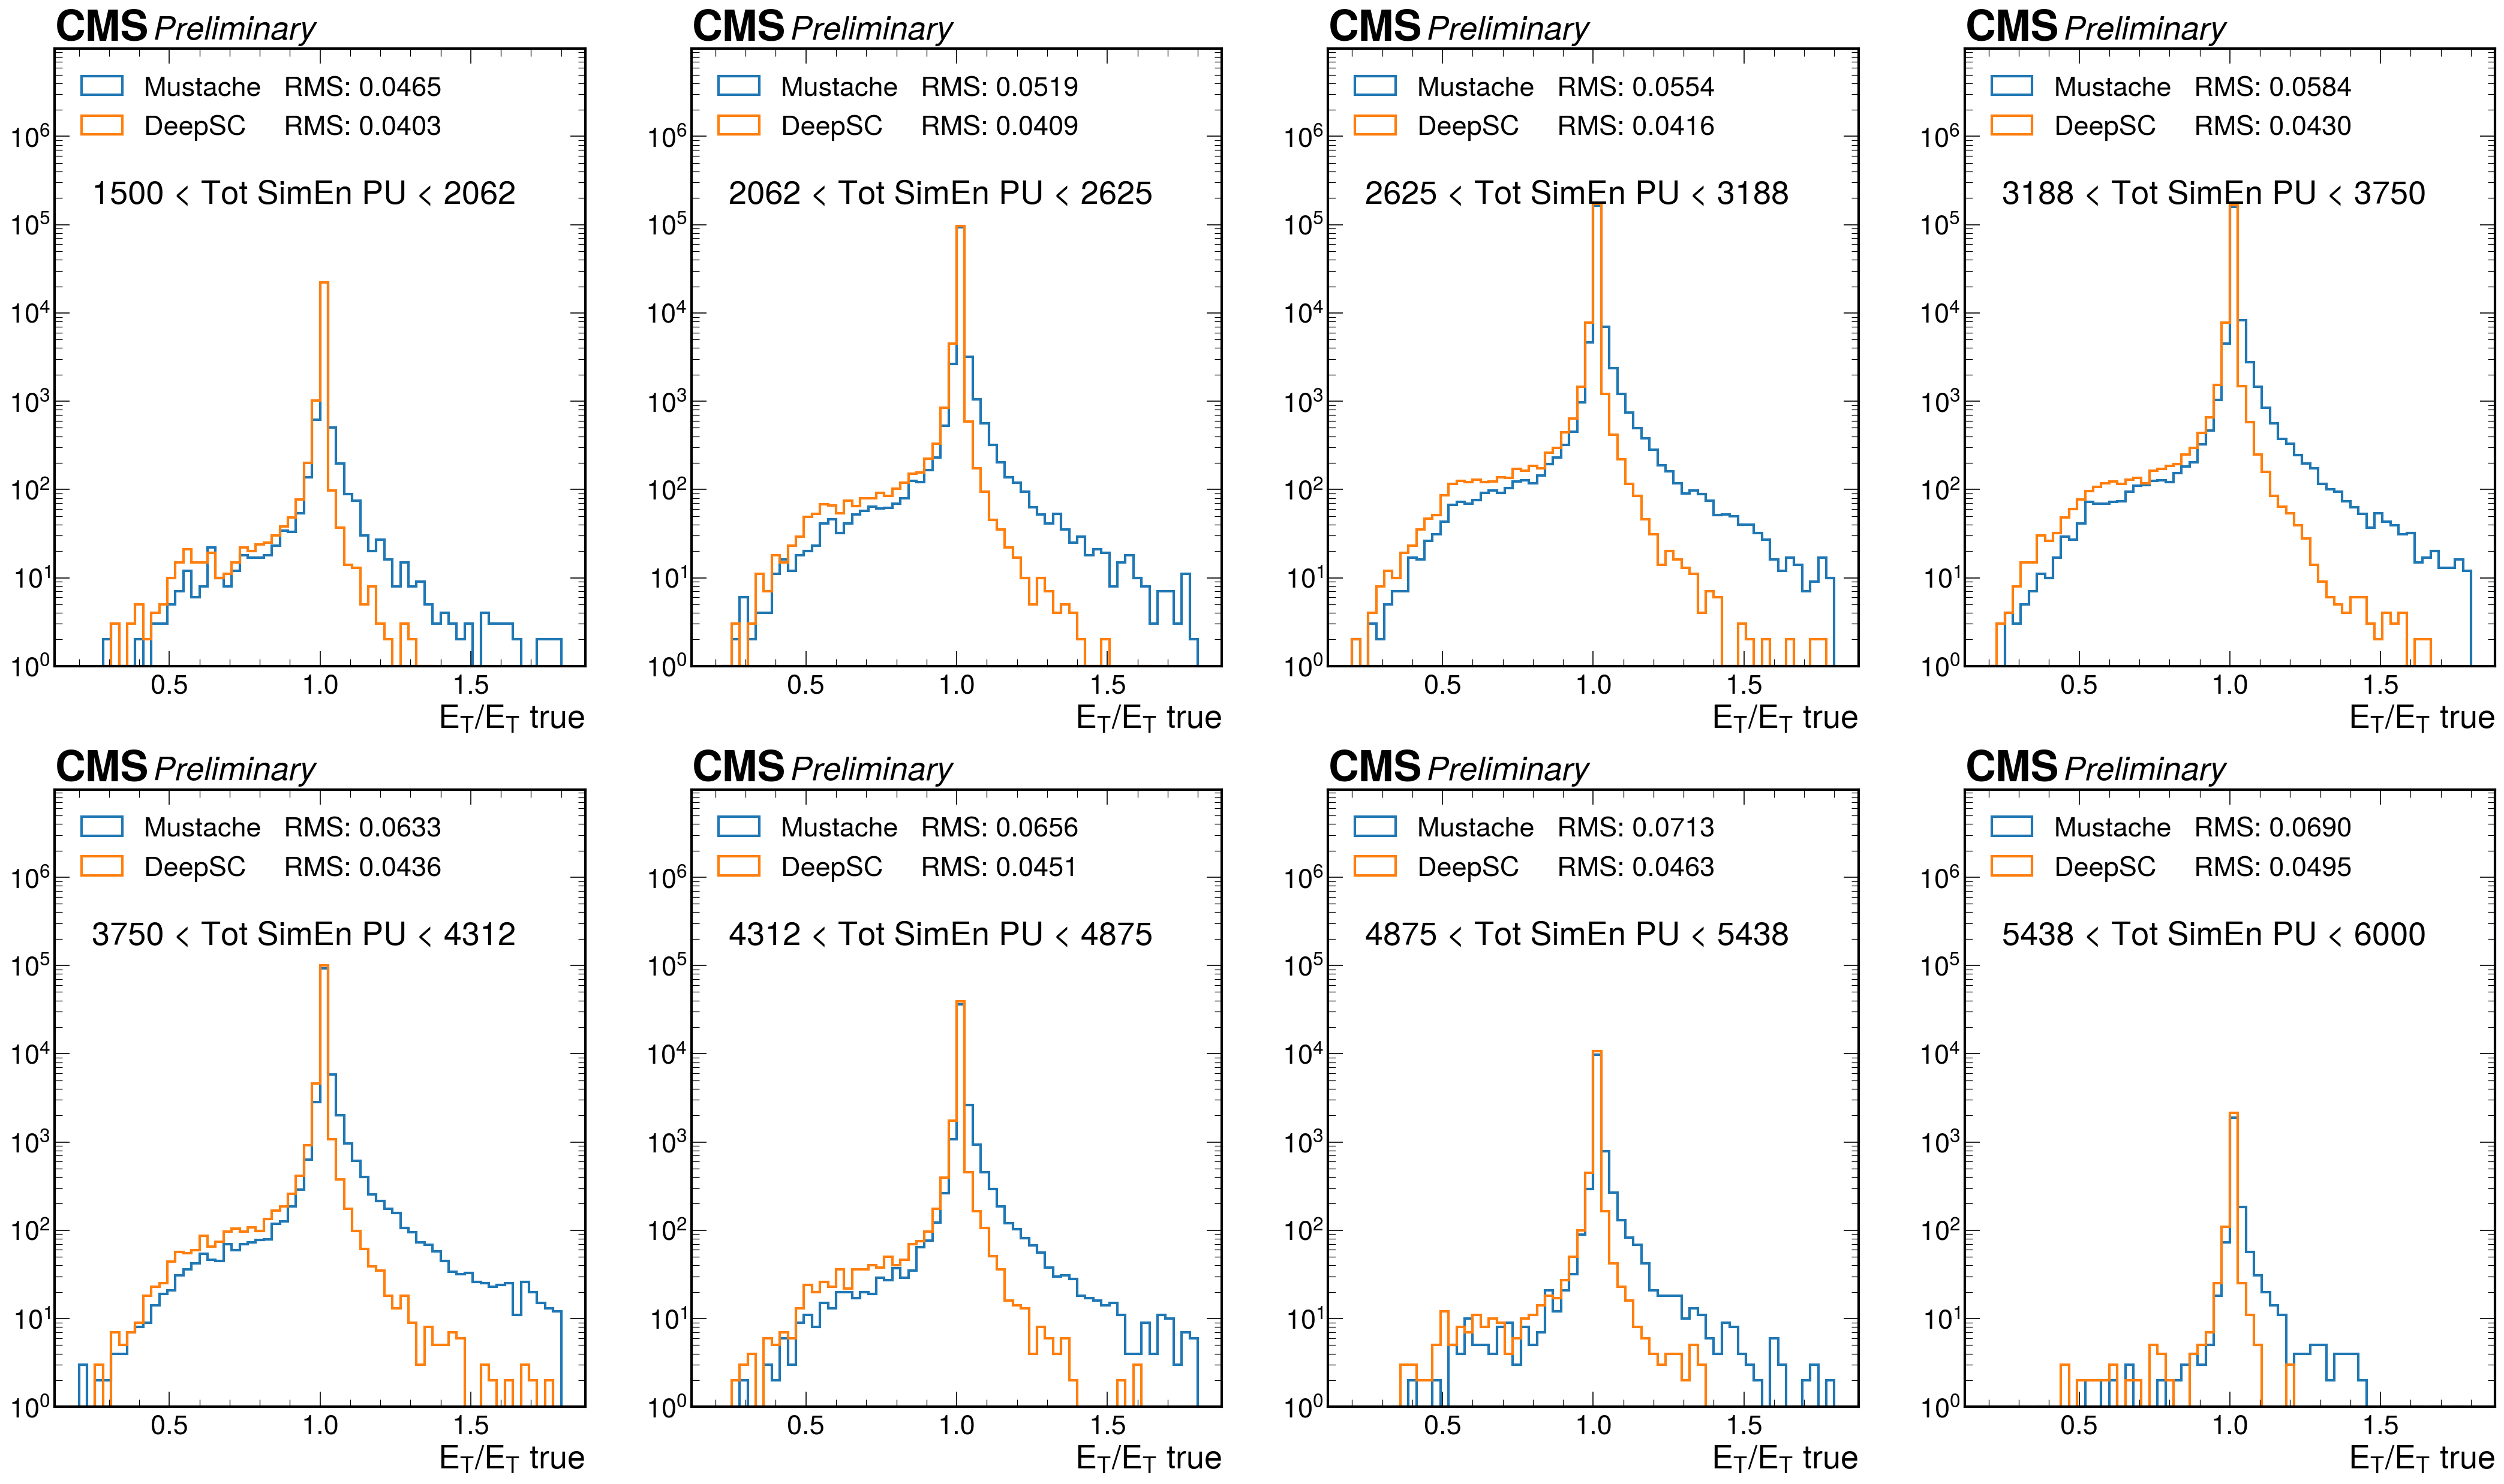

In [87]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.8)
bins=60


r = np.linspace(1500,6000,9)
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx = df[(df.event_tot_simen_PU>=e1) & (df.event_tot_simen_PU<e2)]
        rms = dfx.Et_ovEtrue.std()
        rms_mustache = dfx.Et_ovEtrue_mustache.std()

        ax[j,i].hist(dfx.Et_ovEtrue_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache   RMS: {:.4f}'.format(rms_mustache))
        A= ax[j,i].hist(dfx.Et_ovEtrue,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     RMS: {:.4f}'.format(rms))
       
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e2 * maxY)
        ax[j,i].set_xlabel("$E_T/E_T$ true")
        ax[j,i].text(0.07,0.75, '{:.0f} < Tot SimEn PU < {:.0f}'.format(e1,e2), transform = ax[j,i].transAxes)  

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

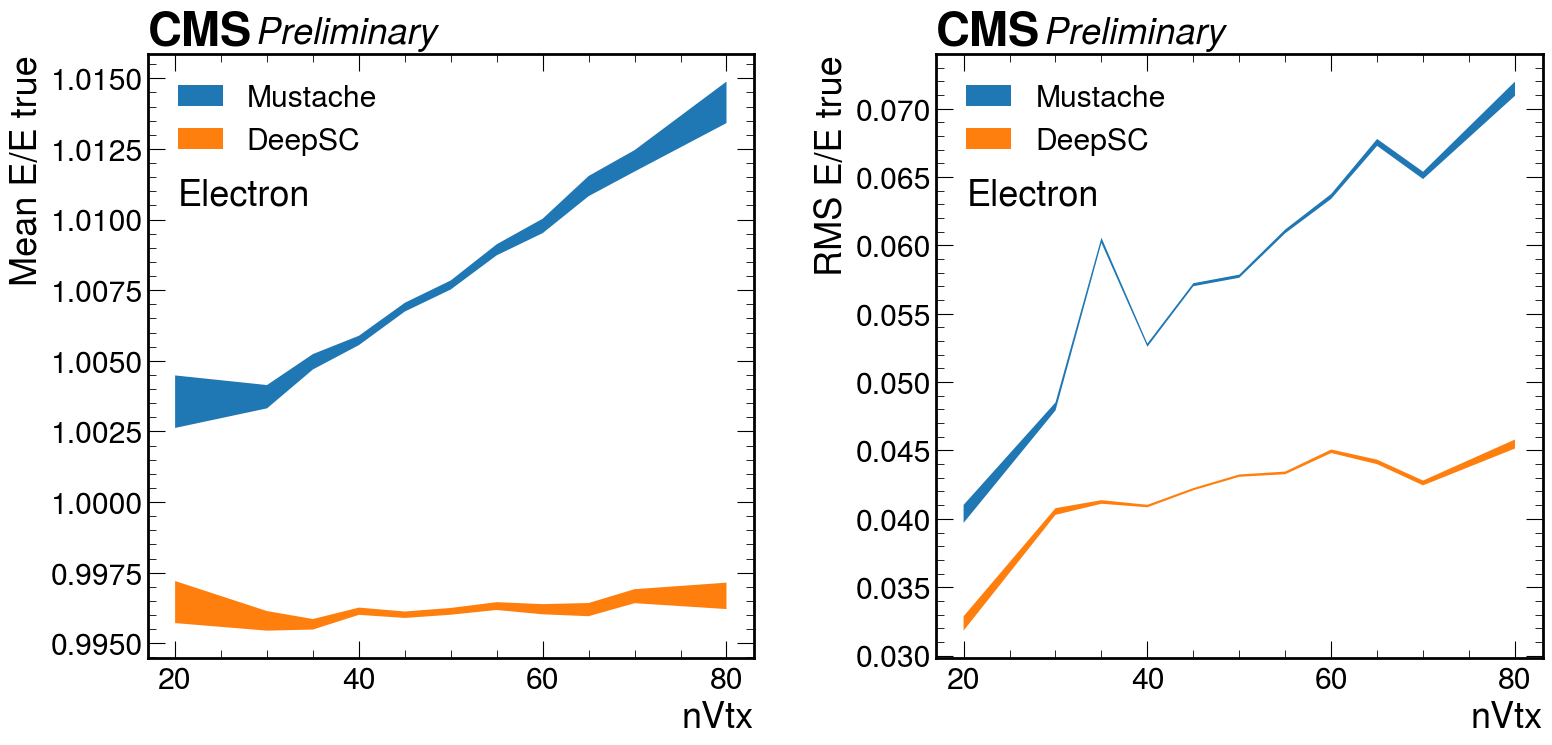

In [75]:
fig, (ab, ax) = plt.subplots(1,2, figsize=(18,8),dpi=100, )
plt.subplots_adjust( wspace=0.3)

nvtx = [20,30,35,40,45,50,55,60,65,70,80,130]
df["nvtx_bin"] = pd.cut(df.nVtx, nvtx, labels=list(range(len(nvtx)-1)))
mean =  df.groupby(["nvtx_bin"])["En_ovEtrue","En_ovEtrue_mustache"].mean()
rms =  df.groupby(["nvtx_bin"])["En_ovEtrue","En_ovEtrue_mustache"].std() 

c = df.groupby(["nvtx_bin"])["Et_ovEtrue"].count()

err_rms_deep = rms.En_ovEtrue / np.sqrt(2*(c-1))
err_rms_must = rms.En_ovEtrue_mustache / np.sqrt(2*(c-1))
err_mean_deep = rms.En_ovEtrue / np.sqrt(c)
err_mean_must = rms.En_ovEtrue_mustache / np.sqrt(c)

ax.fill_between(nvtx[:-1], rms.En_ovEtrue_mustache-err_rms_must, rms.En_ovEtrue_mustache+err_rms_must, label="Mustache",)
ax.fill_between(nvtx[:-1], rms.En_ovEtrue-err_rms_deep,rms.En_ovEtrue+err_rms_deep, label="DeepSC")
ax.set_xlabel("nVtx")
ax.set_ylabel("RMS E/E true")
ax.legend(loc="upper left")
ax.text(0.05, 0.75, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary ",loc=0, ax=ax)

ab.fill_between(nvtx[:-1], mean.En_ovEtrue_mustache-err_mean_must, mean.En_ovEtrue_mustache+err_mean_must, label="Mustache")
ab.fill_between(nvtx[:-1], mean.En_ovEtrue-err_mean_deep, mean.En_ovEtrue+err_mean_deep, label="DeepSC")
ab.set_xlabel("nVtx")
ab.set_ylabel("Mean E/E true")
ab.legend(loc="upper left")
ab.text(0.05, 0.75, flavour, transform=ab.transAxes)

hep.cms.text("Preliminary ",loc=0, ax=ab)



# By Number of clusters

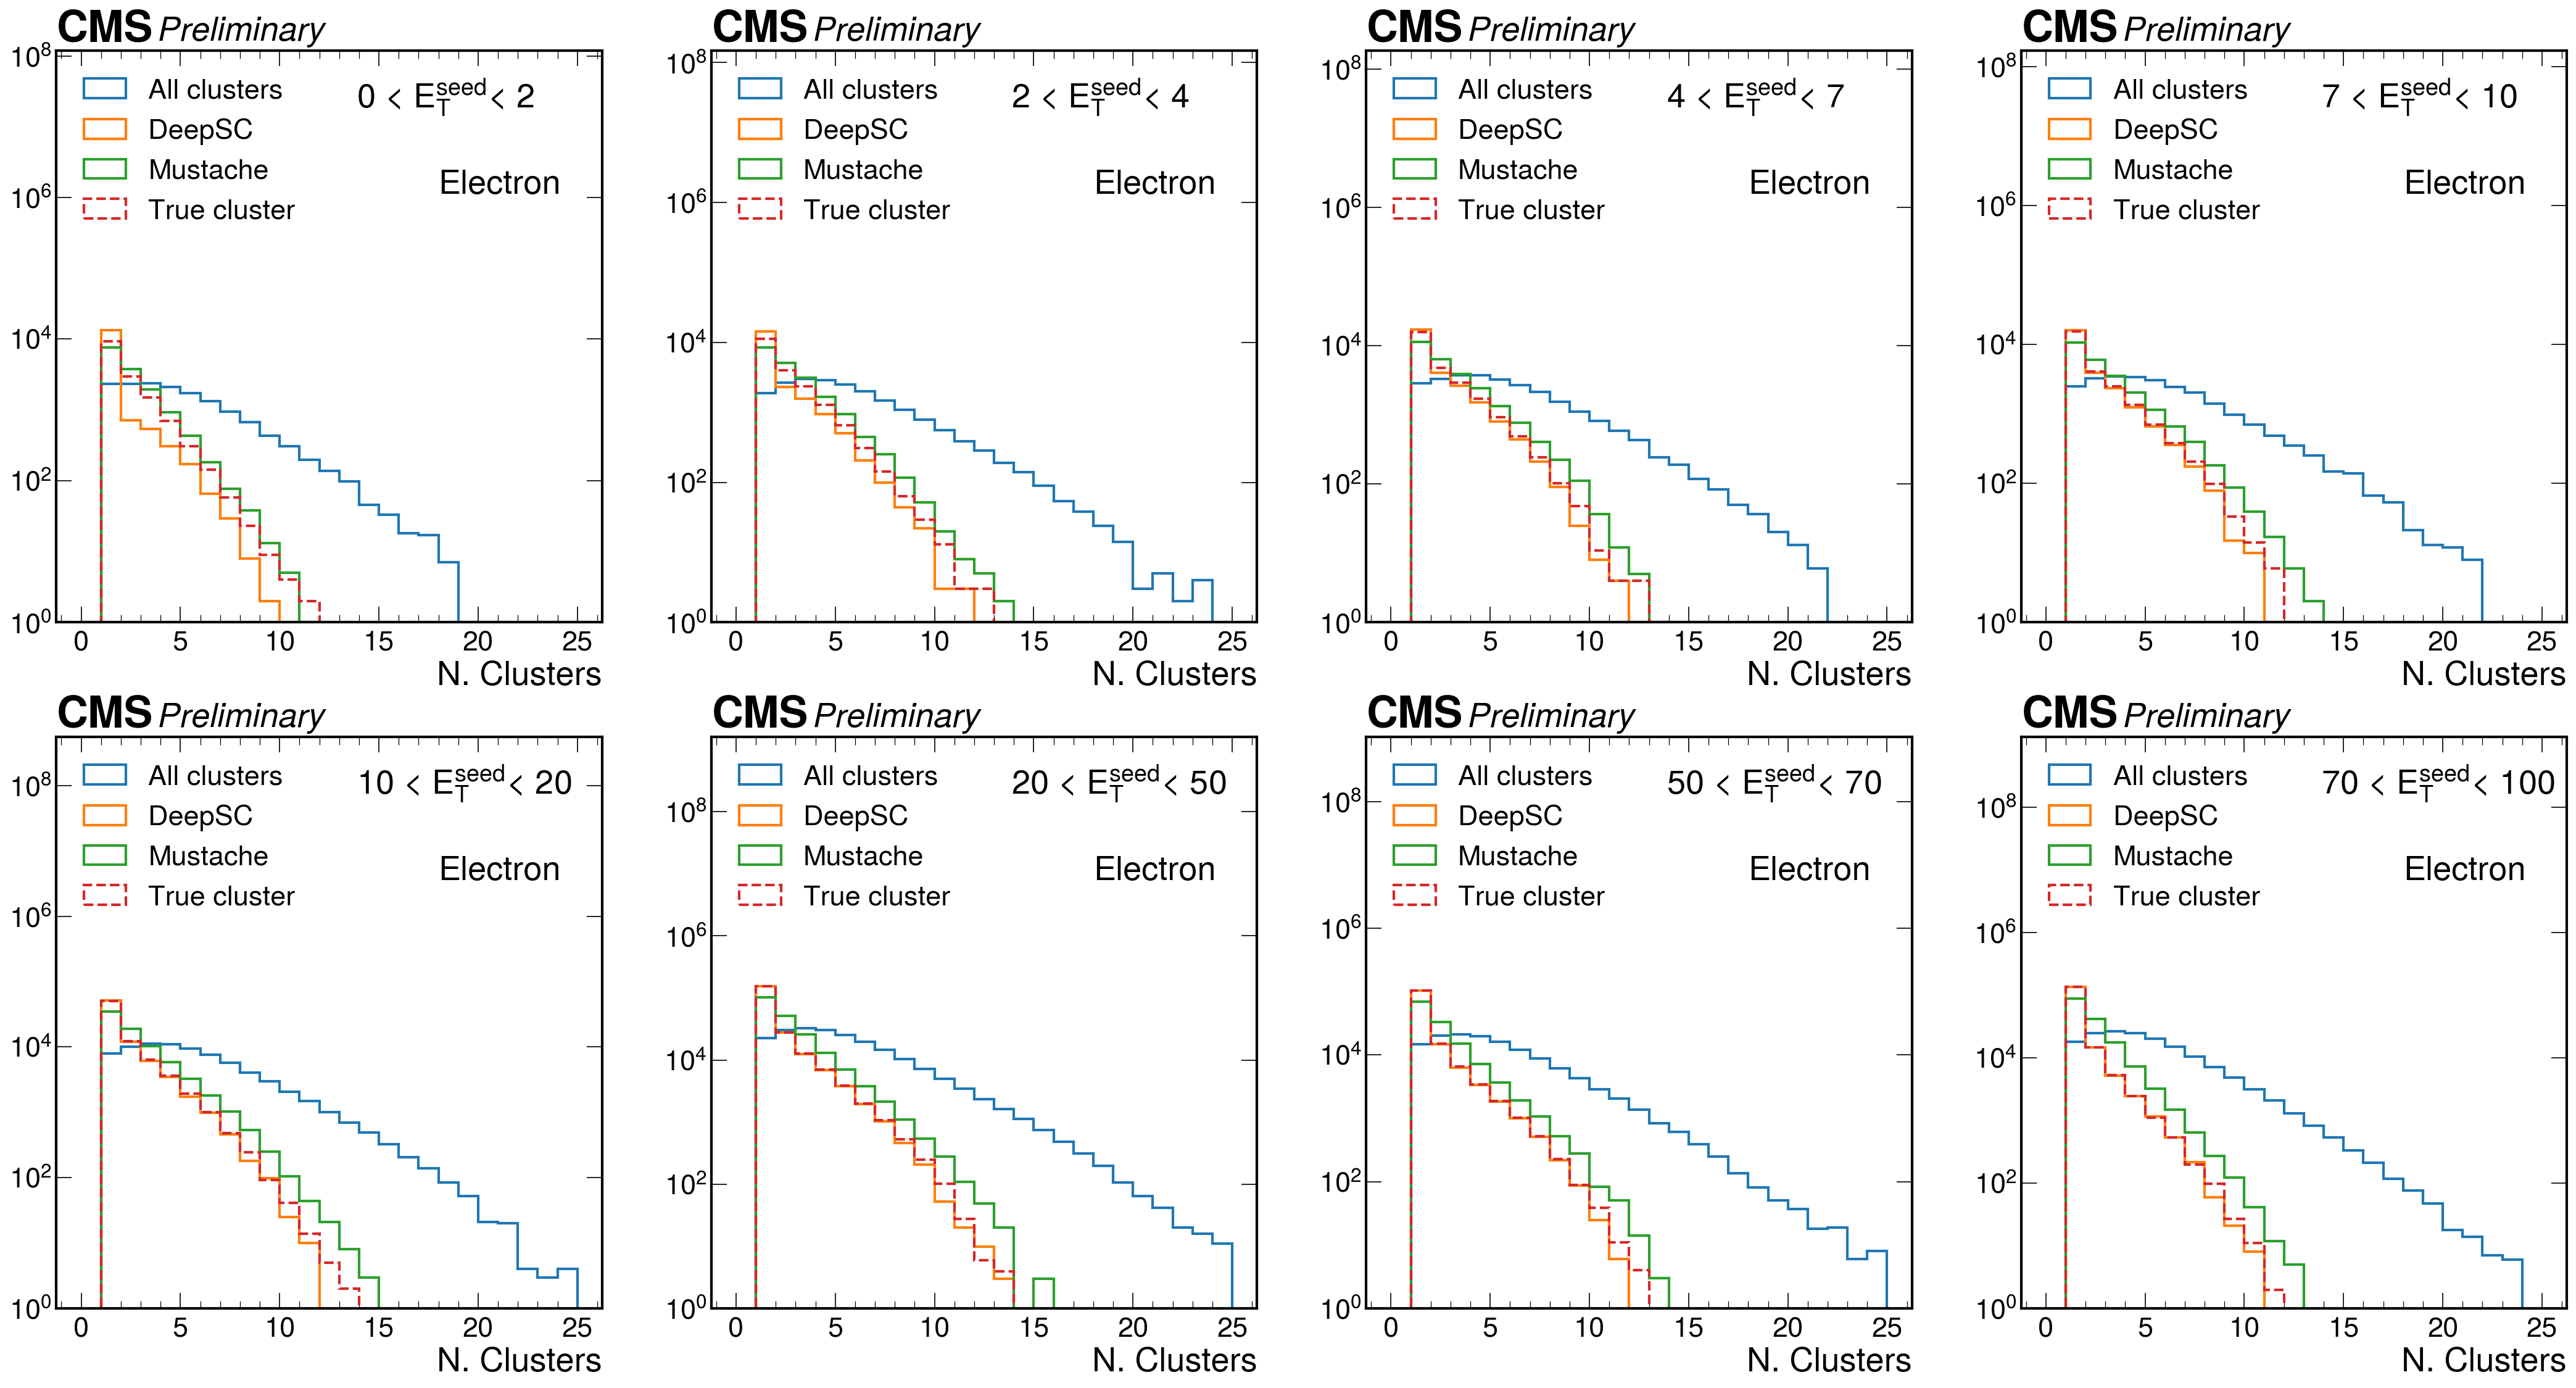

In [76]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (0,25)
bins= 25

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]



for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(df.et>=e1) & (df.et<e2)]

        A = ax[j,i].hist(dfx.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
        ax[j,i].hist(dfx.ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC')
        ax[j,i].hist(dfx.ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
        ax[j,i].hist(dfx.ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 5e4 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


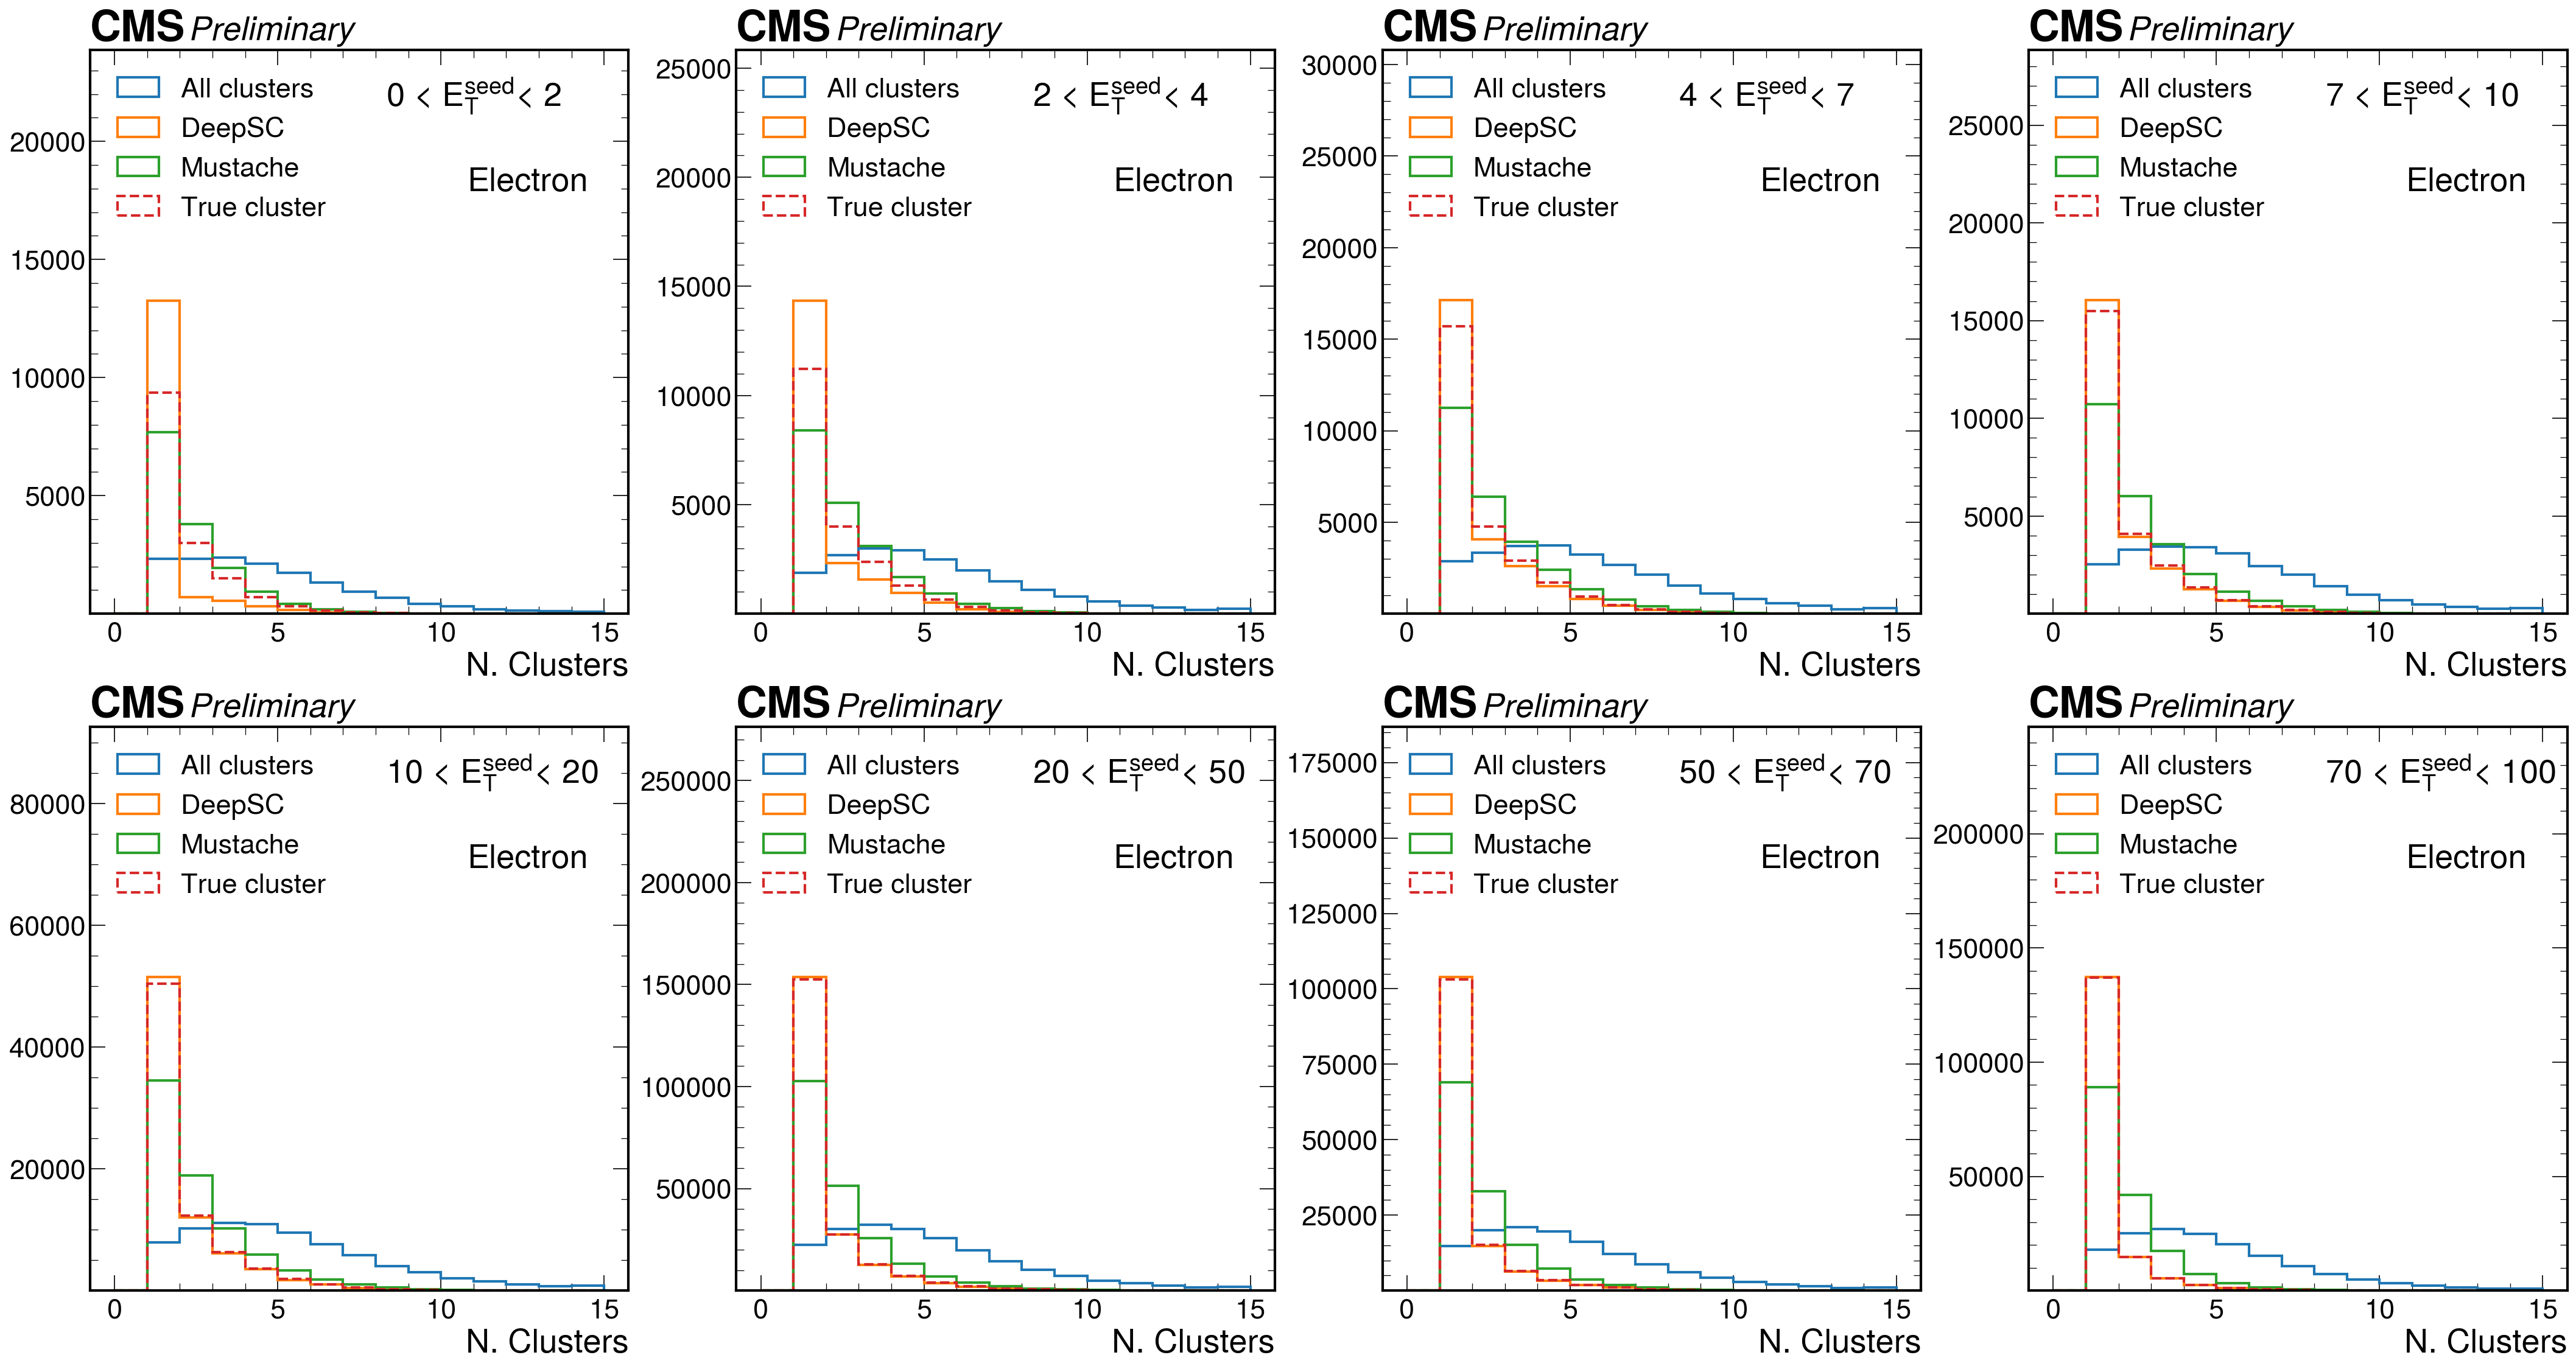

In [77]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (0,15)
bins= 15

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]


for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(df.et>=e1) & (df.et<e2)]

        ax[j,i].hist(dfx.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
        A = ax[j,i].hist(dfx.ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC')
        ax[j,i].hist(dfx.ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
        ax[j,i].hist(dfx.ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_ylim(1, 1.8 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


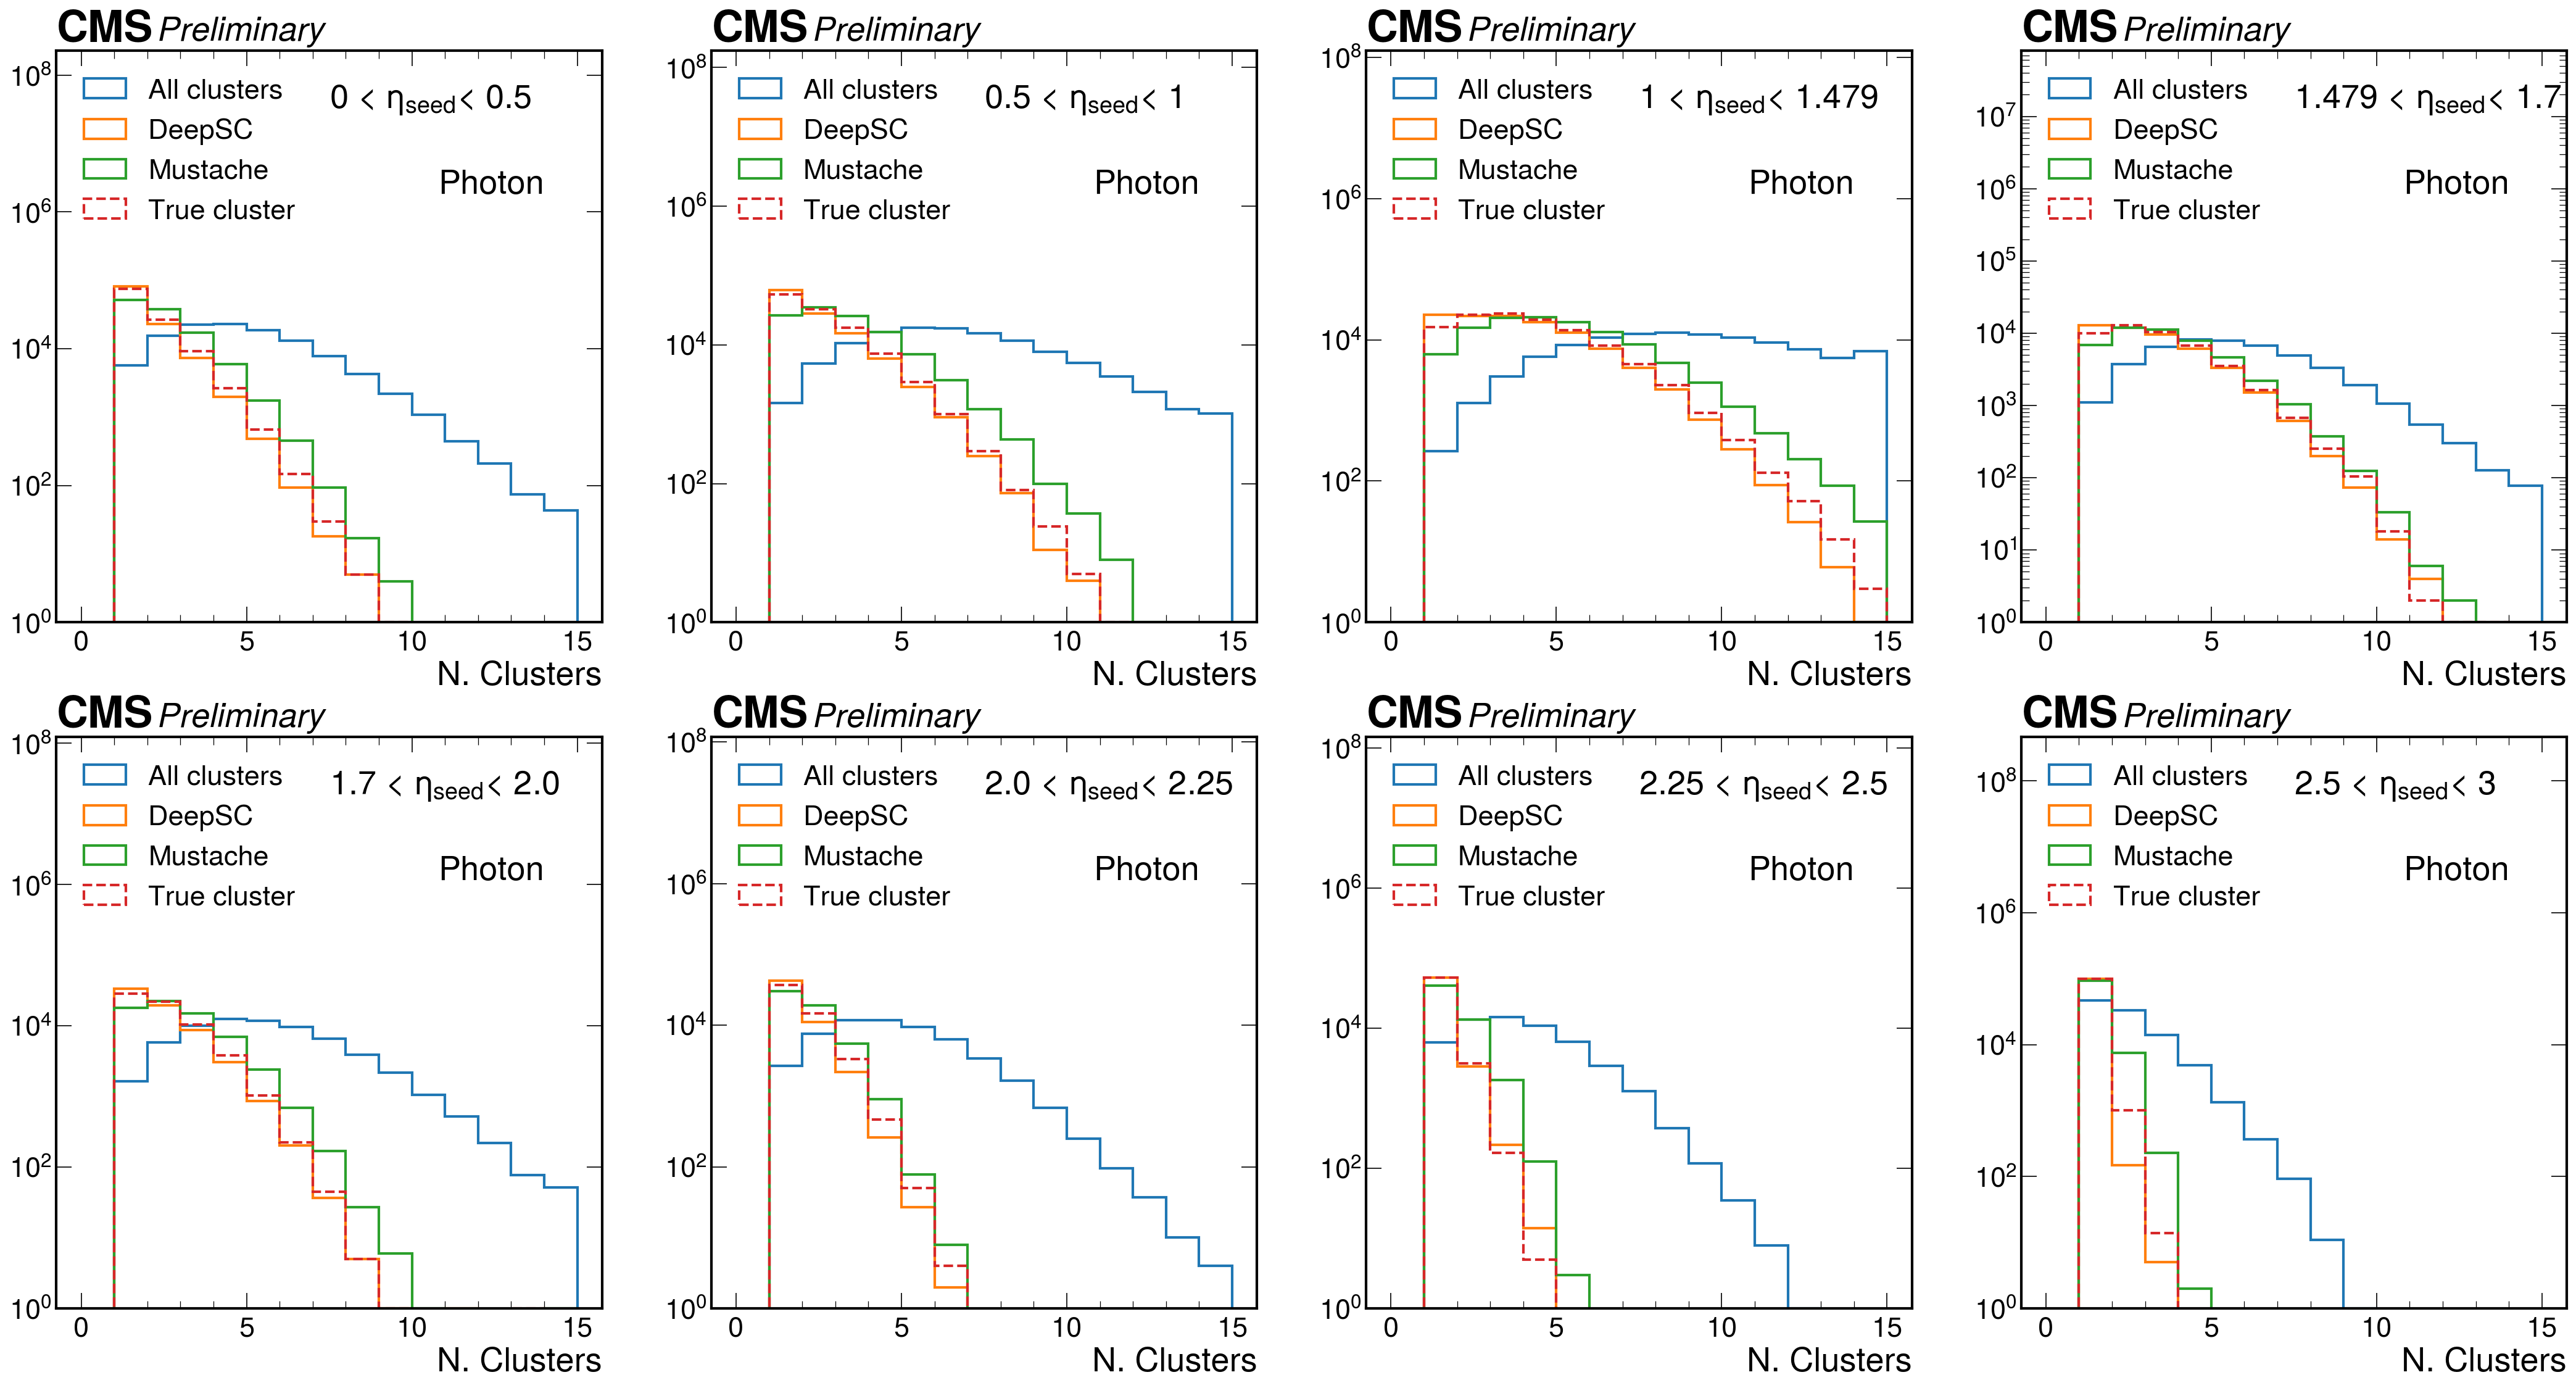

In [69]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (0,15)
bins=15

r = [0, 0.5,1, 1.479, 1.7, 2.0, 2.25, 2.5, 3]
s = [[], []]

for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))
    
for j,etss in enumerate(s): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(abs(df.eta)>=e1) & (abs(df.eta)<e2)]

        A = ax[j,i].hist(dfx.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
        ax[j,i].hist(dfx.ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC')
        ax[j,i].hist(dfx.ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
        ax[j,i].hist(dfx.ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1e4 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.5,0.9, str(e1) + ' < $\eta_{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


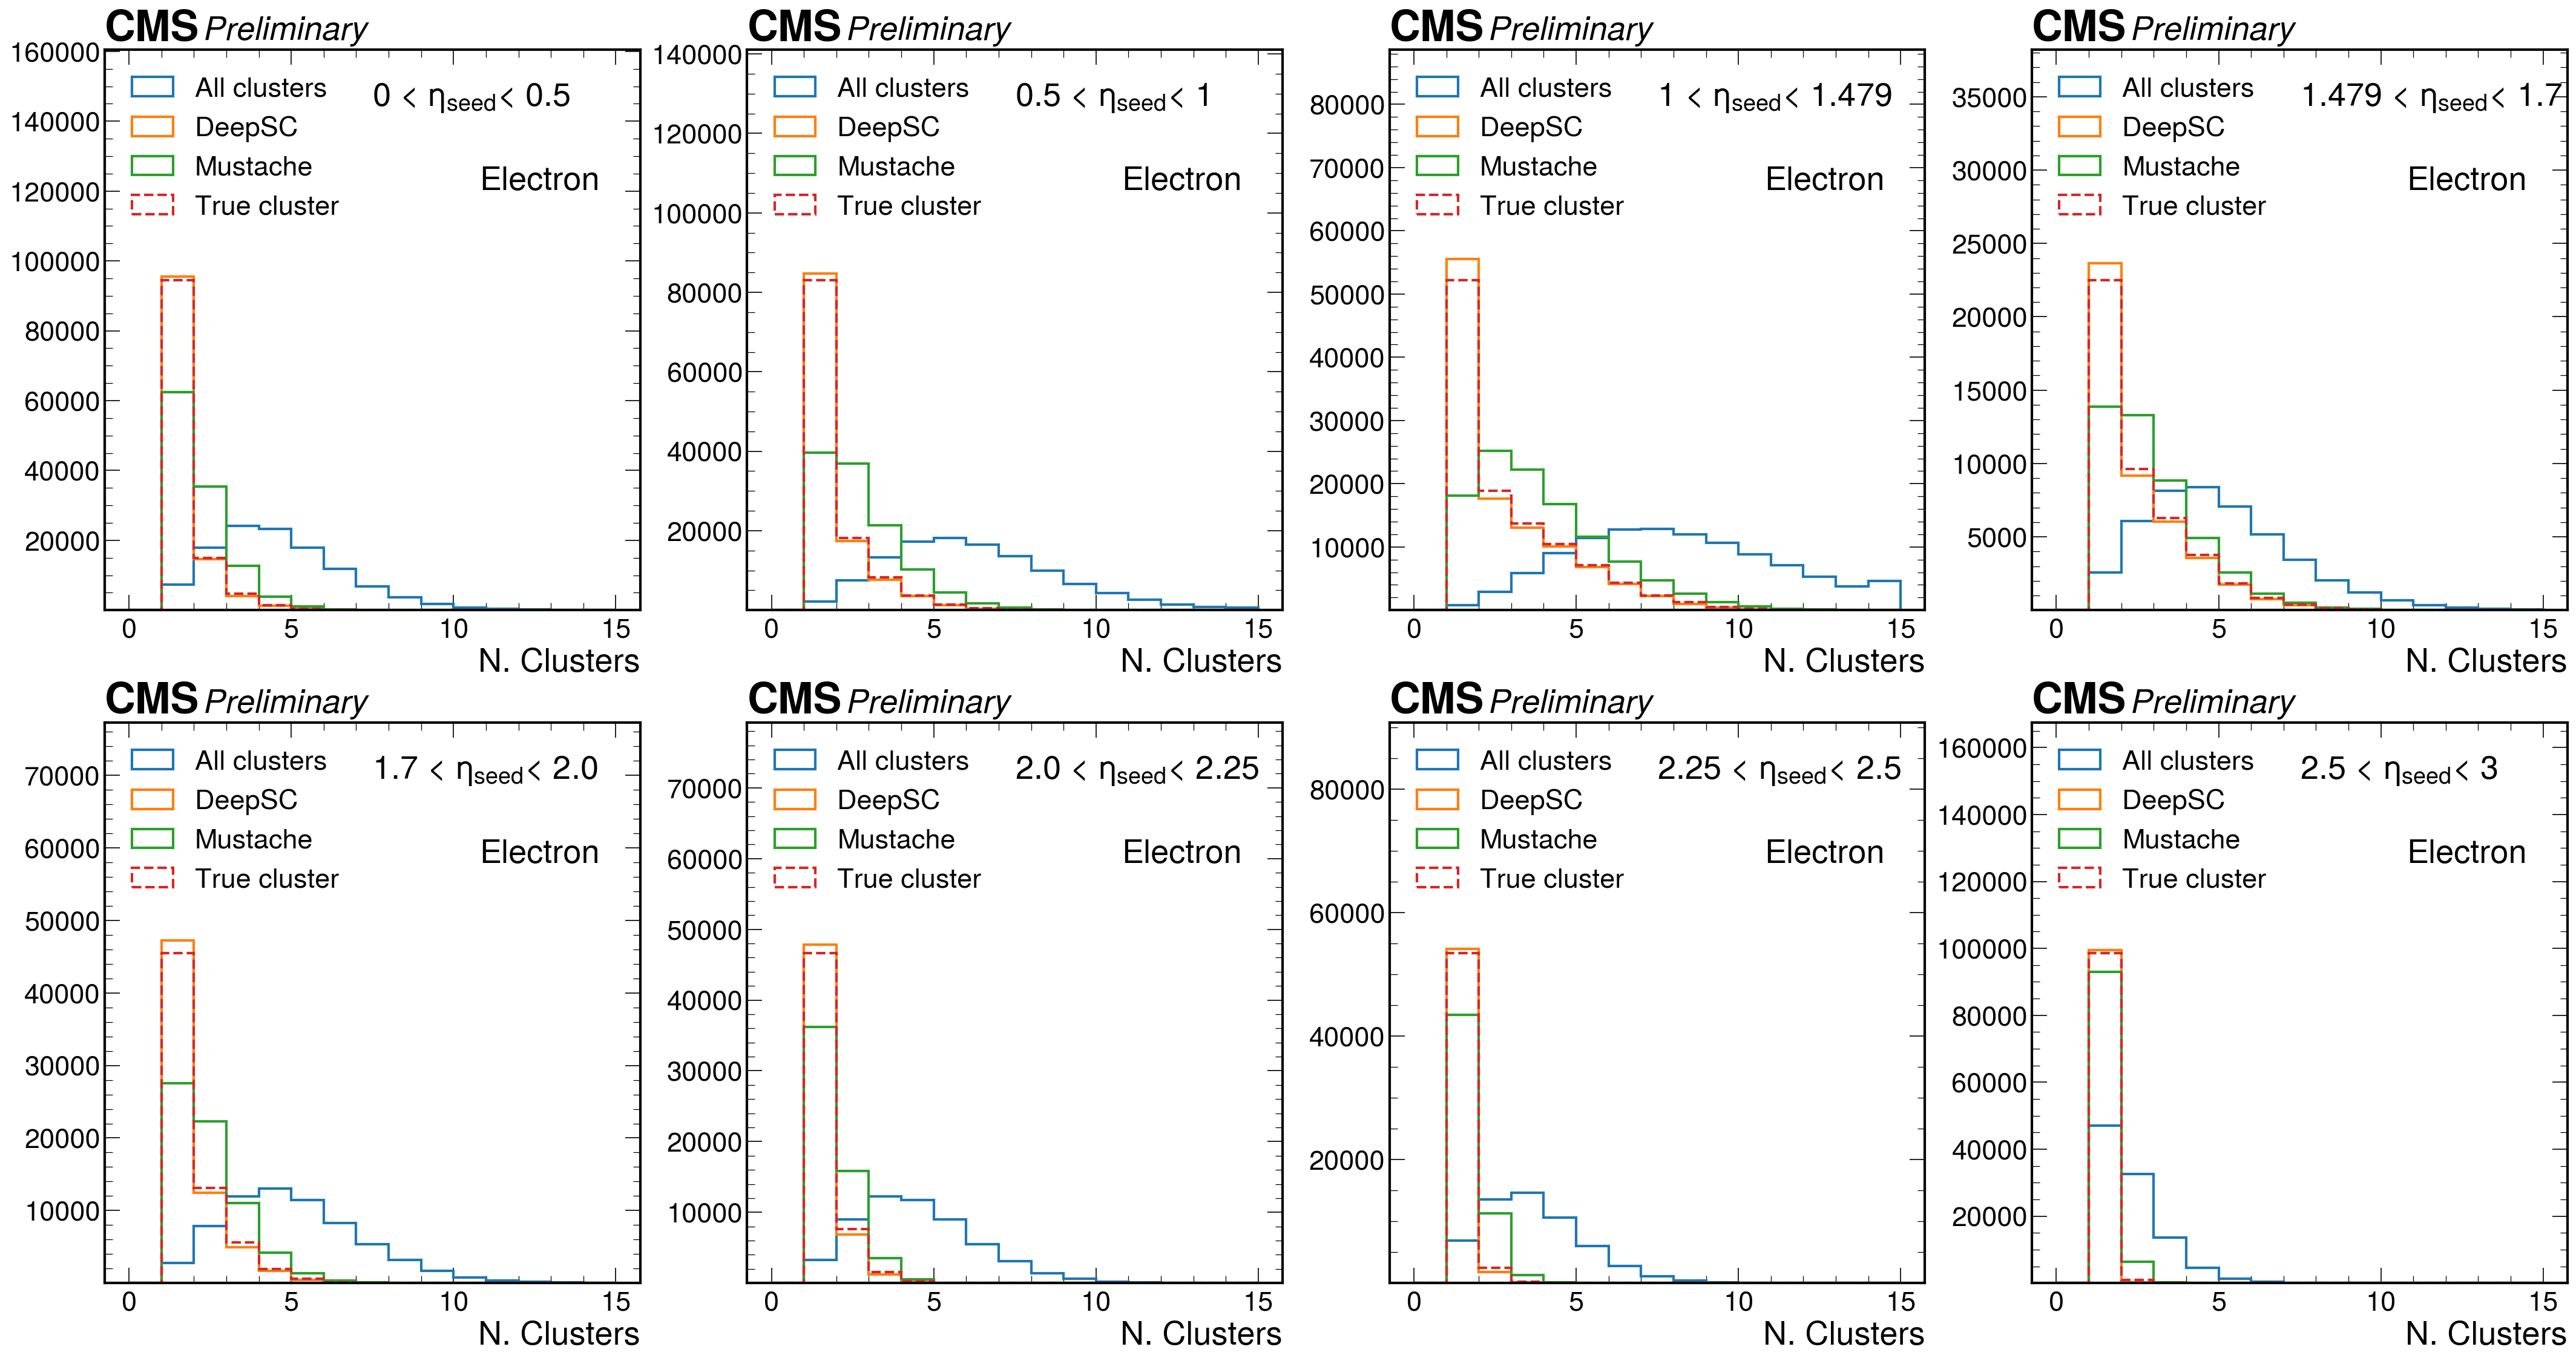

In [78]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (0,15)
bins=15

r = [0, 0.5,1, 1.479, 1.7, 2.0, 2.25, 2.5, 3]
s = [[], []]

for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))
    
for j,etss in enumerate(s): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(abs(df.eta)>=e1) & (abs(df.eta)<e2)]

        ax[j,i].hist(dfx.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
        ax[j,i].hist(dfx.ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC')
        ax[j,i].hist(dfx.ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
        A = ax[j,i].hist(dfx.ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        #ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1.7 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.5,0.9, str(e1) + ' < $\eta_{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


# Clusters precision/recall

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

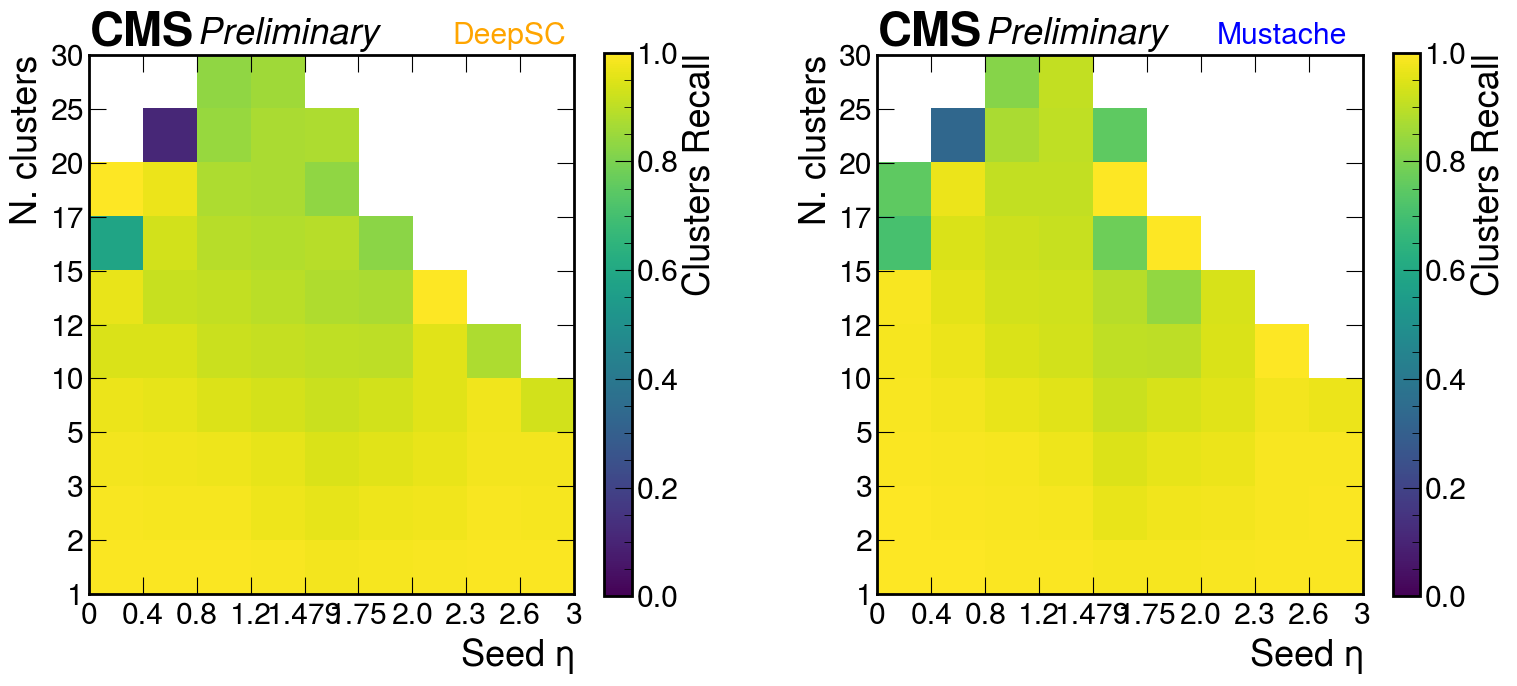

In [79]:
res_dsc =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_true).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_must_true / gr.ncls_true).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. clusters")
fig.colorbar(A , label="Clusters Recall", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("N. clusters")
plt.colorbar(B , label="Clusters Recall", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

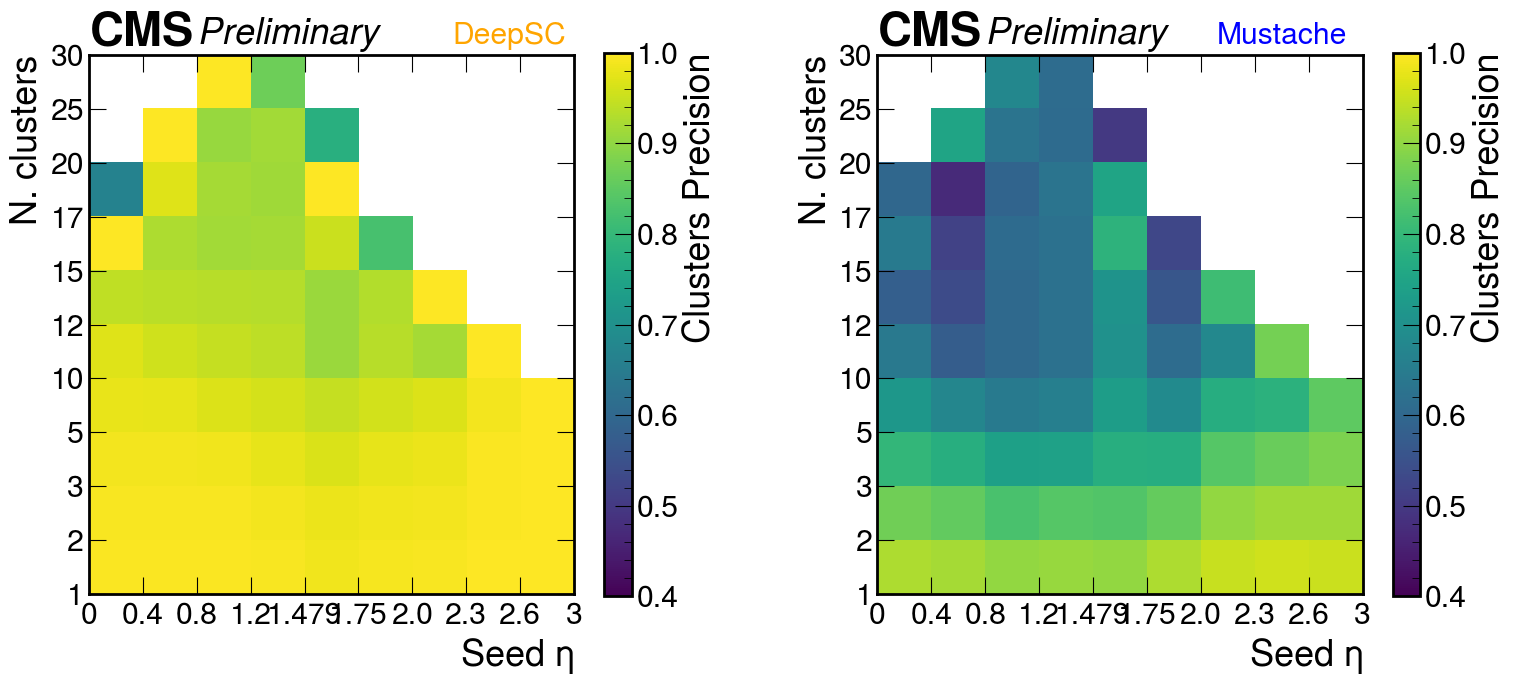

In [80]:
res_dsc =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_sel).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_must_true / gr.ncls_sel_must).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))
if vmin==0: vmin=0.4

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. clusters")
fig.colorbar(A , label="Clusters Precision", ax=ax, shrink=0.9)
ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("N. clusters")
plt.colorbar(B , label="Clusters Precision", ax=ab, shrink=0.9)

ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

ValueError: cannot reshape array of size 72 into shape (9,1)

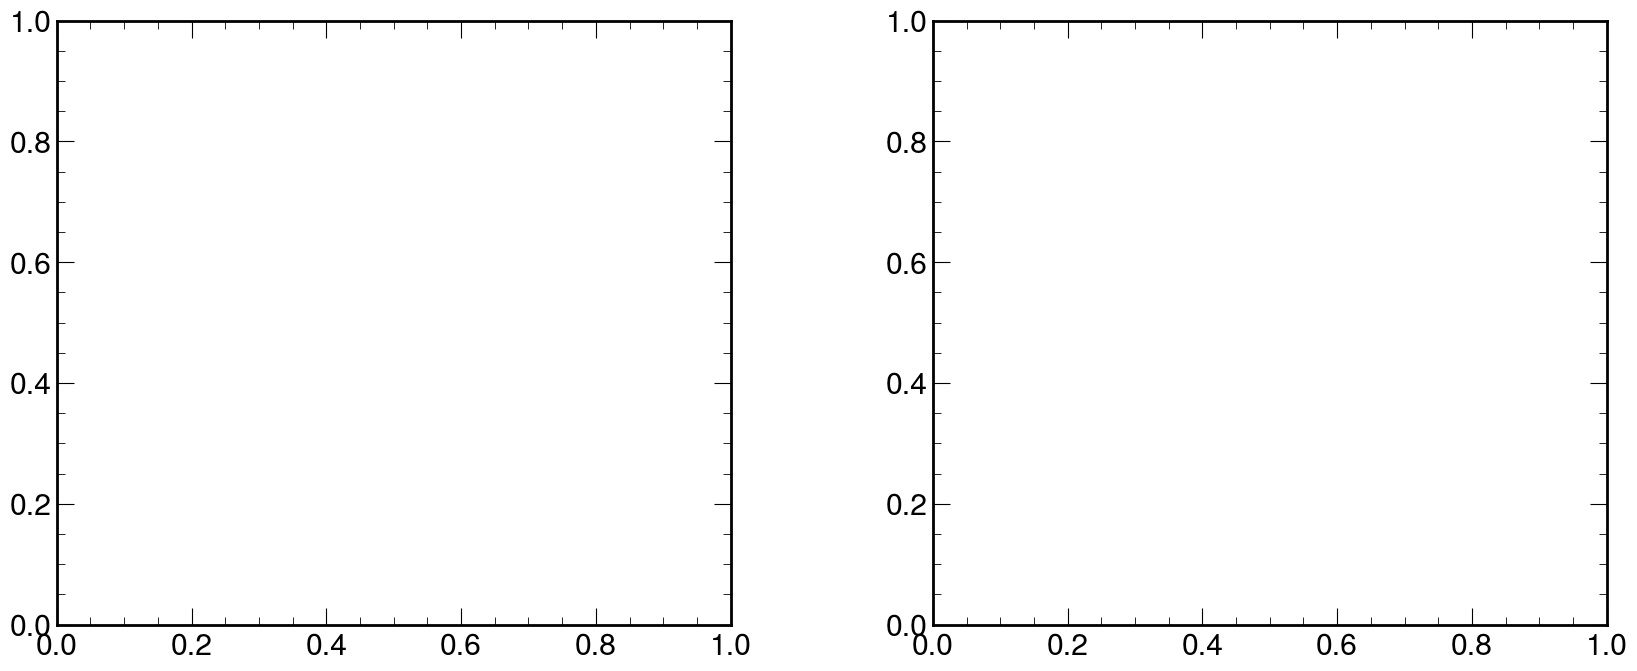

In [58]:
res_dsc =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_true).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_must_true / gr.ncls_true).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))

fig, (ax, ab) = plt.subplots(1,2, figsize=(20,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="Clusters Recall", ax=ax, shrink=0.78)

ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("Seed $E_T$")
plt.colorbar(B , label="Clusters Recall", ax=ab, shrink=0.78)


ab.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ets)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

In [ ]:
res_dsc =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_sel).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_must_true / gr.ncls_sel_must).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))

fig, (ax, ab) = plt.subplots(1,2, figsize=(20,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="Clusters Precision", ax=ax, shrink=0.78)

ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("Seed $E_T$")
plt.colorbar(B , label="Clusters Precision", ax=ab, shrink=0.78)


ab.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ets)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

# Energy precision recall

ValueError: cannot reshape array of size 72 into shape (9,1)

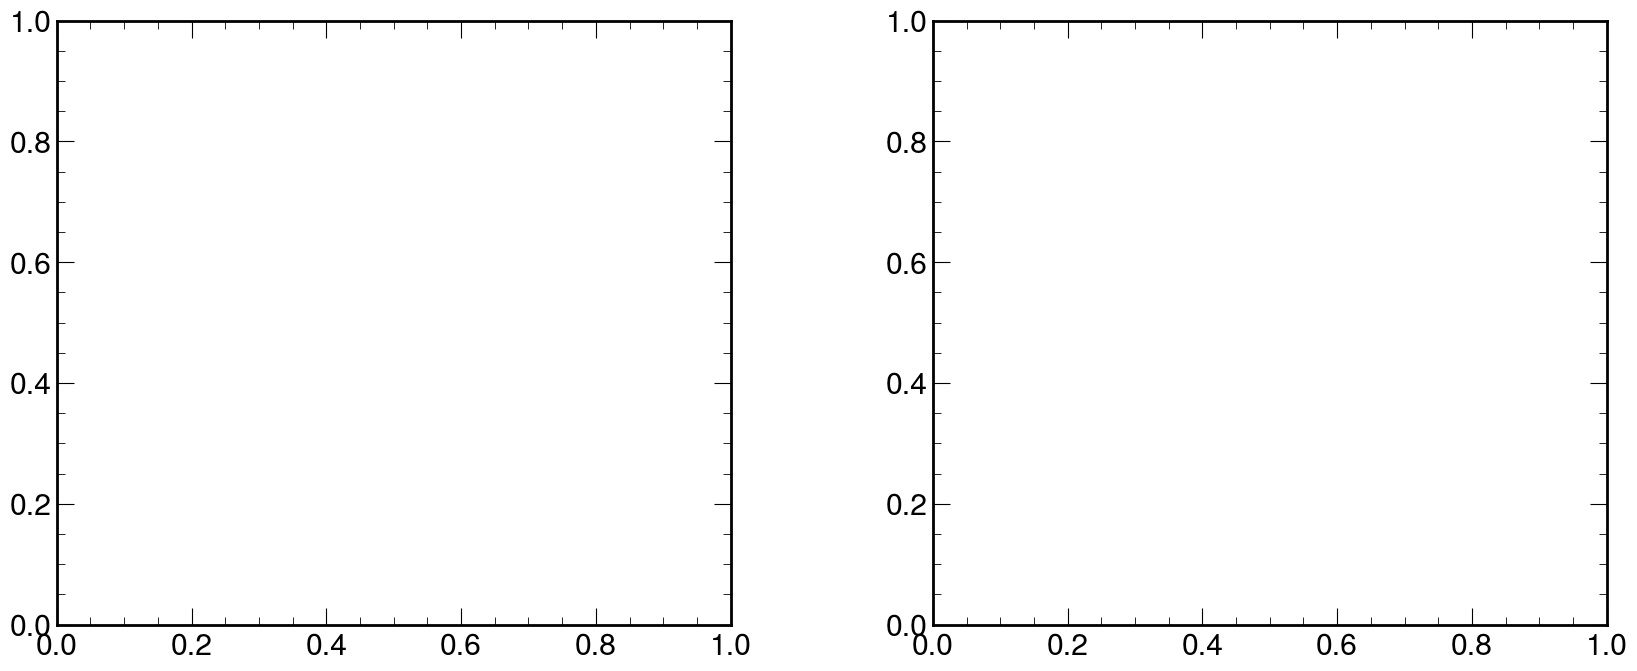

In [59]:
res_dsc =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.Et_sel_true/ gr.Et_true).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.Et_sel_must_true / gr.Et_true).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))

fig, (ax, ab) = plt.subplots(1,2, figsize=(20,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="Energy Recall", ax=ax, shrink=0.78)

ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("Seed $E_T$")
plt.colorbar(B , label="Energy Recall", ax=ab, shrink=0.78)


ab.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ets)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

In [ ]:
res_dsc =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.Et_sel_true/ gr.Et_sel).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "et_bin"])\
             .apply( lambda gr:  (gr.Et_sel_must_true / gr.Et_sel_must).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))

fig, (ax, ab) = plt.subplots(1,2, figsize=(20,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="Energy Precision", ax=ax, shrink=0.78)

ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("Seed $E_T$")
plt.colorbar(B , label="Energy Precision", ax=ab, shrink=0.78)


ab.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ets)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

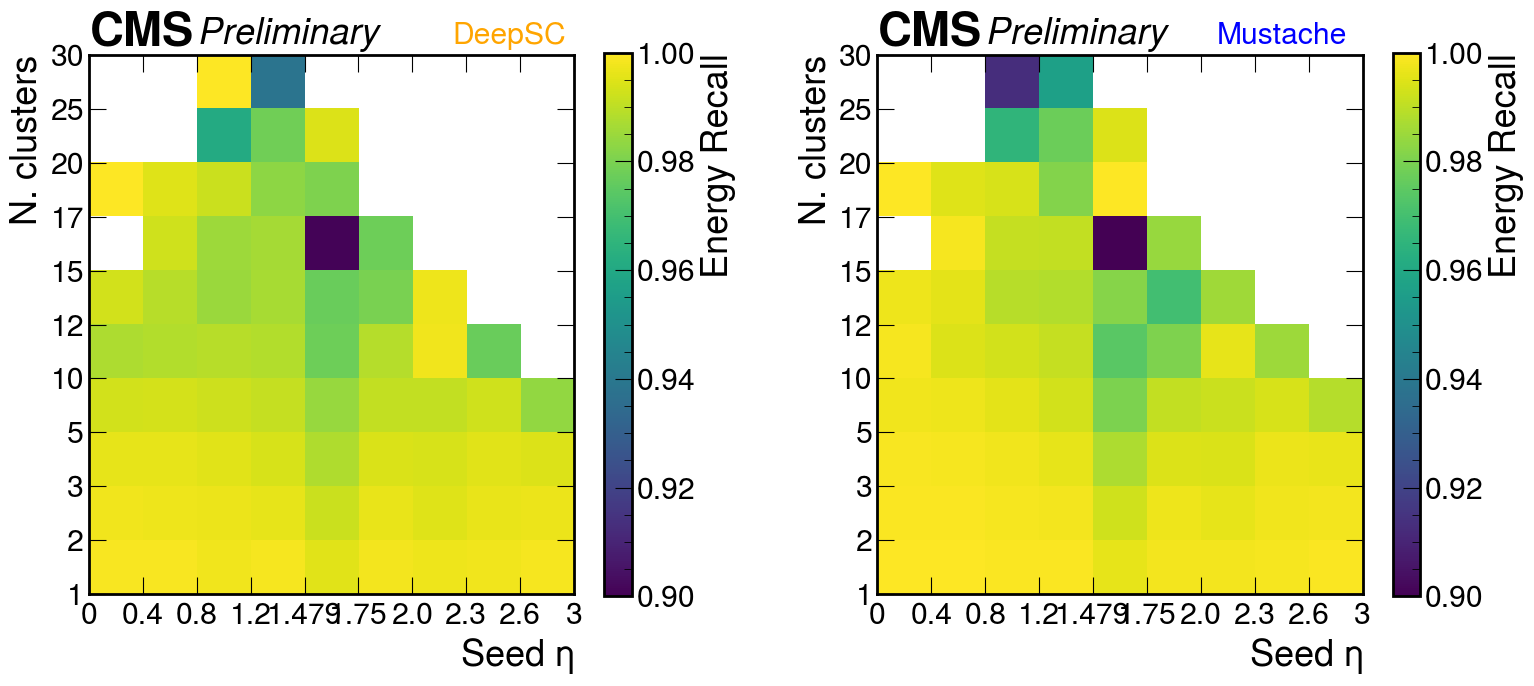

In [244]:
res_dsc =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_true/ gr.Et_true).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_must_true / gr.Et_true).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))
vmin =0.9

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. clusters")
fig.colorbar(A , label="Energy Recall", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("N. clusters")
plt.colorbar(B , label="Energy Recall", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

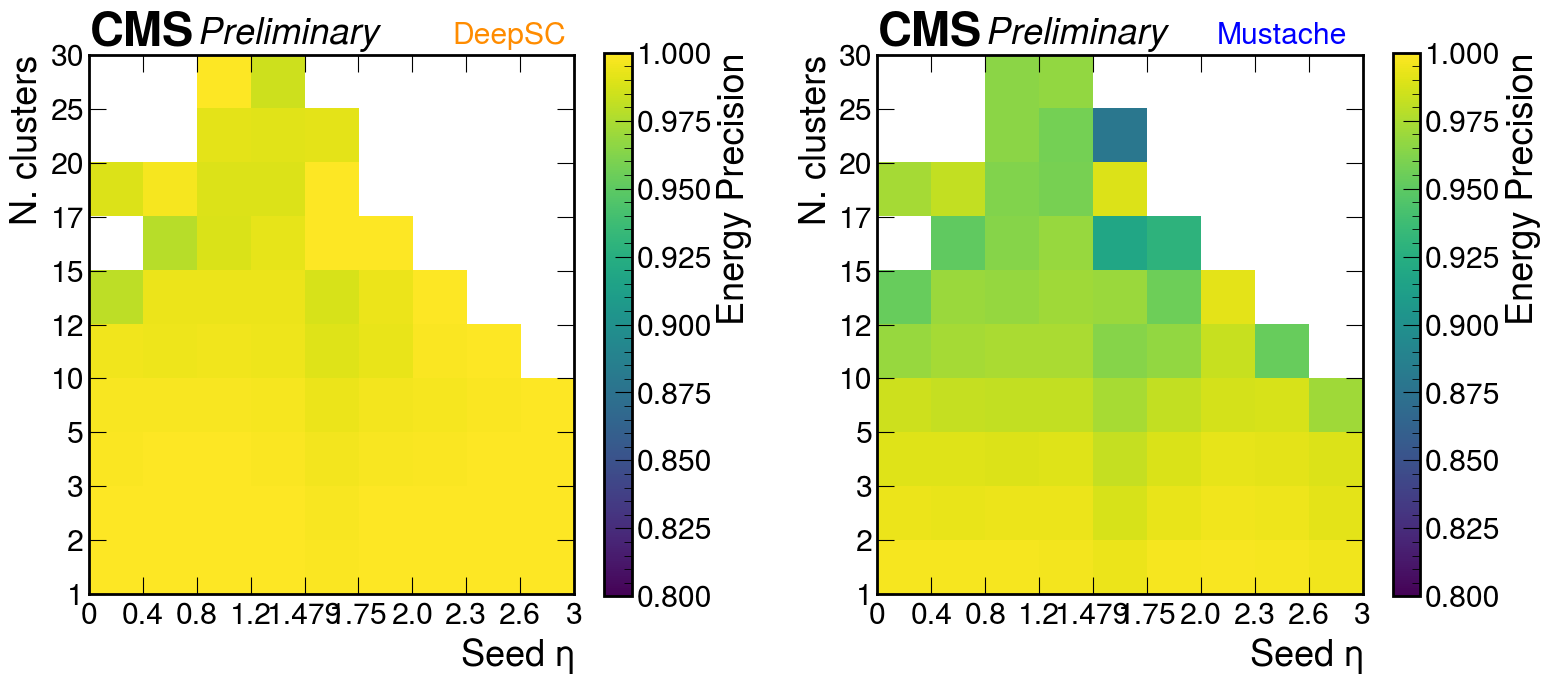

In [243]:
res_dsc =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_true/ gr.Et_sel).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_must_true / gr.Et_sel_must).mean())\
             .unstack(fill_value=0).stack()

vmin = min([min(res_dsc), min(res_mst)])
if vmin==0: vmin=0.8

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. clusters")
fig.colorbar(A , label="Energy Precision", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("N. clusters")
plt.colorbar(B , label="Energy Precision", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='darkorange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

# RMS and bias by Et and $\eta$

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

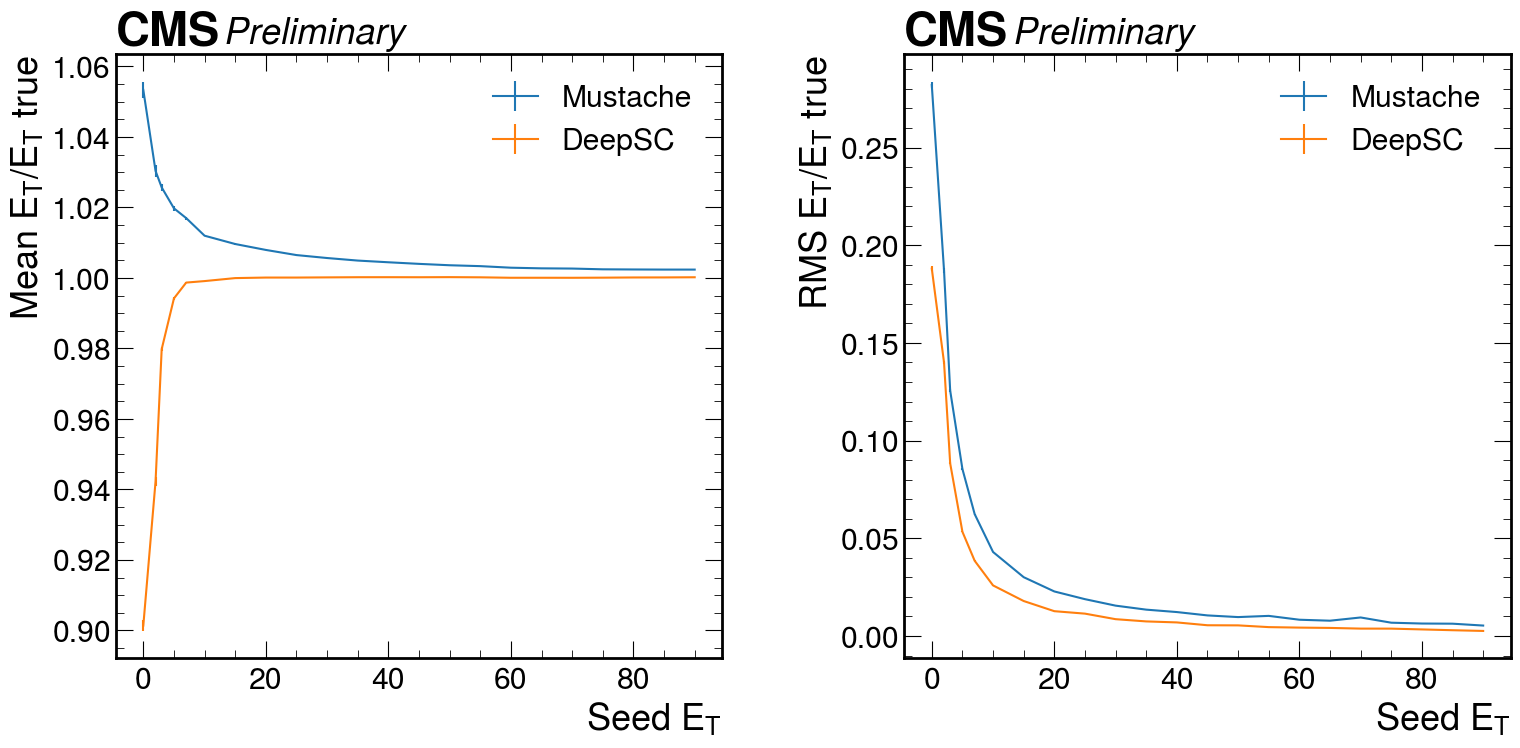

In [81]:
fig, (ab, ax) = plt.subplots(1,2, figsize=(18,8),dpi=100, )
plt.subplots_adjust( wspace=0.3)

ets = [0,2,3,5,7,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,100]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))

mean =  df.groupby(["et_bin"])["En_ovEtrue","En_ovEtrue_mustache"].mean()
rms =  df.groupby(["et_bin"])["En_ovEtrue","En_ovEtrue_mustache"].std() 

c = df.groupby(["et_bin"])["En_ovEtrue"].count()

err_rms_deep = rms.En_ovEtrue / np.sqrt(2*(c-1))
err_rms_must = rms.En_ovEtrue_mustache / np.sqrt(2*(c-1))
err_mean_deep = rms.En_ovEtrue / np.sqrt(c)
err_mean_must = rms.En_ovEtrue_mustache / np.sqrt(c)

ax.errorbar(ets[:-1], rms.En_ovEtrue_mustache, err_rms_must,  label="Mustache")
ax.errorbar(ets[:-1], rms.En_ovEtrue, err_rms_deep, label="DeepSC")
ax.set_xlabel("Seed $E_T$")
ax.set_ylabel("RMS $E_T/E_T$ true")
ax.legend(loc="upper right")

hep.cms.text("Preliminary ",loc=0, ax=ax)

ab.errorbar(ets[:-1], mean.En_ovEtrue_mustache,err_mean_must, label="Mustache")
ab.errorbar(ets[:-1], mean.En_ovEtrue, err_mean_deep, label="DeepSC")
ab.set_xlabel("Seed $E_T$")
ab.set_ylabel("Mean $E_T/E_T$ true")
ab.legend(loc="upper right")

hep.cms.text("Preliminary ",loc=0, ax=ab)



(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

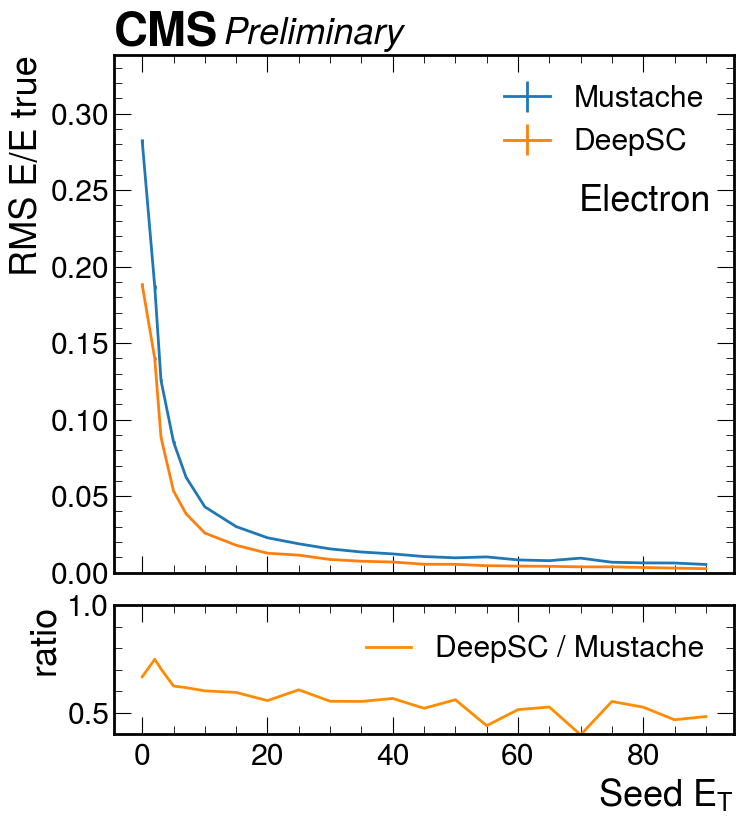

In [82]:
fig = plt.figure(figsize=(8,9), dpi=100)
gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
axs = gs.subplots(sharex=True)

axs[0].errorbar(ets[:-1], rms.En_ovEtrue_mustache, err_rms_must,  label="Mustache", linewidth=2)
axs[0].errorbar(ets[:-1], rms.En_ovEtrue, err_rms_deep, label="DeepSC",linewidth=2)
axs[1].set_xlabel("Seed $E_T$")
axs[0].set_ylabel("RMS E/E true")
axs[0].legend(loc="upper right")
axs[0].set_ylim(0,rms.En_ovEtrue_mustache.max()*1.2 )


axs[1].plot(ets[:-1], rms.En_ovEtrue /rms.En_ovEtrue_mustache, label="DeepSC / Mustache", linewidth=2, color="darkorange")
axs[1].set_ylim(0.4, 1)
axs[1].set_ylabel("ratio")
axs[1].legend()

axs[0].text(0.75, 0.7, flavour, transform=axs[0].transAxes)

hep.cms.text("Preliminary", loc=0, ax=axs[0])

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

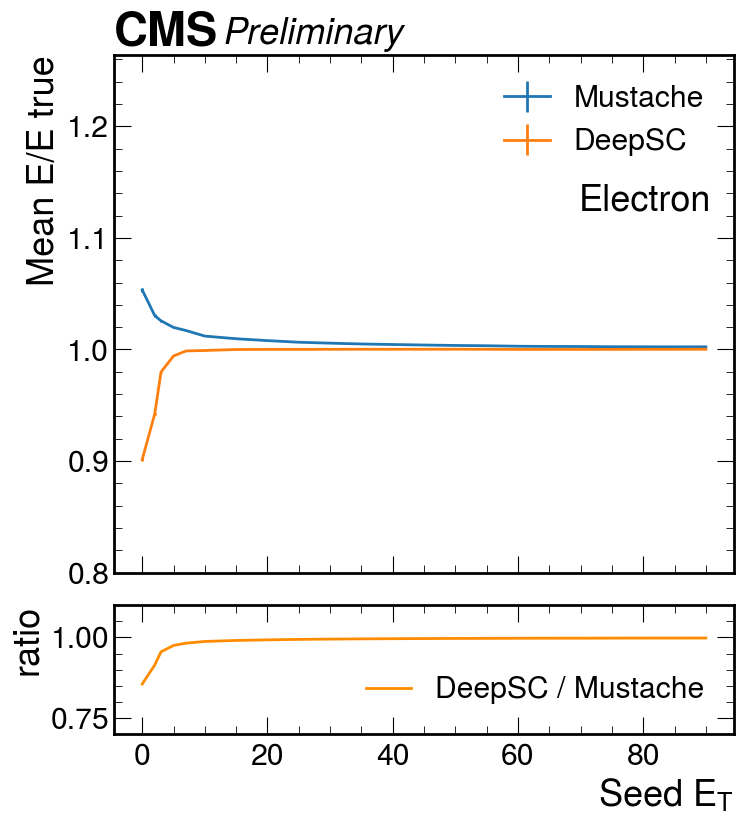

In [83]:
fig = plt.figure(figsize=(8,9), dpi=100)
gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
axs = gs.subplots(sharex=True)

axs[0].errorbar(ets[:-1], mean.En_ovEtrue_mustache, err_rms_must,  label="Mustache", linewidth=2)
axs[0].errorbar(ets[:-1], mean.En_ovEtrue, err_rms_deep, label="DeepSC",linewidth=2)
axs[1].set_xlabel("Seed $E_T$")
axs[0].set_ylabel("Mean E/E true")
axs[0].legend(loc="upper right")
axs[0].set_ylim(0.8,mean.En_ovEtrue_mustache.max()*1.2 )


axs[1].plot(ets[:-1], mean.En_ovEtrue /mean.En_ovEtrue_mustache, label="DeepSC / Mustache", linewidth=2, color="darkorange")
axs[1].set_ylim(0.7, 1.1)
axs[1].set_ylabel("ratio")
axs[1].legend()

axs[0].text(0.75, 0.7, flavour, transform=axs[0].transAxes)

hep.cms.text("Preliminary", loc=0, ax=axs[0])

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

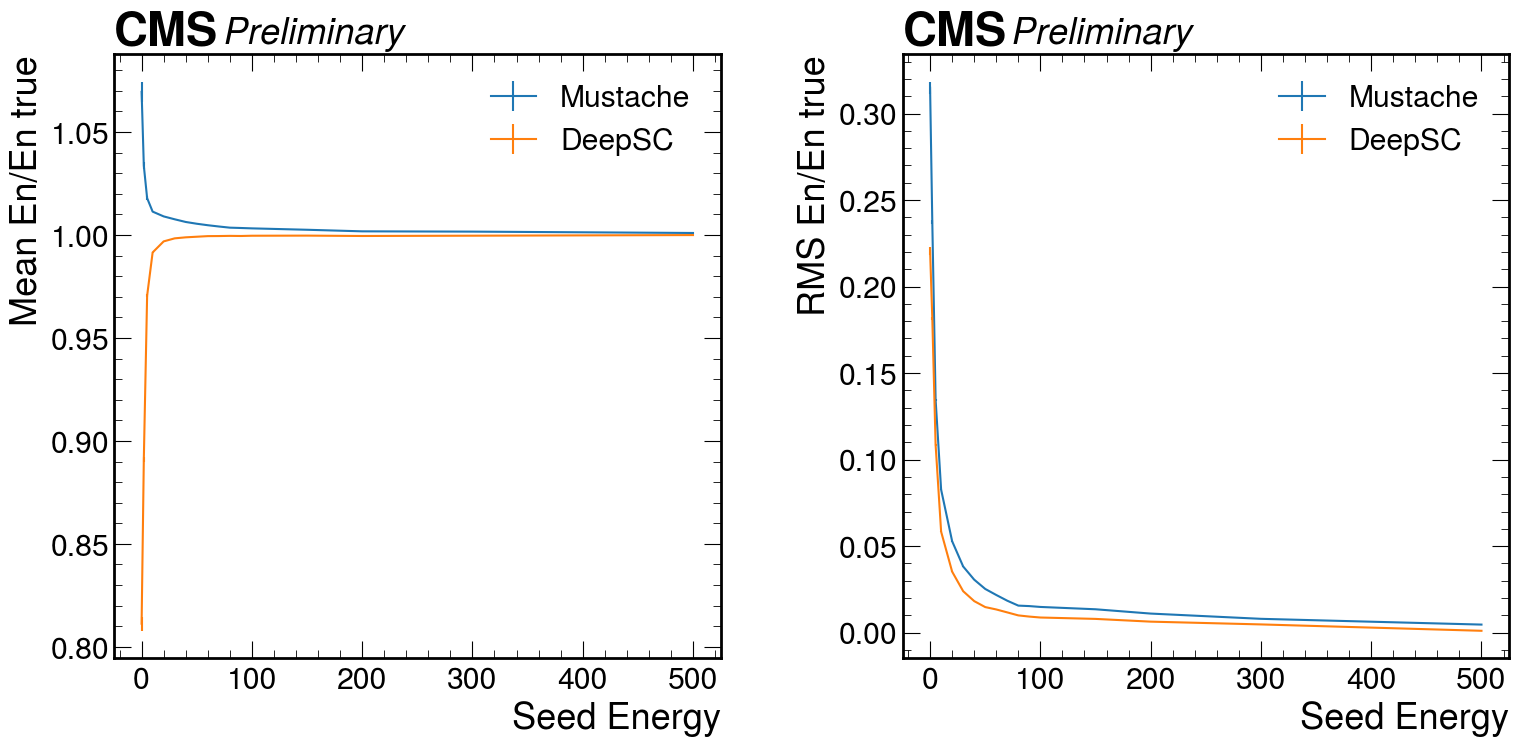

In [63]:
fig, (ab, ax) = plt.subplots(1,2, figsize=(18,8),dpi=100, )
plt.subplots_adjust( wspace=0.3)

ens = [0,2,5,10,20,30,40,50,60,70,80, 90,100,150,200,300, 500,1000]
df["en_bin"] = pd.cut(df.en, ens, labels=list(range(len(ens)-1)))

mean =  df.groupby(["en_bin"])["En_ovEtrue","En_ovEtrue_mustache"].mean()
rms =  df.groupby(["en_bin"])["En_ovEtrue","En_ovEtrue_mustache"].std() 

c = df.groupby(["en_bin"])["En_ovEtrue"].count()

err_rms_deep = rms.En_ovEtrue / np.sqrt(2*(c-1))
err_rms_must = rms.En_ovEtrue_mustache / np.sqrt(2*(c-1))
err_mean_deep = rms.En_ovEtrue / np.sqrt(c)
err_mean_must = rms.En_ovEtrue_mustache / np.sqrt(c)

ax.errorbar(ens[:-1], rms.En_ovEtrue_mustache, err_rms_must,  label="Mustache")
ax.errorbar(ens[:-1], rms.En_ovEtrue, err_rms_deep, label="DeepSC")
ax.set_xlabel("Seed Energy")
ax.set_ylabel("RMS En/En true")
ax.legend(loc="upper right")

hep.cms.text("Preliminary ",loc=0, ax=ax)

ab.errorbar(ens[:-1], mean.En_ovEtrue_mustache,err_mean_must, label="Mustache")
ab.errorbar(ens[:-1], mean.En_ovEtrue, err_mean_deep, label="DeepSC")
ab.set_xlabel("Seed Energy")
ab.set_ylabel("Mean En/En true")
ab.legend(loc="upper right")

hep.cms.text("Preliminary ",loc=0, ax=ab)



(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

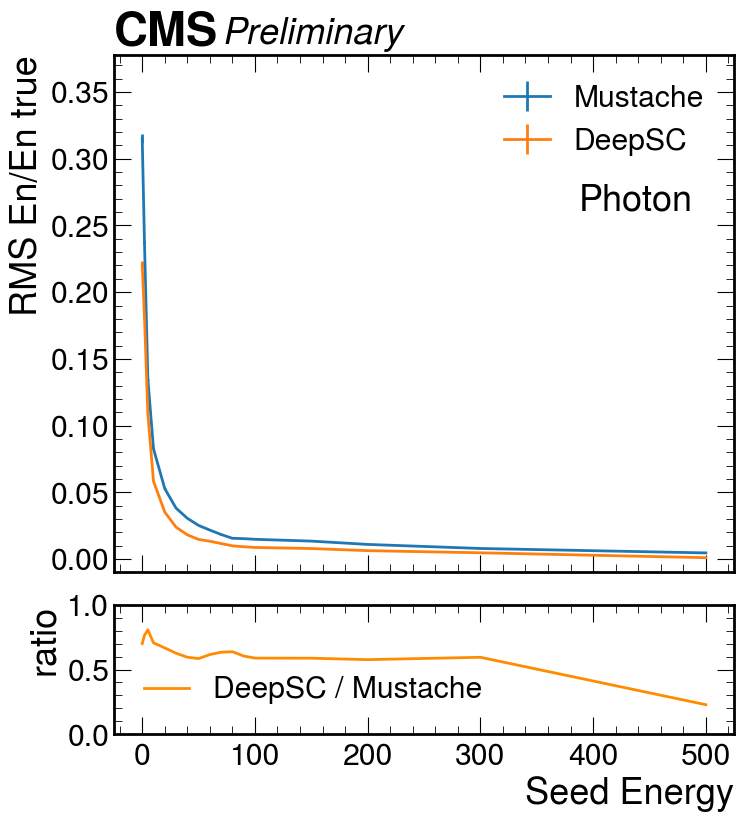

In [64]:
fig = plt.figure(figsize=(8,9), dpi=100)
gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
axs = gs.subplots(sharex=True)

axs[0].errorbar(ens[:-1], rms.En_ovEtrue_mustache, err_rms_must,  label="Mustache", linewidth=2)
axs[0].errorbar(ens[:-1], rms.En_ovEtrue, err_rms_deep, label="DeepSC",linewidth=2)
axs[1].set_xlabel("Seed Energy")
axs[0].set_ylabel("RMS En/En true")
axs[0].legend(loc="upper right")
axs[0].set_ylim(-0.01,rms.En_ovEtrue_mustache.max()*1.2 )


axs[1].plot(ens[:-1], rms.En_ovEtrue /rms.En_ovEtrue_mustache, label="DeepSC / Mustache", linewidth=2, color="darkorange")
axs[1].set_ylim(0, 1)
axs[1].set_ylabel("ratio")
axs[1].legend()

axs[0].text(0.75, 0.7, flavour, transform=axs[0].transAxes)

hep.cms.text("Preliminary", loc=0, ax=axs[0])

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

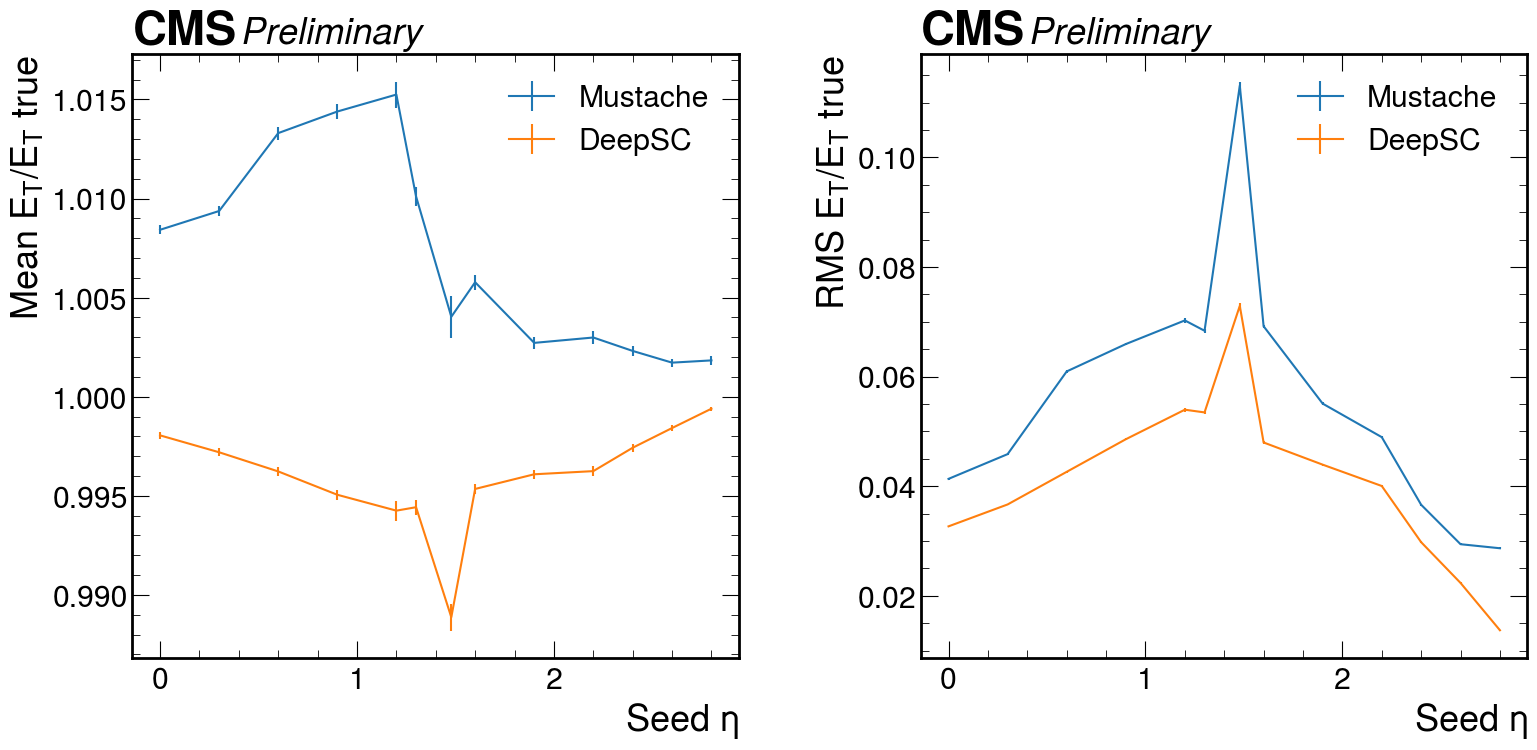

In [84]:
fig, (ab, ax) = plt.subplots(1,2, figsize=(18,8),dpi=100, )
plt.subplots_adjust( wspace=0.3)

etas = [0, 0.3,0.6,0.9,1.2,1.3,1.479,1.6,1.9,2.2,2.4,2.6,2.8,3]
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))

mean =  df.groupby(["eta_bin"])["Et_ovEtrue","Et_ovEtrue_mustache"].mean()
rms =  df.groupby(["eta_bin"])["Et_ovEtrue","Et_ovEtrue_mustache"].std() 

c = df.groupby(["eta_bin"])["Et_ovEtrue"].count()

err_rms_deep = rms.Et_ovEtrue / np.sqrt(2*(c-1))
err_rms_must = rms.Et_ovEtrue_mustache / np.sqrt(2*(c-1))
err_mean_deep = rms.Et_ovEtrue / np.sqrt(c)
err_mean_must = rms.Et_ovEtrue_mustache / np.sqrt(c)

ax.errorbar(etas[:-1], rms.Et_ovEtrue_mustache, yerr=err_rms_must,  label="Mustache")
ax.errorbar(etas[:-1], rms.Et_ovEtrue, yerr=err_rms_deep, label="DeepSC")
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("RMS $E_T/E_T$ true")
ax.legend(loc="upper right")

hep.cms.text("Preliminary ",loc=0, ax=ax)

ab.errorbar(etas[:-1], mean.Et_ovEtrue_mustache,err_mean_must,label="Mustache")
ab.errorbar(etas[:-1], mean.Et_ovEtrue, err_mean_deep, label="DeepSC")
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("Mean $E_T/E_T$ true")
ab.legend(loc="upper right")

hep.cms.text("Preliminary ",loc=0, ax=ab)



(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

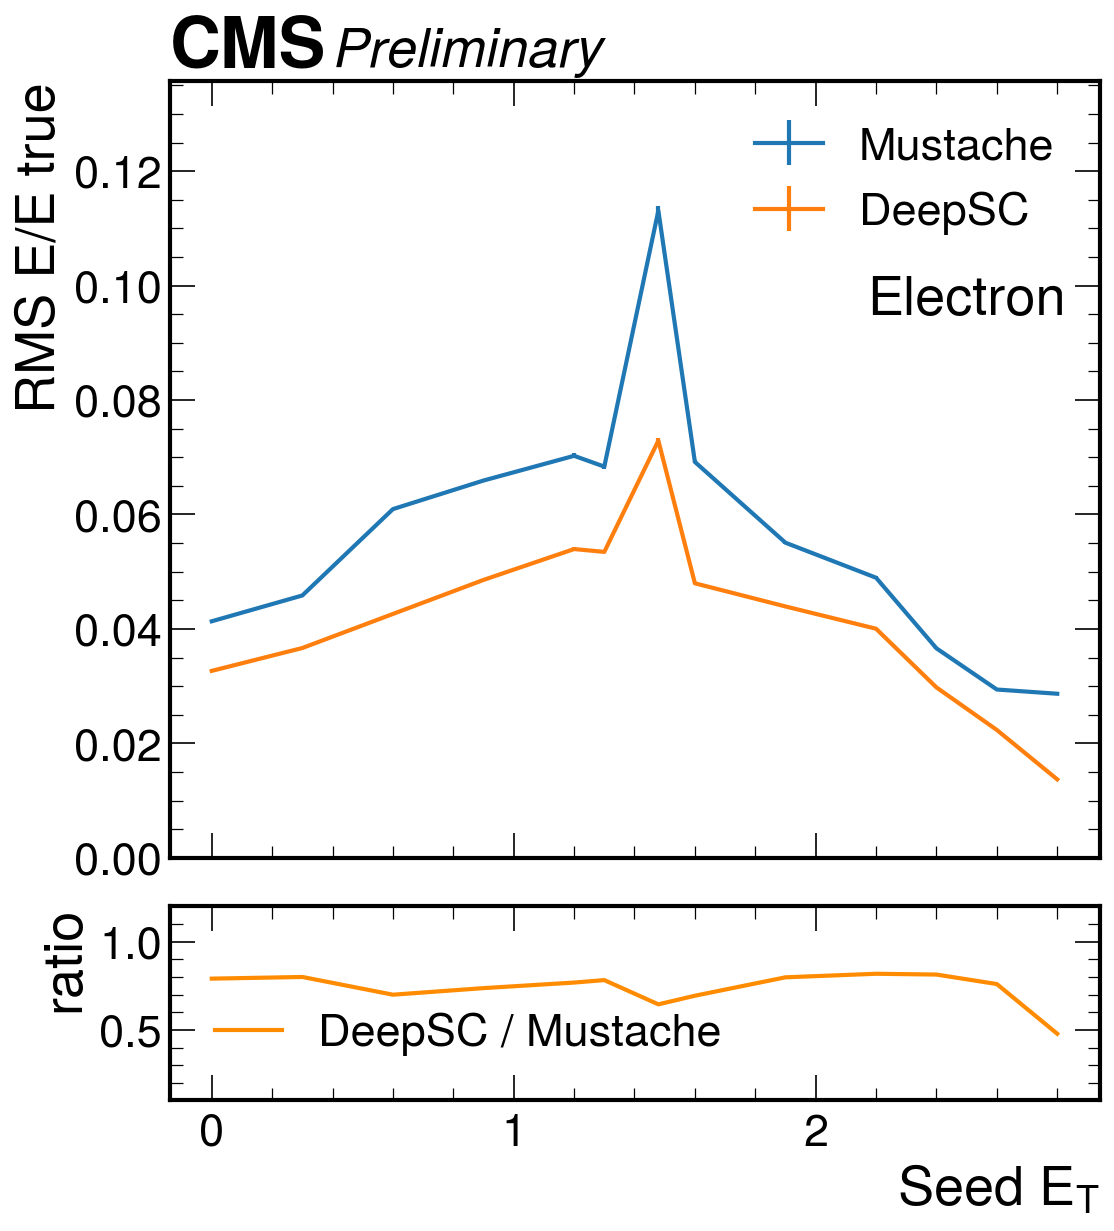

In [85]:
fig = plt.figure(figsize=(8,9), dpi=150)
gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
axs = gs.subplots(sharex=True)

axs[0].errorbar(etas[:-1], rms.Et_ovEtrue_mustache, err_rms_must,  label="Mustache", linewidth=2)
axs[0].errorbar(etas[:-1], rms.Et_ovEtrue, err_rms_deep, label="DeepSC",linewidth=2)
axs[1].set_xlabel("Seed $E_T$")
axs[0].set_ylabel("RMS E/E true")
axs[0].legend(loc="upper right")
axs[0].set_ylim(0,rms.Et_ovEtrue_mustache.max()*1.2 )


axs[1].plot(etas[:-1], rms.Et_ovEtrue /rms.Et_ovEtrue_mustache, label="DeepSC / Mustache", linewidth=2, color="darkorange")
axs[1].set_ylim(0.1, 1.2)
axs[1].set_ylabel("ratio")
axs[1].legend()

axs[0].text(0.75, 0.7, flavour, transform=axs[0].transAxes)

hep.cms.text("Preliminary", loc=0, ax=axs[0])

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

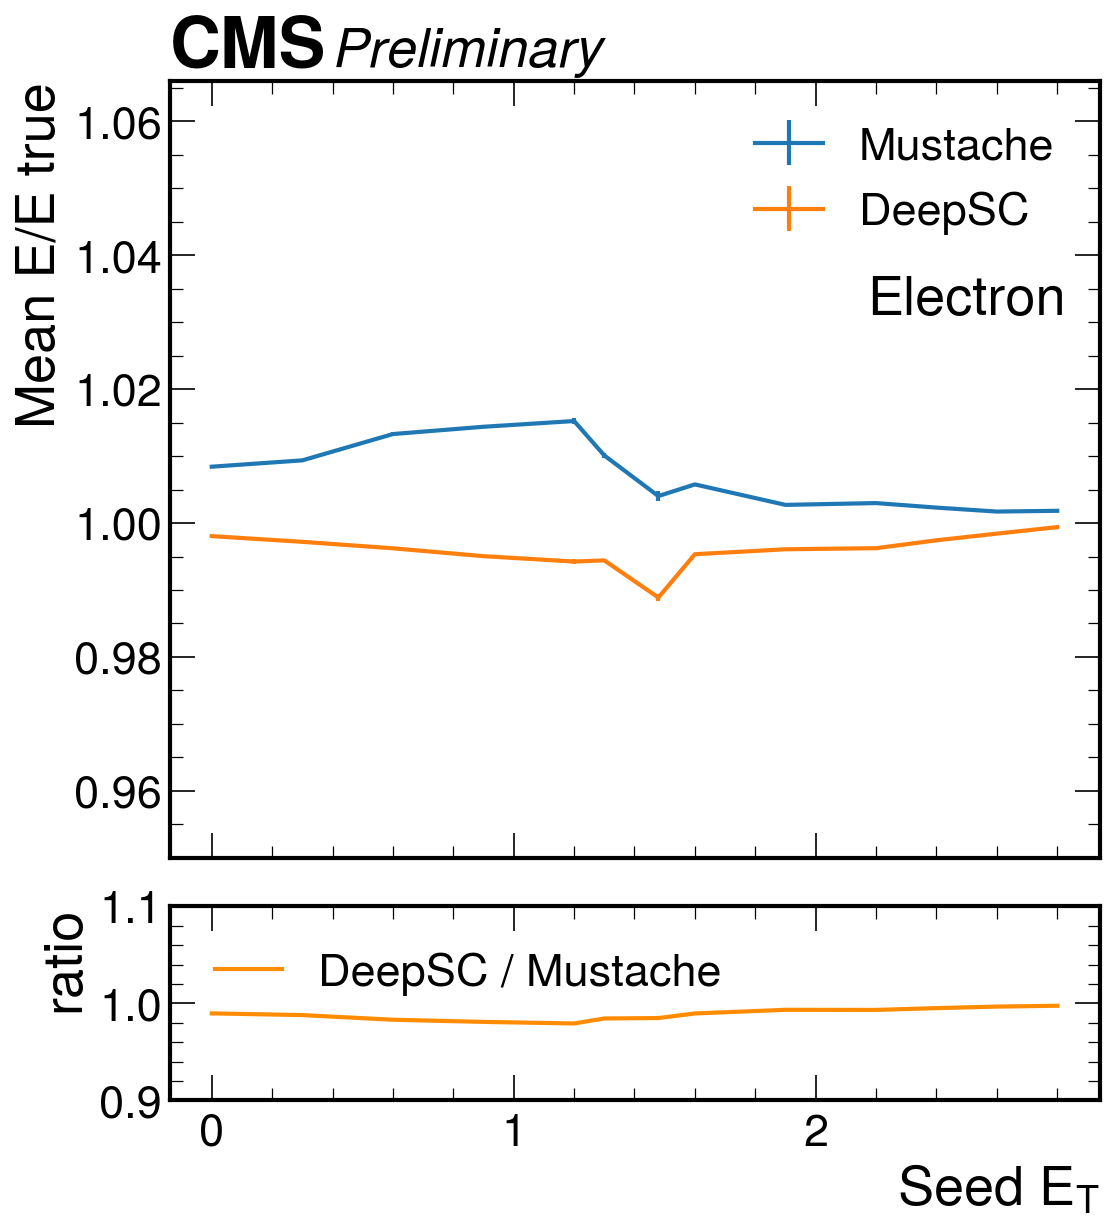

In [86]:
fig = plt.figure(figsize=(8,9), dpi=150)
gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
axs = gs.subplots(sharex=True)

axs[0].errorbar(etas[:-1], mean.Et_ovEtrue_mustache, err_rms_must,  label="Mustache", linewidth=2)
axs[0].errorbar(etas[:-1], mean.Et_ovEtrue, err_rms_deep, label="DeepSC",linewidth=2)
axs[1].set_xlabel("Seed $E_T$")
axs[0].set_ylabel("Mean E/E true")
axs[0].legend(loc="upper right")
axs[0].set_ylim(0.95,mean.Et_ovEtrue_mustache.max()*1.05 )


axs[1].plot(etas[:-1], mean.Et_ovEtrue /mean.Et_ovEtrue_mustache, label="DeepSC / Mustache", linewidth=2, color="darkorange")
axs[1].set_ylim(0.9, 1.1)
axs[1].set_ylabel("ratio")
axs[1].legend()

axs[0].text(0.75, 0.7, flavour, transform=axs[0].transAxes)

hep.cms.text("Preliminary", loc=0, ax=axs[0])